In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import itertools

from BZI.tetrahedron import *
from BZI.pseudopots import FreeElectronModel, Al_PP
from BZI.integration import rectangular_fermi_level
from BZI.symmetry import make_ptvecs, make_rptvecs, Lattice, find_orbitals
from BZI.plots import plot_mesh

# Periodicity

In [4]:
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)
lat_shift = [-1./2]*3
grid_shift = [0.]*3
degree = 1
free = FreeElectronModel(lattice, degree)
ndivs = 2

In [5]:
grid, tetrahedra = grid_and_tetrahedra(Al_PP, ndivs, lat_shift)

<IPython.core.display.Javascript object>


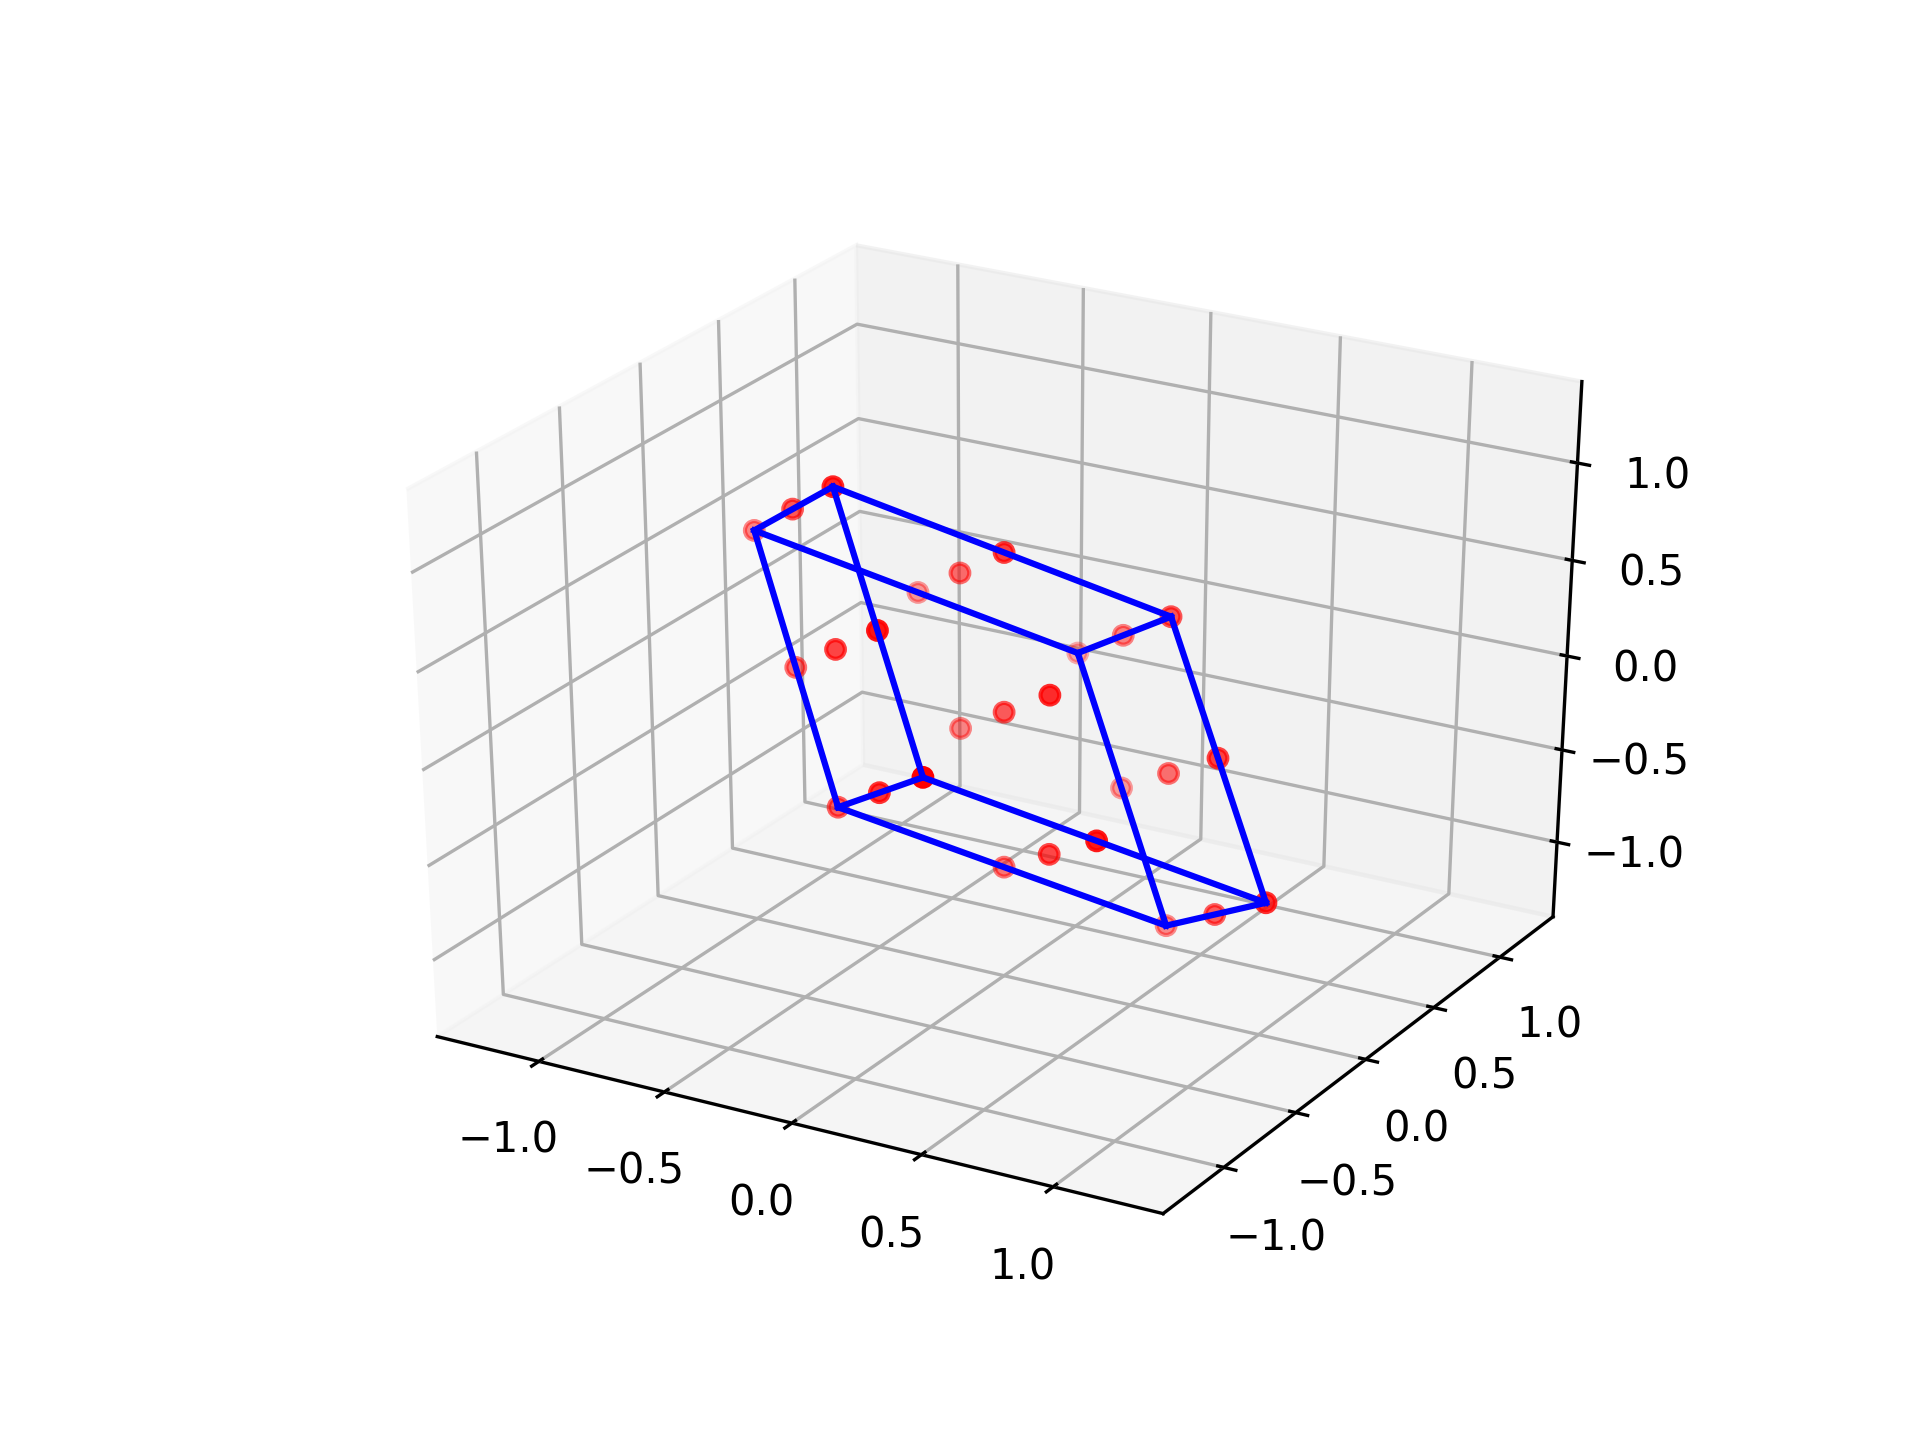

In [6]:
plot_offset = -np.sum(Al_PP.lattice.reciprocal_vectors,1)/2
plot_mesh(grid, Al_PP.lattice.reciprocal_vectors, plot_offset)

In [34]:
extended_grid, indices = make_extended_grid_indices(Al_PP, ndivs, lat_shift)

In [35]:
new_grid, new_tetrahedra = get_grid_tetrahedra(Al_PP, ndivs, lat_shift)

<IPython.core.display.Javascript object>


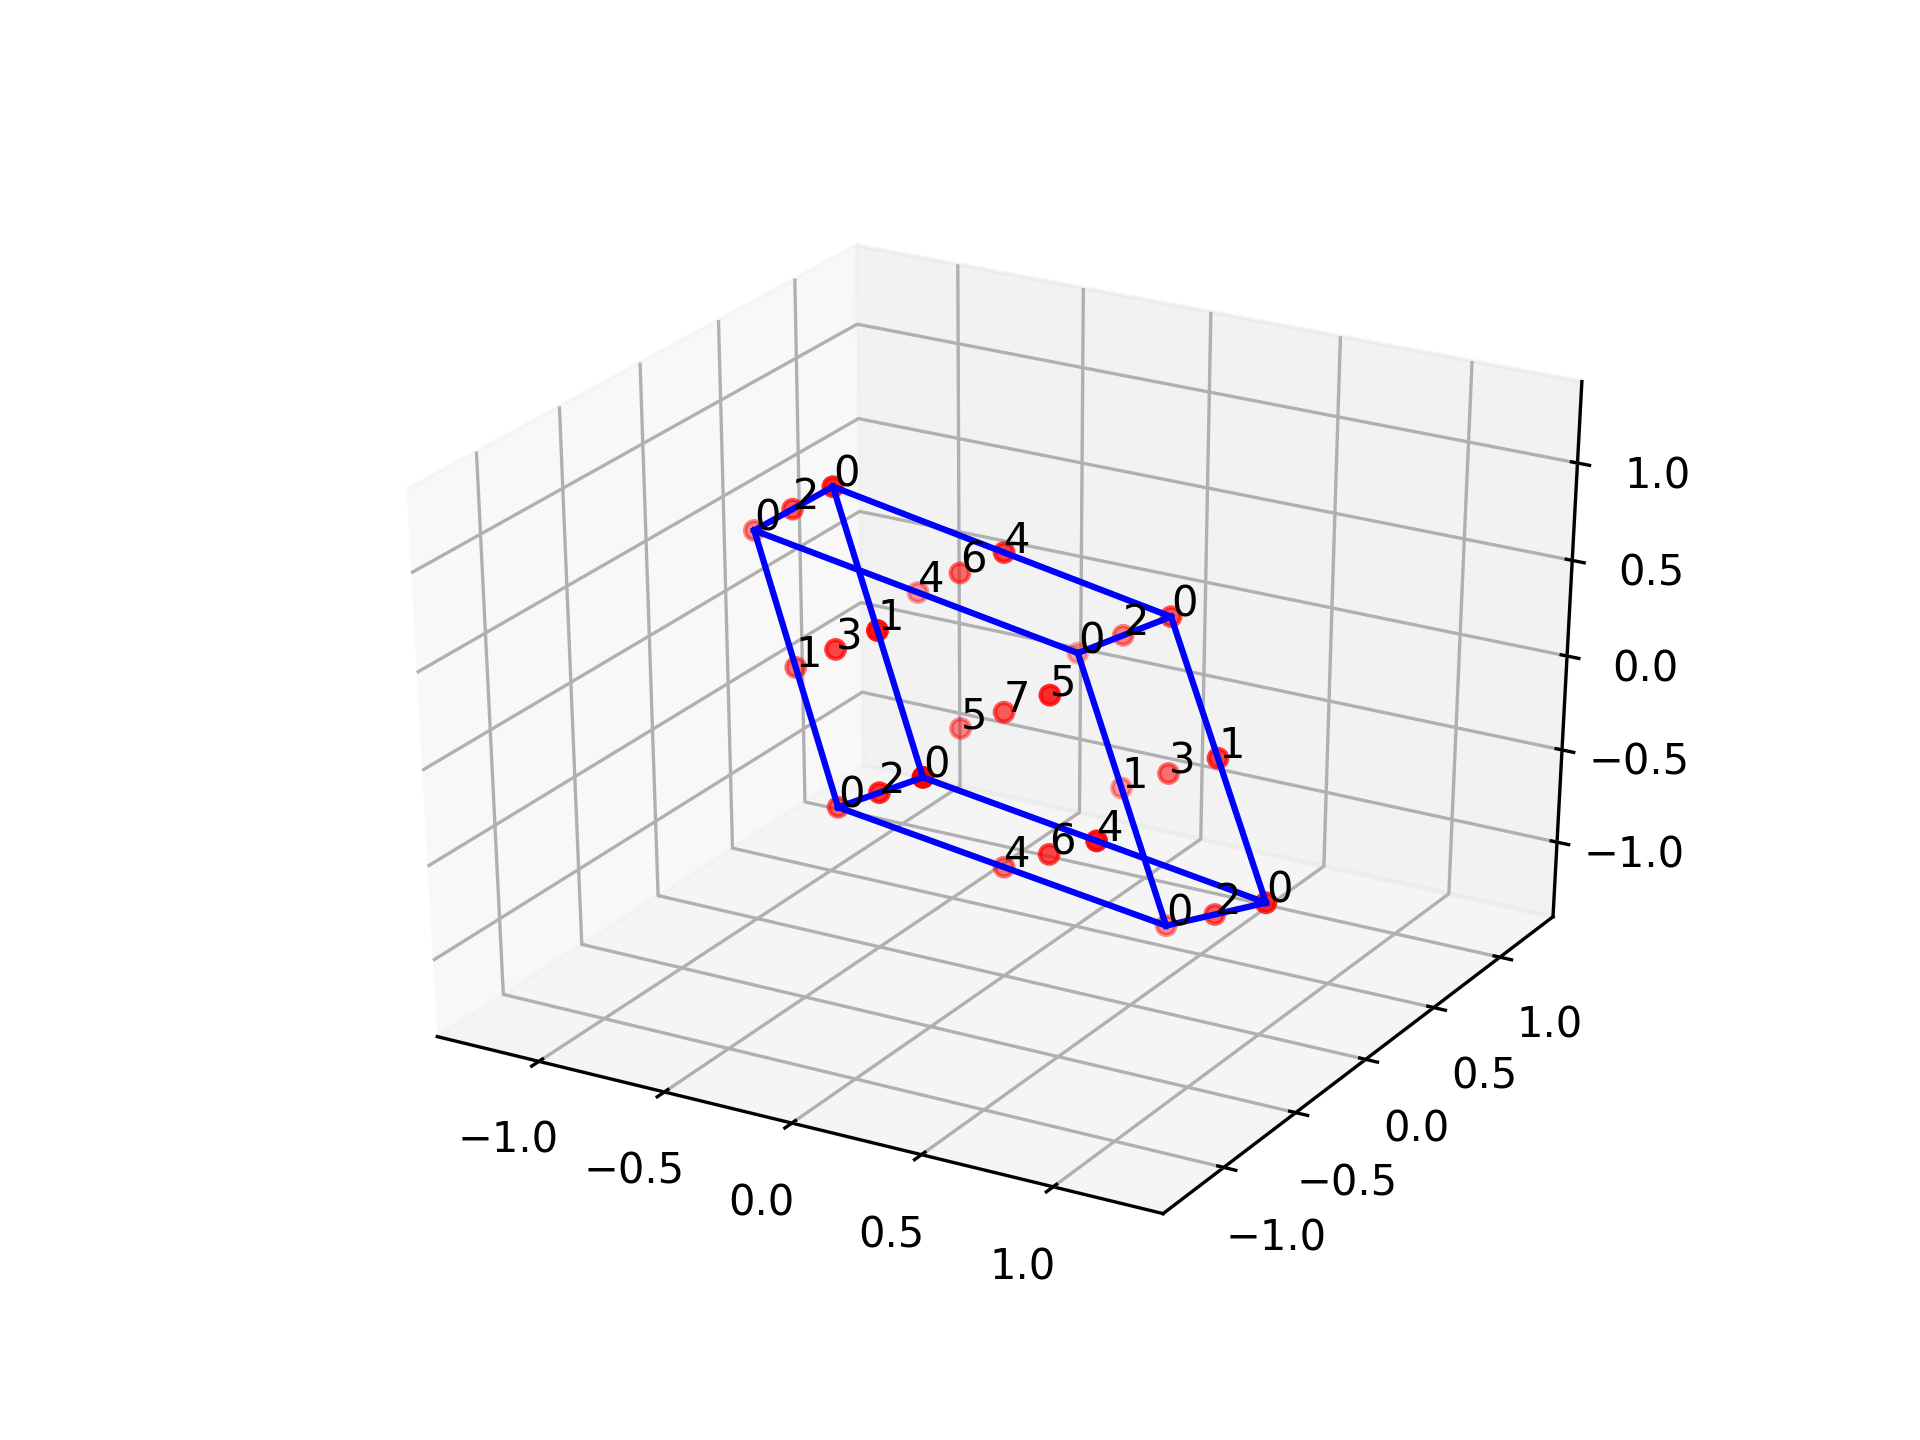

In [36]:
plot_offset = -np.sum(Al_PP.lattice.reciprocal_vectors,1)/2
plot_mesh(extended_grid, Al_PP.lattice.reciprocal_vectors, plot_offset, indices)

<IPython.core.display.Javascript object>


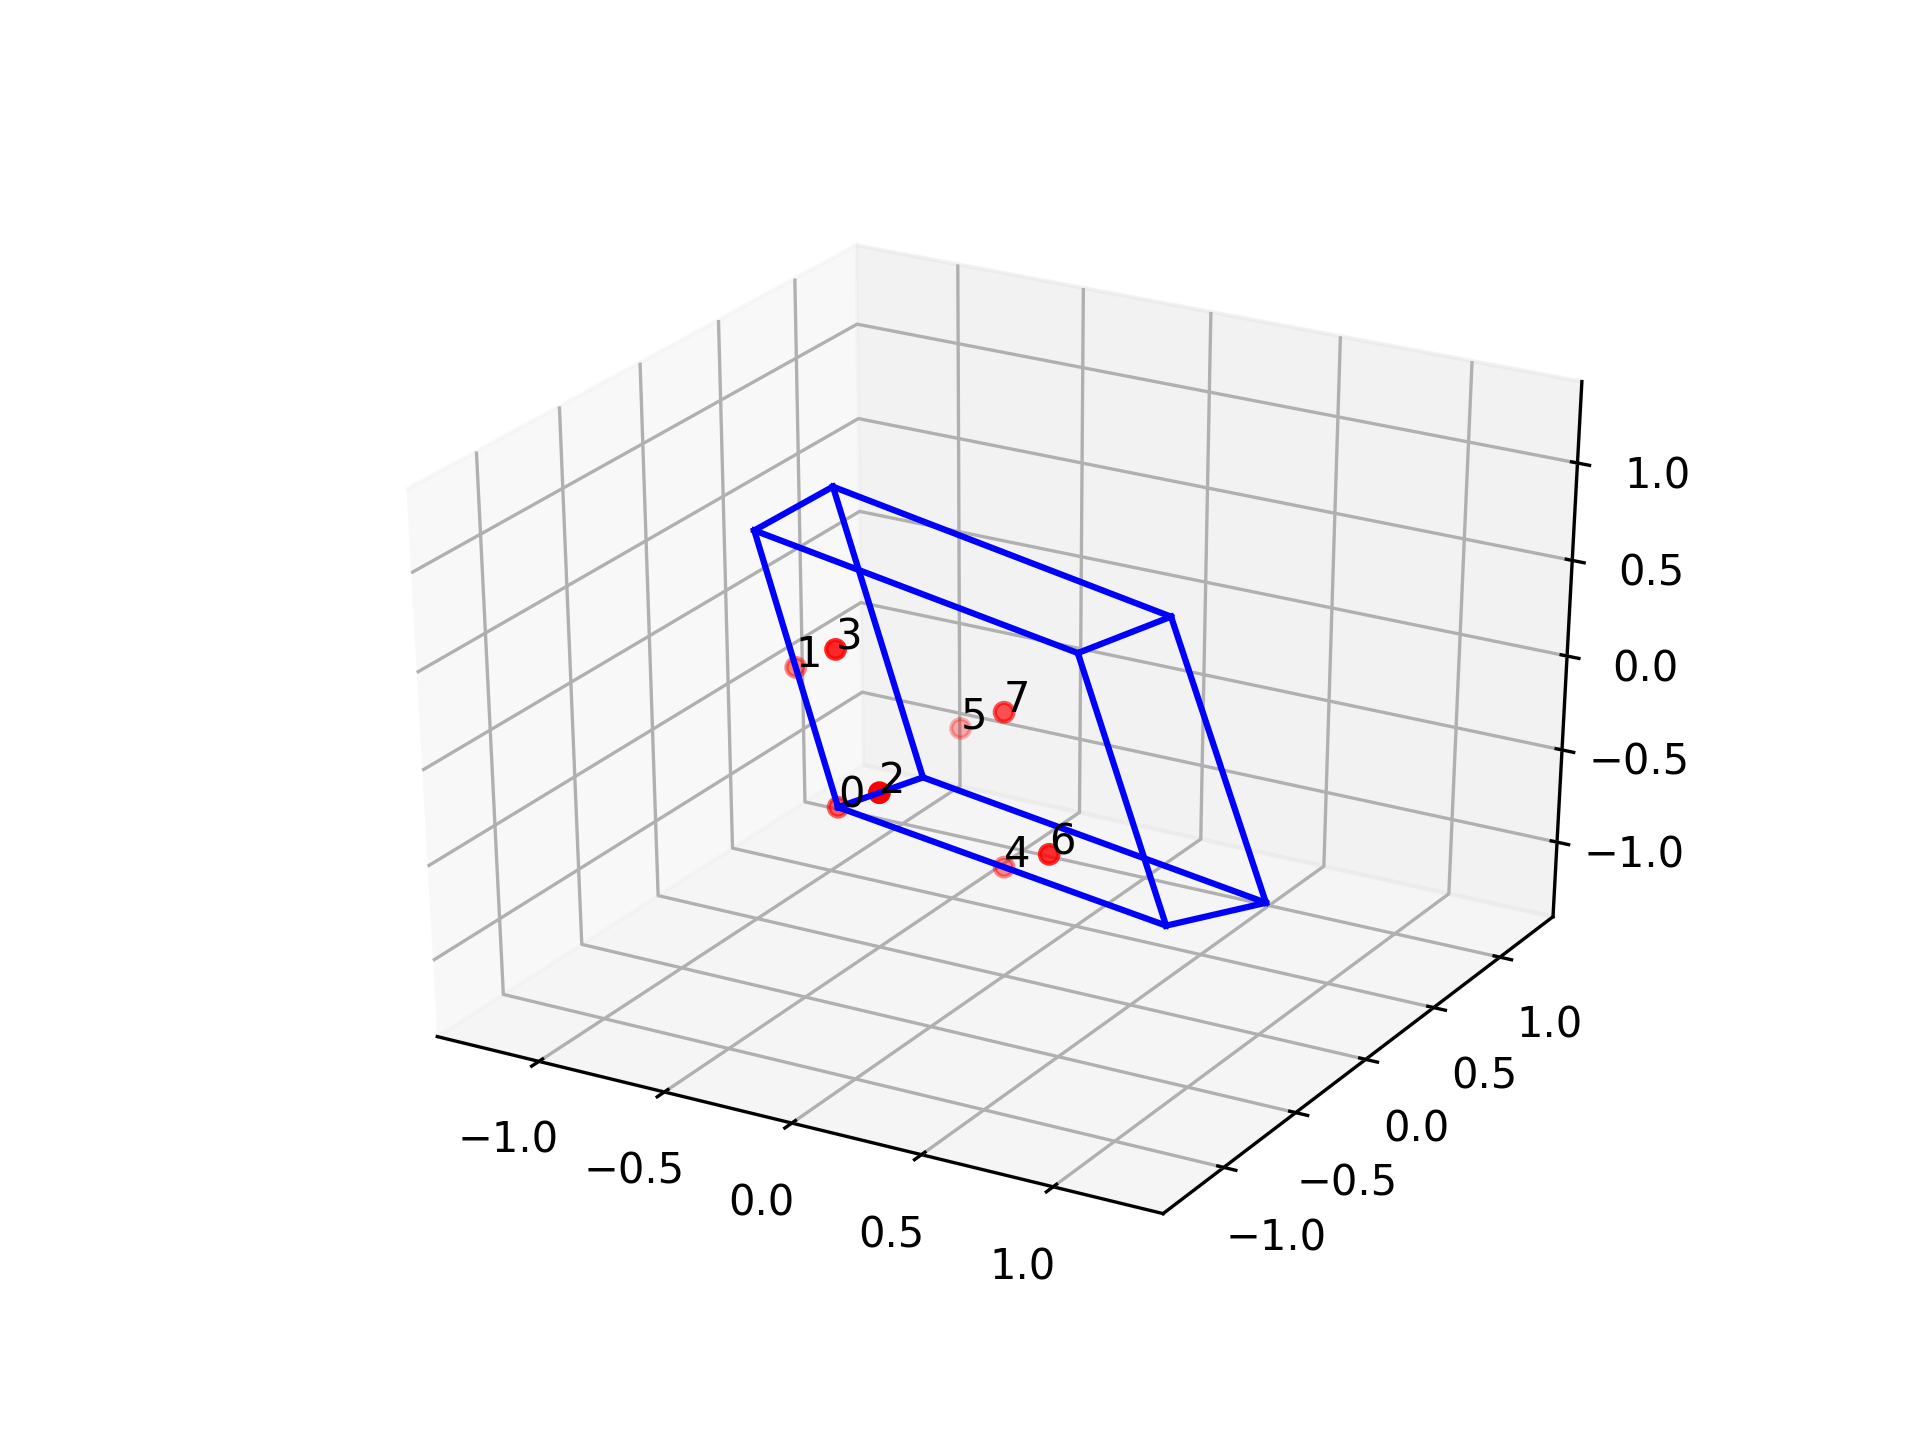

In [37]:
plot_offset = -np.sum(Al_PP.lattice.reciprocal_vectors,1)/2
labels = list(range(len(grid)))
plot_mesh(new_grid, Al_PP.lattice.reciprocal_vectors, plot_offset, labels)

<IPython.core.display.Javascript object>


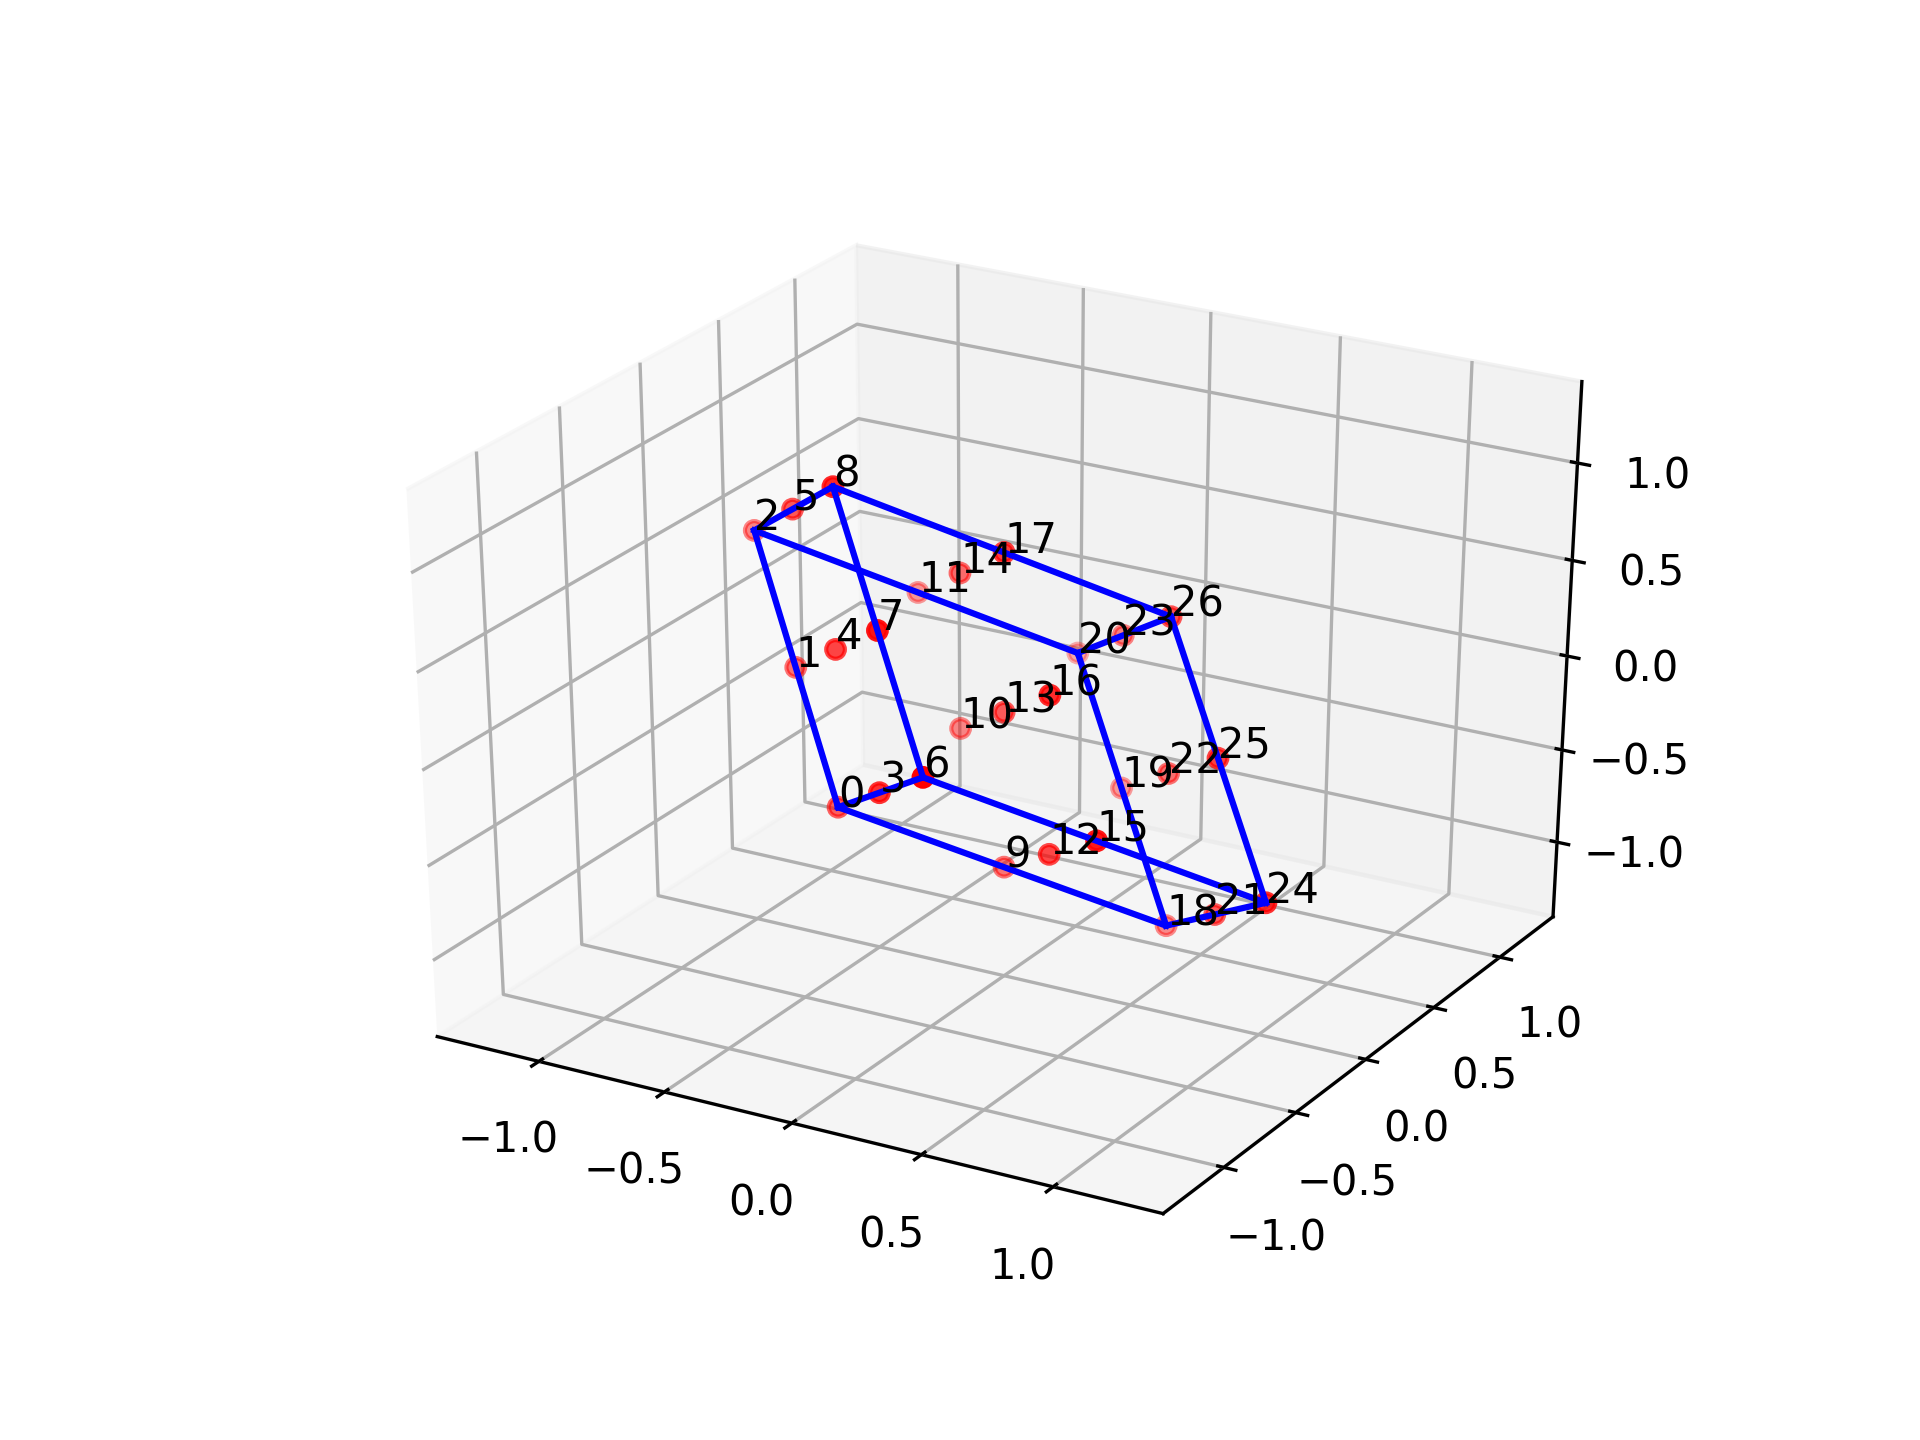

In [38]:
plot_offset = -np.sum(Al_PP.lattice.reciprocal_vectors,1)/2
labels = list(range(len(grid)))
plot_mesh(grid, Al_PP.lattice.reciprocal_vectors, plot_offset, labels)

In [20]:
weights = np.ones(len(tetrahedra))
fermi_level = calc_fermi_level(Al_PP, tetrahedra, weights, grid)

In [21]:
weights = np.ones(len(tetrahedra))
new_fermi_level = calc_fermi_level(Al_PP, new_tetrahedra, weights, new_grid)

In [22]:
fermi_level

9.0313389030537436

In [23]:
new_fermi_level

9.0313389030537436

In [24]:
irr_tet, weights = find_irreducible_tetrahedra(Al_PP, tetrahedra, grid)
new_irr_tet, new_weights = find_irreducible_tetrahedra(Al_PP,
                                          new_tetrahedra, new_grid)

In [25]:
calc_fermi_level(Al_PP, irr_tet, weights, grid)

9.0313389030537436

In [26]:
calc_fermi_level(Al_PP, new_irr_tet, new_weights, new_grid)

9.0313389030537436

In [27]:
weights = np.ones(len(tetrahedra))
calc_total_states(Al_PP, tetrahedra, weights, grid, 3, 3)

0.040169633117147219

In [28]:
weights = np.ones(len(new_tetrahedra))
calc_total_states(Al_PP, new_tetrahedra, weights, new_grid, 3, 3)

0.040169633117147691

### What's going on below?

In [96]:
ndivisions = 2
if type(ndivisions) == int:
    ndivisions = [ndivisions, ndivisions, ndivisions]
ndiv0 = np.array(ndivisions)
ndiv1 = ndiv0+1
ndiv2 = ndiv0+2
offset = np.dot(Al_PP.lattice.reciprocal_vectors, lat_shift) - (
    np.dot(Al_PP.lattice.reciprocal_vectors, grid_shift)/ndivisions)
npts = np.prod(ndiv0)
grid = np.empty(ndiv0, dtype=list)
indices = np.empty(ndiv0, dtype=int)

for k,j,i in product(range(ndiv0[0]), range(ndiv0[1]), range(ndiv0[2])):
    index = int(i + ndiv0[2]*(j + ndiv0[1]*k))
    grid[k,j,i] = np.dot(Al_PP.lattice.reciprocal_vectors, 
                         np.array([i,j,k], dtype=float)/ndiv0) + offset
    indices[k,j,i] = index

extended_grid = np.empty(ndiv2, dtype=list)
for k,j,i in product(range(-1,ndiv2[0]), range(-1,ndiv2[1]), range(-1,ndiv2[2])):
    extended_grid[k,j,i] = np.dot(Al_PP.lattice.reciprocal_vectors, 
                                  np.array([i,j,k], dtype=float)/ndiv0) + offset

# tetrahedra = np.array([t for t in tetrahedra])
# grid = np.array([g.tolist() for g in grid.flatten()])
# extended_grid = np.array([g.tolist() for g in extended_grid.flatten()])
# indices = np.array([i for i in indices.flatten()])

In [ ]:
##### # It goes z, y, x

# new_indices[1:ndiv0[0]+1, 1:ndiv0[1]+1, 1:ndiv0[2]+1] = indices
# new_indices[:,:,ndiv0[2]] = new_indices[:,:,0]
# new_indices[:,:,-1] = new_indices[:,:,0]
# new_indices[:,-1,:] = new_indices[:,0,:]
# new_indices[-1,:,:] = new_indices[0,:,:]
# indices = new_indices

In [62]:
ndivisions = 2
if type(ndivisions) == int:
    ndivisions = [ndivisions, ndivisions, ndivisions]
ndiv0 = np.array(ndivisions)
ndiv1 = ndiv0+1
ndiv2 = ndiv0+2
offset = np.dot(Al_PP.lattice.reciprocal_vectors, lat_shift) - (
    np.dot(Al_PP.lattice.reciprocal_vectors, grid_shift)/ndivisions)
npts = np.prod(ndiv0)
grid = np.empty(ndiv0, dtype=list)
indices = np.empty(ndiv0, dtype=int)

for k,j,i in product(range(ndiv0[0]), range(ndiv0[1]), range(ndiv0[2])):
    index = int(i + ndiv0[2]*(j + ndiv0[1]*k))
    grid[k,j,i] = np.dot(Al_PP.lattice.reciprocal_vectors, 
                         np.array([i,j,k], dtype=float)/ndiv0) + offset
    indices[k,j,i] = index
    
    
extended_indices = np.zeros(np.array(ndiv2), dtype=int)
extended_indices[1:ndiv1[0], 1:ndiv1[1], 1:ndiv1[2]] = indices

extended_indices[:,:,-1] = extended_indices[:,:,1]
extended_indices[:,:,0] = extended_indices[:,:,ndiv0[2]]
extended_indices[:,-1,:] = extended_indices[:,1,:]
extended_indices[:,0,:] = extended_indices[:,ndiv0[1],:]
extended_indices[-1,:,:] = extended_indices[1,:,:]
extended_indices[0,:,:] = extended_indices[ndiv0[0],:,:]

extended_grid = np.empty(ndiv2, dtype=list)
for k,j,i in product(range(-1,ndiv2[0]), range(-1,ndiv2[1]), range(-1,ndiv2[2])):
    extended_grid[k,j,i] = np.dot(Al_PP.lattice.reciprocal_vectors, 
                                  np.array([i,j,k], dtype=float)/ndiv0) + offset

tetrahedra = np.empty(np.prod(ndiv1)*6,dtype=list)
for k,j,i in product(range(ndiv1[0]), range(ndiv1[1]), range(ndiv1[2])):
    submesh = np.empty([8], dtype=list)
    submesh_indices = np.empty([8], dtype=int)
    for kk,kj,ki in product(range(2),repeat=3):        
        submesh[ki + 2*(kj + 2*kk)] = extended_grid[k + kk, j + kj, i + ki]
        submesh_indices[ki + 2*(kj + 2*kk)] = extended_indices[k + kk, j + kj, i + ki]
    # Find the tetrahedra with indexing 1-8.
    sub_tetrahedra = find_tetrahedra(submesh)

    # Replace 1-8 indices with sub_mesh indices.
    for m in range(6):
        # The index of the submeshcell
        ti = m + 6*(i + ndiv0[2]*(j + ndiv0[1]*k))
        tetrahedra[ti] = [0]*4

        for n in range(4):
            tetrahedra[ti][n] = submesh_indices[sub_tetrahedra[m][n]-1]

tetrahedra = np.array([t for t in tetrahedra])
extended_grid = np.array([g.tolist() for g in extended_grid.flatten()])

<IPython.core.display.Javascript object>


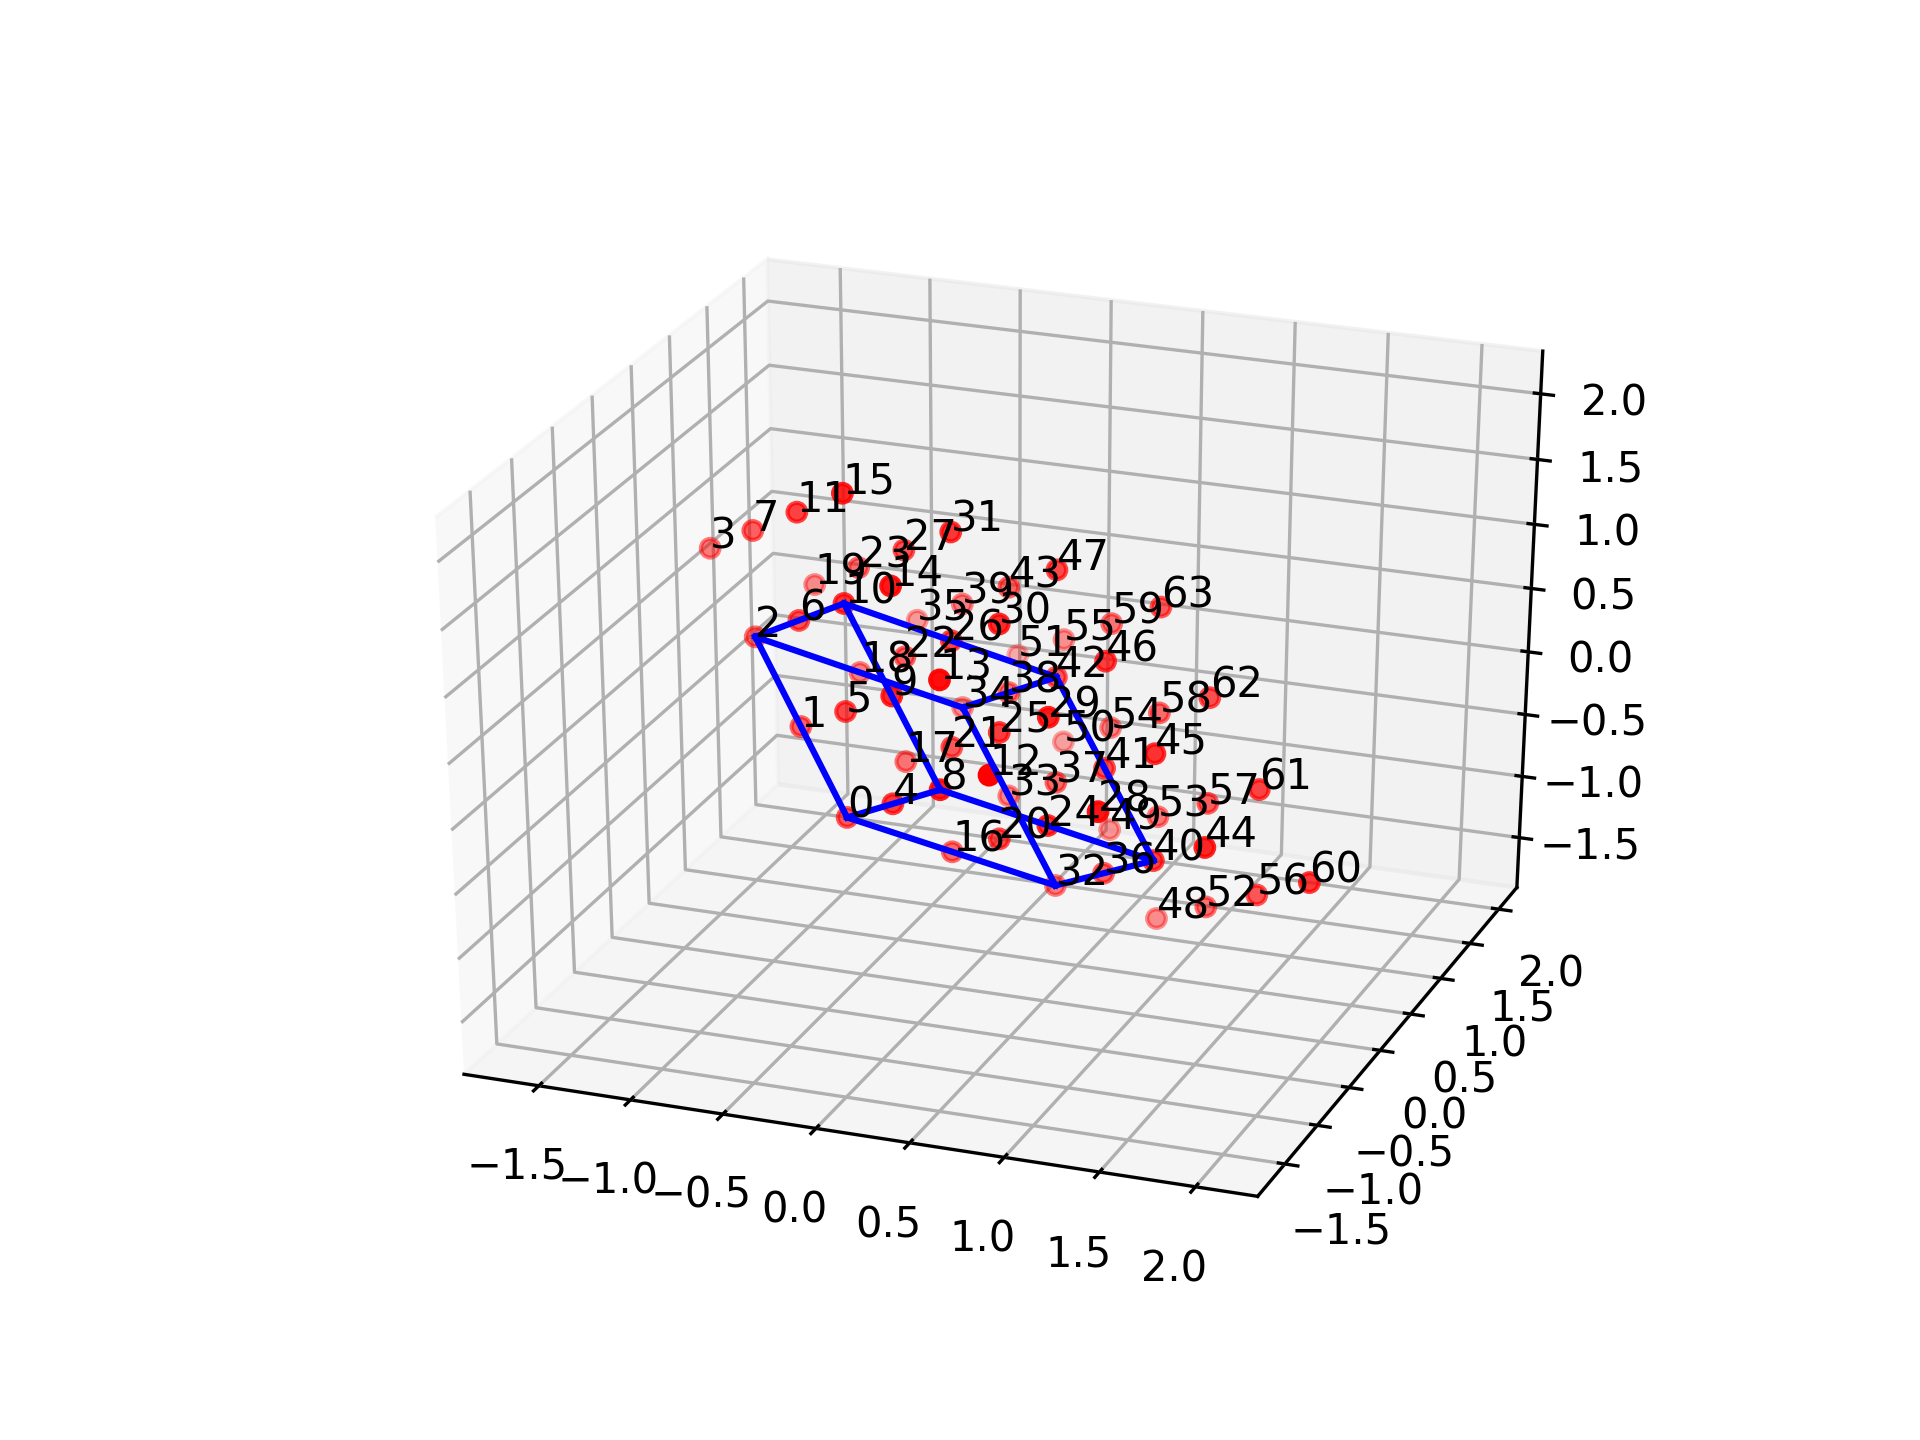

In [63]:
plot_offset = -np.sum(Al_PP.lattice.reciprocal_vectors,1)/2
labels = list(range(len(extended_grid.flatten())))
plot_mesh(extended_grid, Al_PP.lattice.reciprocal_vectors, plot_offset, labels)

Looks like I extended the grid above but kept the traditional indexing.

# Extended Grids

In [96]:
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)
lat_shift = [-1./2]*3
grid_shift = [0.]*3
degree = 1
free = FreeElectronModel(lattice, nvalence, degree)
ndivs = 1

In [97]:
grid, tetrahedra = grid_and_tetrahedra(free, ndivs, lat_shift)
extended_grid, extended_tetrahedra = get_extended_tetrahedra(free, ndivs, lat_shift)

In [98]:
ndivisions = 1
if type(ndivisions) == int:
    ndivisions = [ndivisions, ndivisions, ndivisions]
ndiv0 = np.array(ndivisions)
ndiv1 = ndiv0 + 1
ndiv2 = ndiv0 + 2
ndiv3 = ndiv0 + 3
npts = np.prod(ndiv1)

offset = np.dot(free.lattice.reciprocal_vectors, lat_shift) - (
    np.dot(free.lattice.reciprocal_vectors, grid_shift)/ndivisions)
offset = np.dot(free.lattice.reciprocal_vectors, lat_shift) - (
    np.dot(free.lattice.reciprocal_vectors, grid_shift)/ndivisions)



grid = np.empty(ndiv1, dtype=list)
indices = np.empty(ndiv1, dtype=int)

In [99]:
for k,j,i in product(range(ndiv1[0]), range(ndiv1[1]), range(ndiv1[2])):
    index = int(i + ndiv1[2]*(j + ndiv1[1]*k))
    grid[k,j,i] = np.dot(free.lattice.reciprocal_vectors, 
                         np.array([i,j,k], dtype=float)/ndiv0) + offset
    indices[k,j,i] = index

<IPython.core.display.Javascript object>


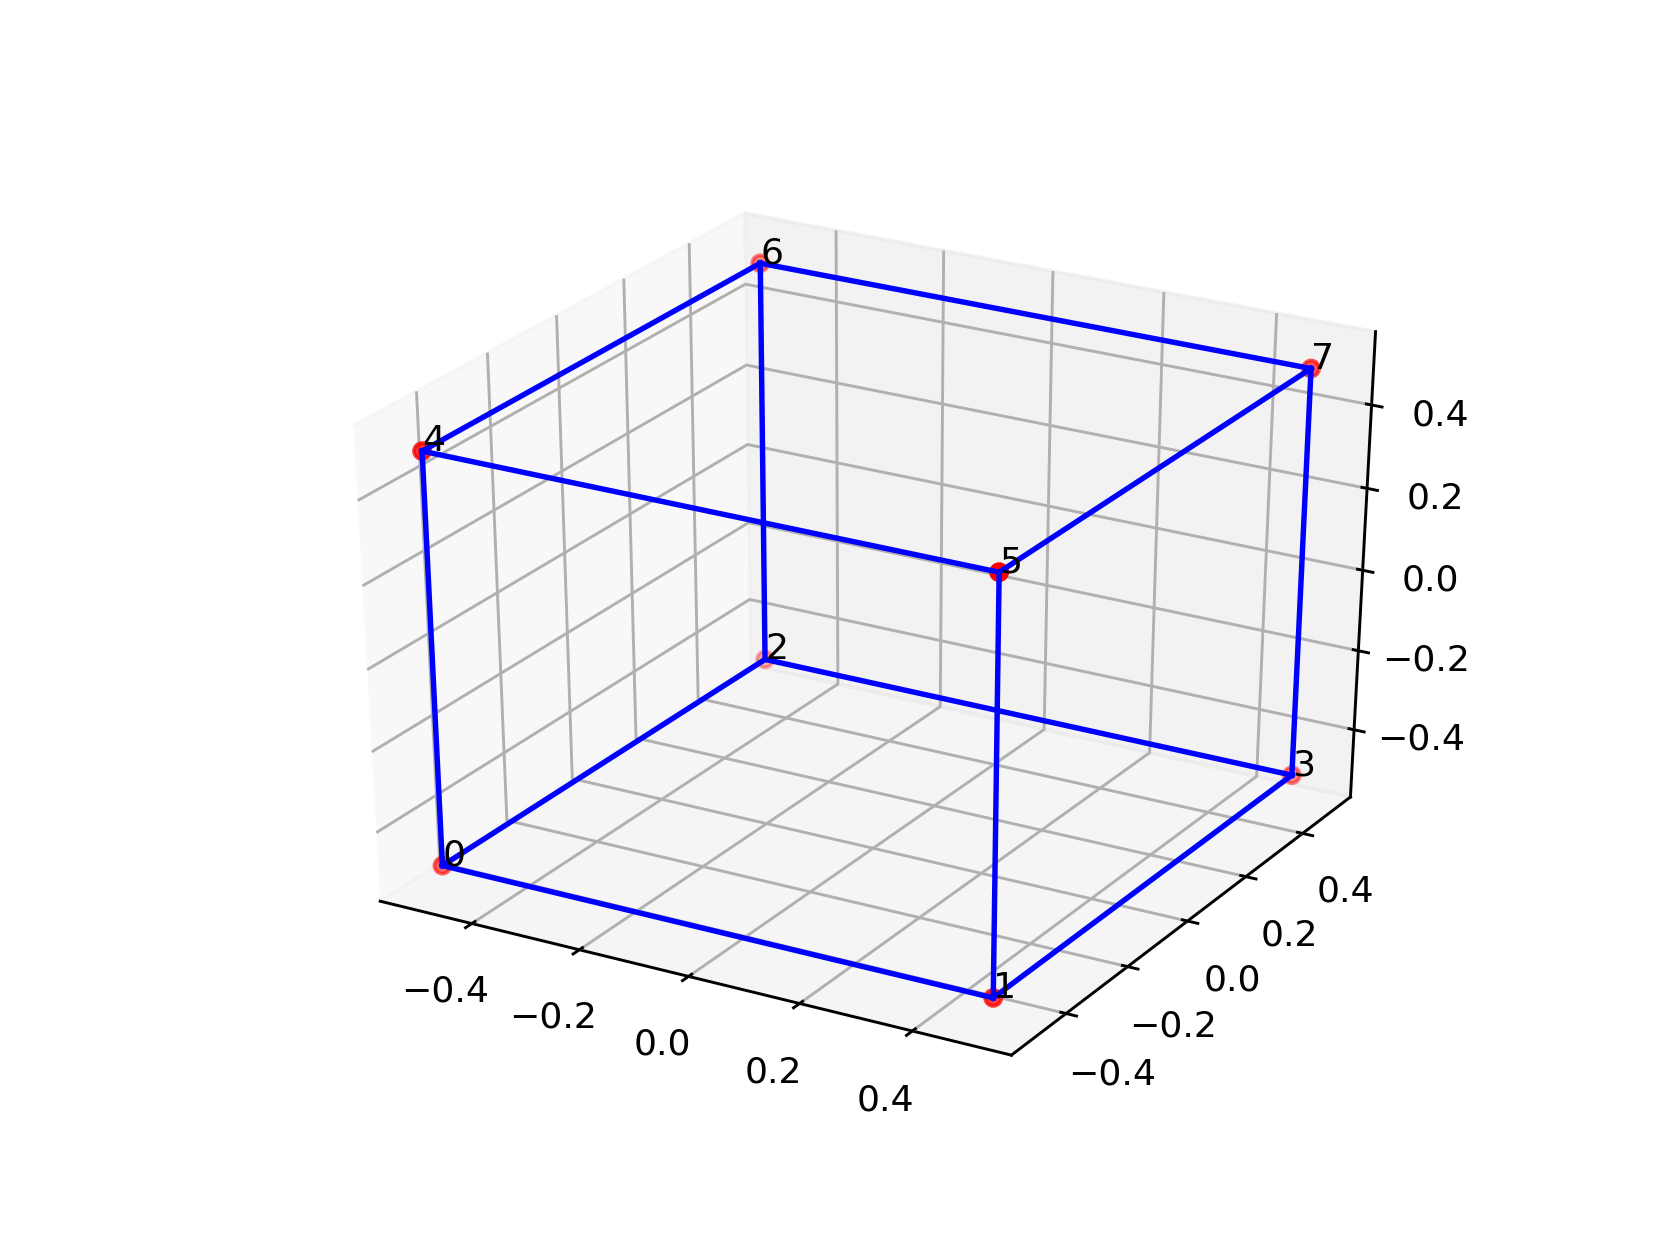

In [101]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
labels = list(range(len(grid.flatten())))
plot_mesh(grid.flatten(), free.lattice.reciprocal_vectors, plot_offset, labels)

In [103]:
grid_shift = [1.]*3
offset = np.dot(free.lattice.reciprocal_vectors, lat_shift) - (
    np.dot(free.lattice.reciprocal_vectors, grid_shift)/ndivisions)

extended_grid = np.empty(ndiv3, dtype=list)
for k,j,i in product(range(ndiv3[0]), range(ndiv3[1]), range(ndiv3[2])):
    extended_grid[k,j,i] = np.dot(free.lattice.reciprocal_vectors,
                                  np.array([i,j,k], dtype=float)/ndiv0) + offset

In [104]:
free.lattice.reciprocal_vectors

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

<IPython.core.display.Javascript object>


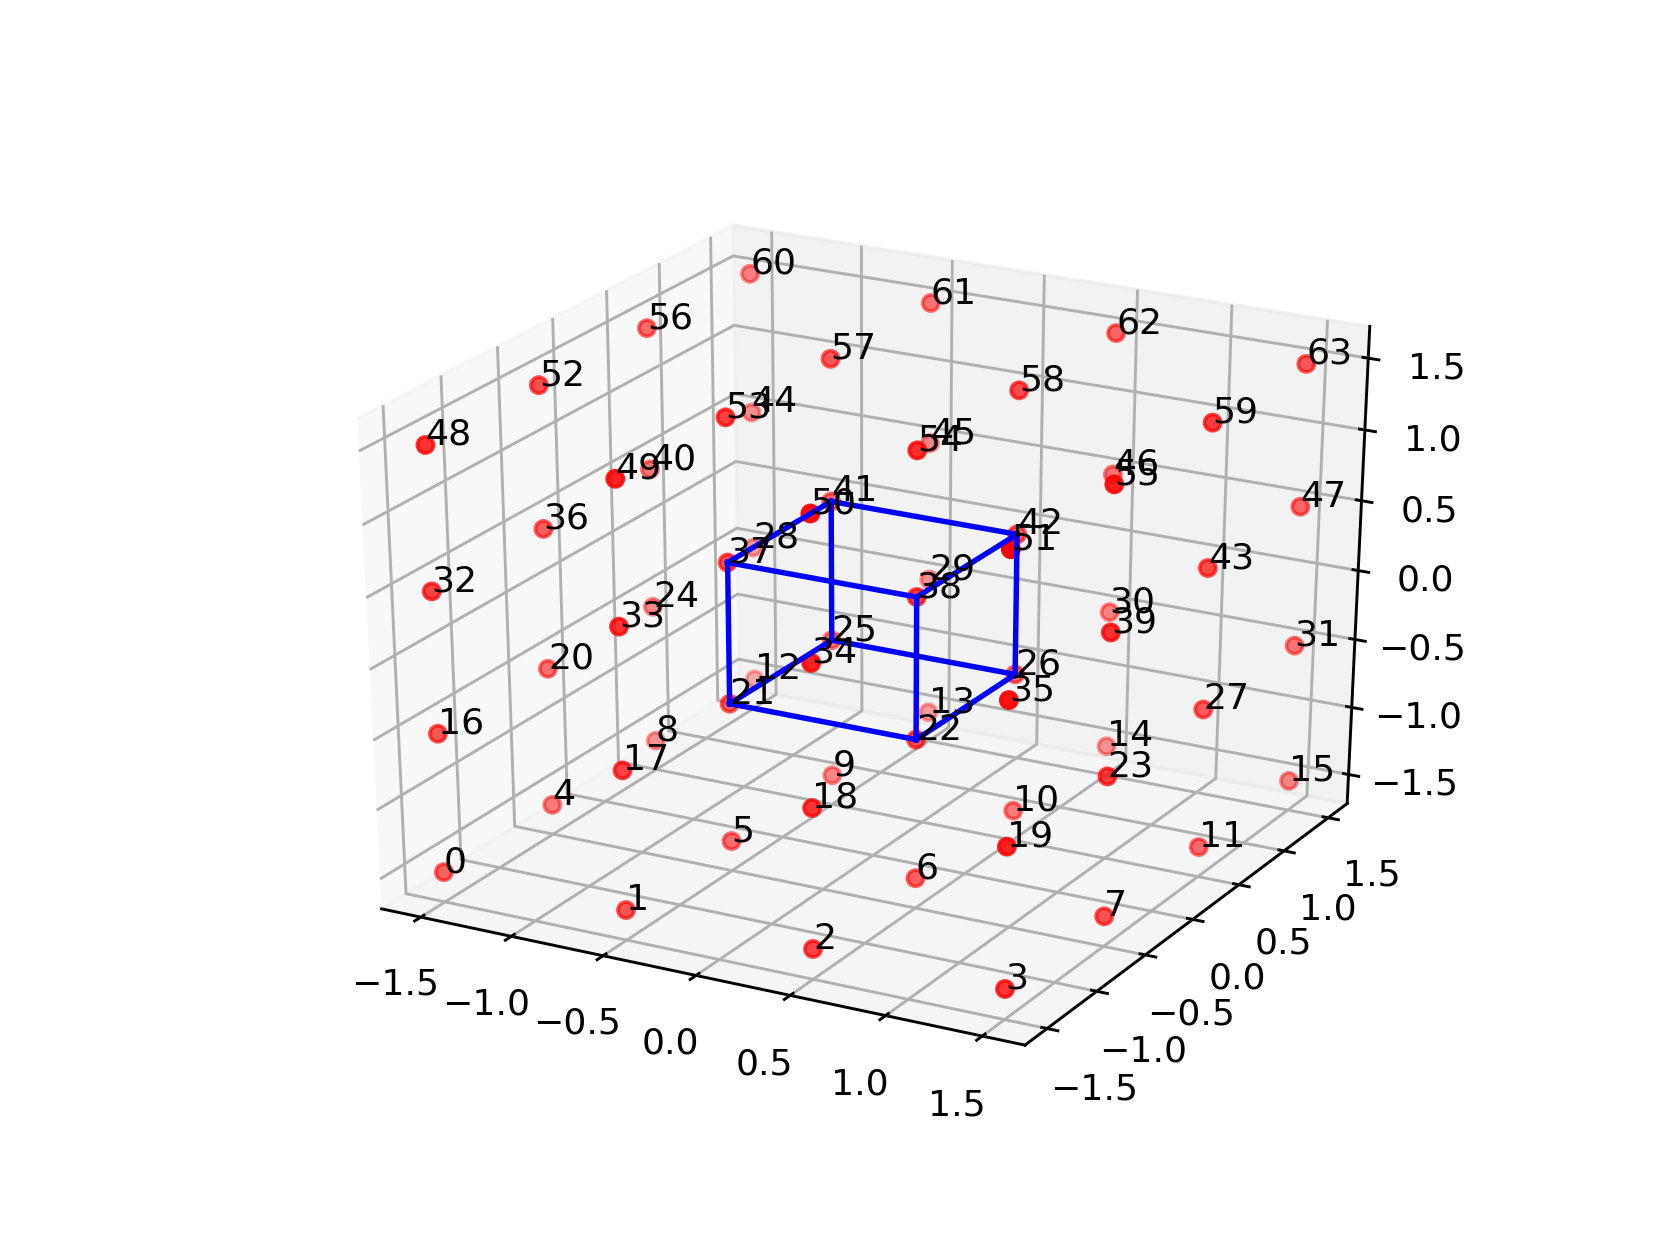

In [105]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
labels = list(range(len(extended_grid.flatten())))
plot_mesh(extended_grid.flatten(), free.lattice.reciprocal_vectors, plot_offset, labels)

In [15]:
ndivisions = 1
if type(ndivisions) == int:
    ndivisions = [ndivisions, ndivisions, ndivisions]
ndiv0 = np.array(ndivisions)
ndiv1 = ndiv0 + 1
ndiv2 = ndiv0 + 2
ndiv3 = ndiv0 + 3
npts = np.prod(ndiv1)

In [16]:
npts

8

In [17]:
extended_indices = np.empty(np.array(ndiv3), dtype=int)
for k,j,i in product(range(ndiv3[0]), range(ndiv3[1]), range(ndiv3[2])):
    if ((i > 0 and i < ndiv2[0]) and (j > 0 and j < ndiv2[1]) and
        (k > 0 and k < ndiv2[2])):
        extended_indices[k,j,i] = (i-1) + (j-1)*ndiv1[1] + (k-1)*ndiv1[0]*ndiv1[1]
    else:
        extended_indices[k,j,i] = i + j*ndiv3[1] + k*ndiv3[0]*ndiv3[1] + npts    

In [18]:
len(extended_grid)

64

In [19]:
len(extended_indices.flatten())

64

<IPython.core.display.Javascript object>


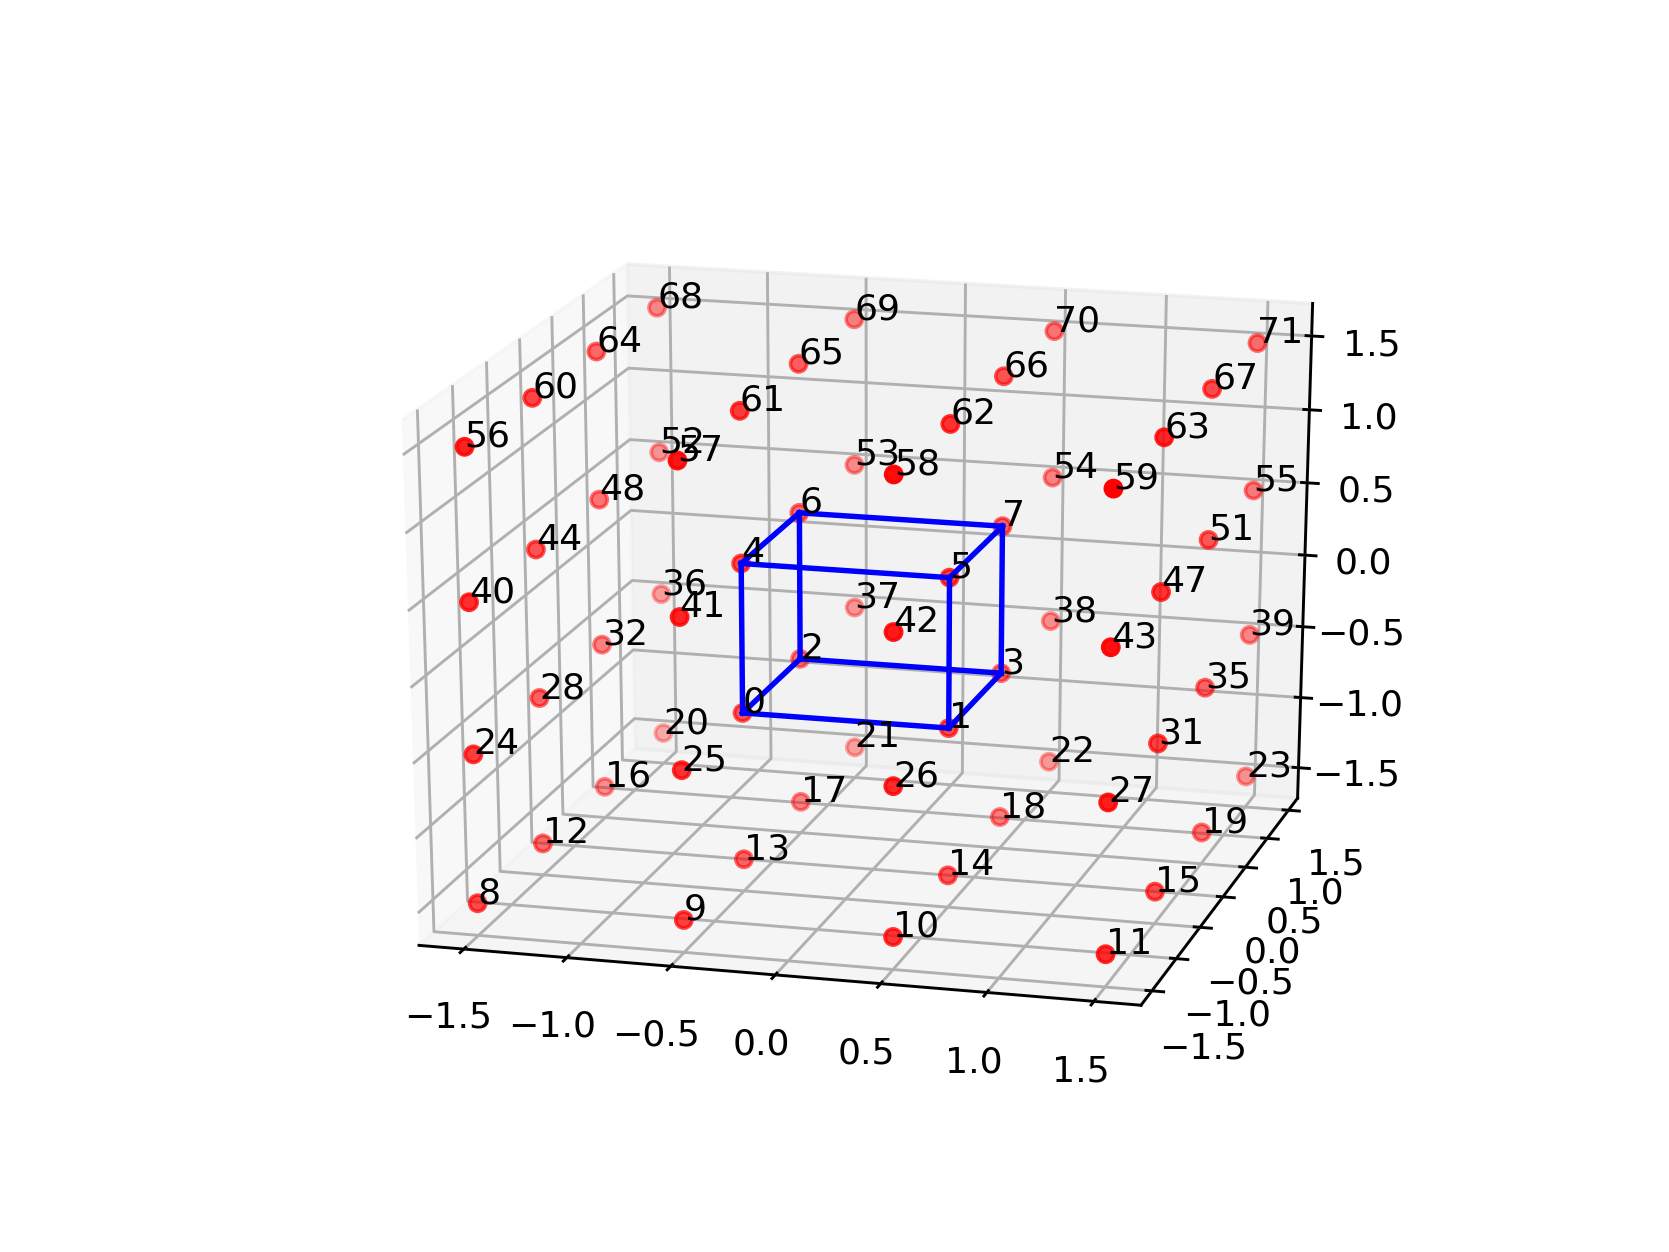

In [24]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
plot_mesh(extended_grid, free.lattice.reciprocal_vectors, plot_offset, extended_indices.flatten())

In [28]:
tetrahedra = np.sort([[2,4,1,8],
                      [4,1,3,8],
                      [1,3,8,7],
                      [1,8,5,7],
                      [1,6,8,5],
                      [2,1,6,8]])

In [30]:
tetrahedra

array([[1, 2, 4, 8],
       [1, 3, 4, 8],
       [1, 3, 7, 8],
       [1, 5, 7, 8],
       [1, 5, 6, 8],
       [1, 2, 6, 8]])

In [31]:
tetrahedra = tetrahedra - 1
tetrahedra

array([[0, 1, 3, 7],
       [0, 2, 3, 7],
       [0, 2, 6, 7],
       [0, 4, 6, 7],
       [0, 4, 5, 7],
       [0, 1, 5, 7]])

In [50]:
tests = [[8,9,12,13,24,25,28,0],
         [9,10,13,14,25,26,0,1],
         [12,13,16,17,28,0,32,2],
         [13,14,17,18,0,1,2,3],
         [24,25,28,0,40,41,44,4],
         [25,26,0,1,41,42,4,5],
         [28,0,32,2,44,4,48,6],
         [0,1,2,3,4,5,6,7]]

In [68]:
adjacent_tet_list = []
for test in tests:
    for tet in tetrahedra:
        adjacent_tet_list.append([])
        for index in tet:
            adjacent_tet_list[-1].append(test[index])
        adjacent_tet_list[-1] = np.sort(adjacent_tet_list[-1]).tolist()
        if adjacent_tet_list[-1][0] != 0:
            del adjacent_tet_list[-1]

In [69]:
adjacent_tet_list

[[0, 8, 9, 13],
 [0, 8, 12, 13],
 [0, 8, 12, 28],
 [0, 8, 24, 28],
 [0, 8, 24, 25],
 [0, 8, 9, 25],
 [0, 1, 9, 13],
 [0, 1, 9, 25],
 [0, 2, 12, 28],
 [0, 2, 12, 13],
 [0, 2, 3, 13],
 [0, 1, 3, 13],
 [0, 4, 24, 25],
 [0, 4, 24, 28],
 [0, 1, 5, 25],
 [0, 4, 5, 25],
 [0, 2, 6, 28],
 [0, 4, 6, 28],
 [0, 1, 3, 7],
 [0, 2, 3, 7],
 [0, 2, 6, 7],
 [0, 4, 6, 7],
 [0, 4, 5, 7],
 [0, 1, 5, 7]]

In [72]:
calc_adj_tet = find_adjacent_tetrahedra(extended_tetrahedra, 0)

In [73]:
for tet1 in adjacent_tet_list:
    contained = False
    for tet2 in calc_adj_tet:
        tet2 = np.sort(tet2)
        if np.allclose(tet1, tet2):
            contained = True
    print(contained)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
ndivisions = [2]*3
ndiv0 = np.array(ndivisions)
ndiv1 = ndiv0 + 1
ndiv2 = ndiv0 + 2
npts = np.prod(ndiv0)
extended_indices = np.zeros(np.array(ndiv2), dtype=int)
for k,j,i in product(range(-2,ndiv1[0]), range(-2,ndiv1[1]), range(-2,ndiv1[2])):

    if ((i > -1 and (i < (ndiv1[0]-1))) and ((j > -1) and (j < (ndiv1[1]-1)))
        and ((k > -1) and (k < (ndiv1[2]-1)))):
        index = int(i + ndiv0[2]*(j + ndiv0[1]*k)) - npts + 1
    else:
        index = int(i + ndiv2[2]*(j + ndiv2[1]*k)) + npts
    extended_indices[k,j,i] = index
extended_indices = np.array([ei for ei in extended_indices.flatten()])

<IPython.core.display.Javascript object>


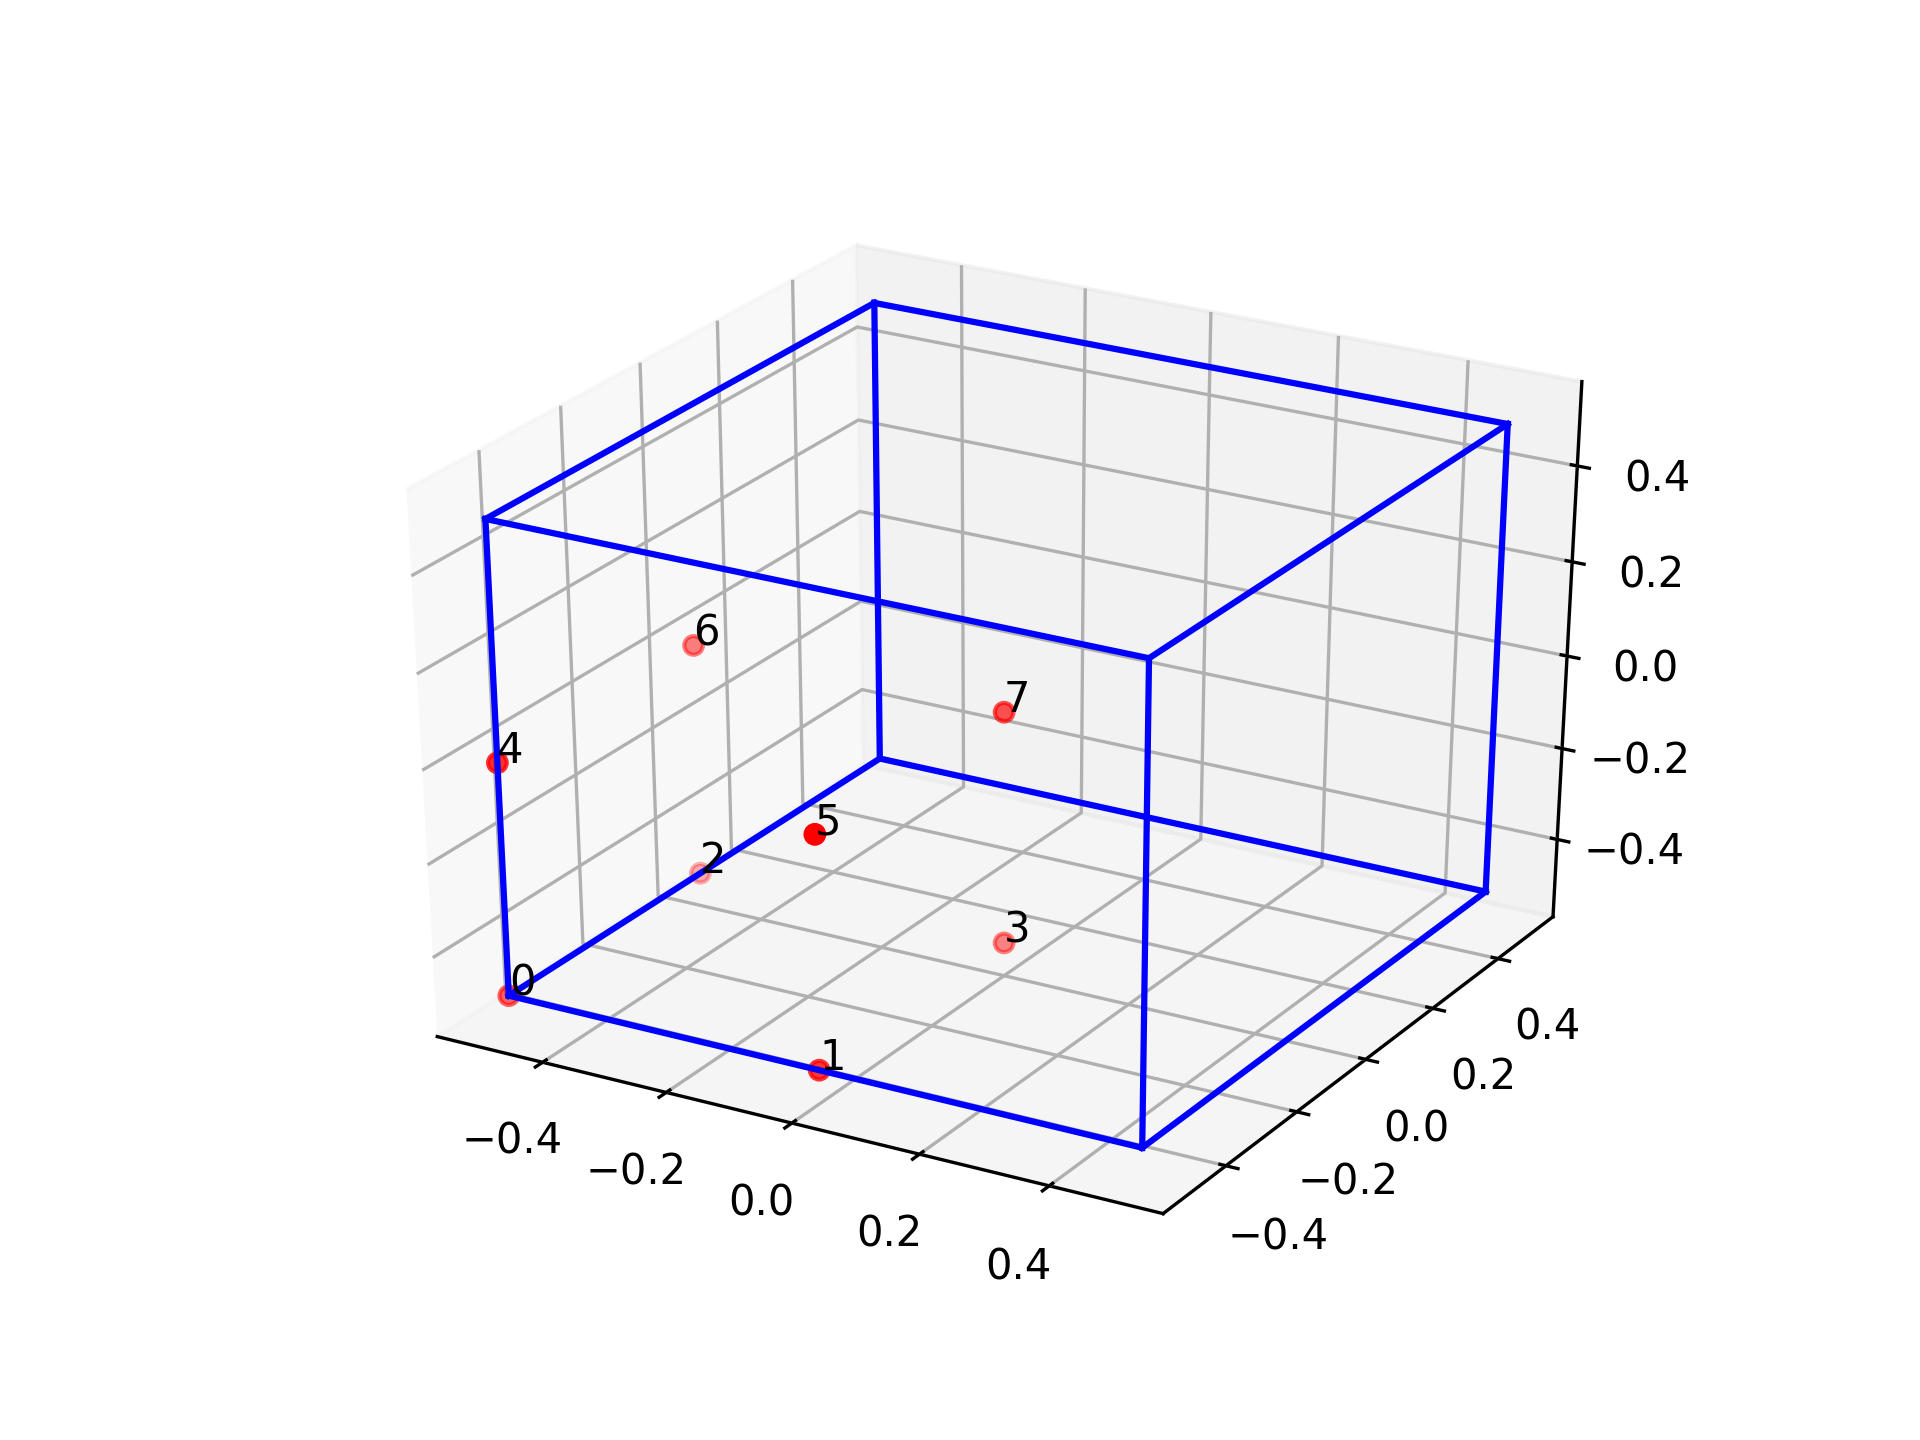

In [45]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
labels = list(range(len(grid.flatten())))
plot_mesh(grid, free.lattice.reciprocal_vectors, plot_offset, labels)

In [46]:
grid

array([[-0.5, -0.5, -0.5],
       [ 0. , -0.5, -0.5],
       [-0.5,  0. , -0.5],
       [ 0. ,  0. , -0.5],
       [-0.5, -0.5,  0. ],
       [ 0. , -0.5,  0. ],
       [-0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ]])

In [47]:
inside_ind = [21,22,25,26,37,38,41,42]
inside_pts =[extended_grid[i] for i in inside_ind]
inside_ind = [extended_indices[i] for i in inside_ind]

<IPython.core.display.Javascript object>


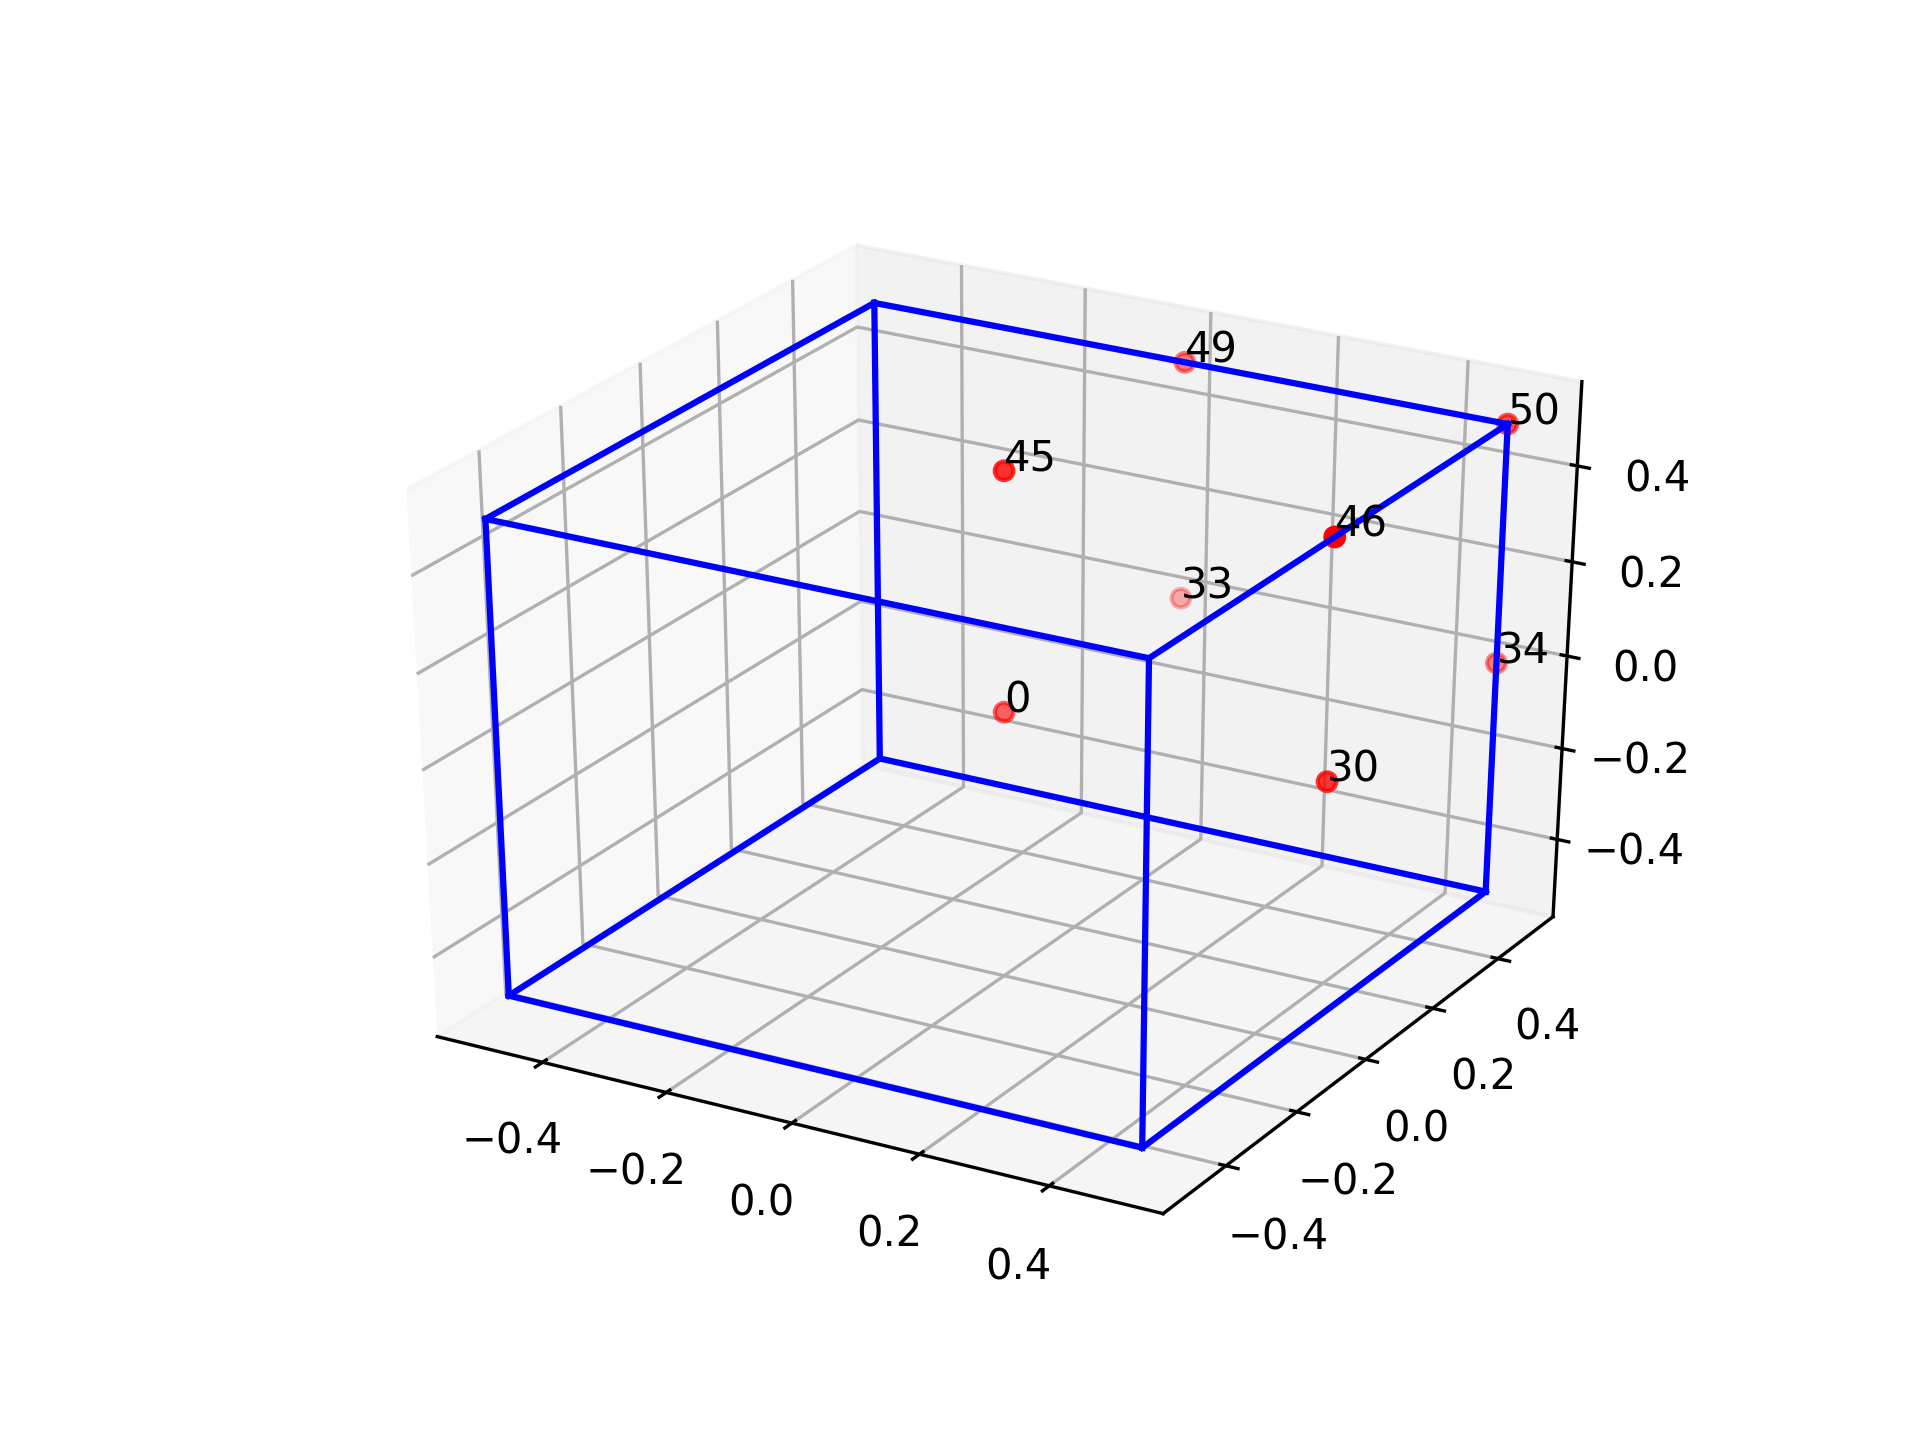

In [48]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
# plot_offset = [0,0,0]
plot_mesh(inside_pts, free.lattice.reciprocal_vectors, plot_offset, inside_ind)

In [49]:
extended_grid[22]

array([ 0.5,  0. ,  0. ])

In [50]:
extended_grid[25]

array([ 0. ,  0.5,  0. ])

In [51]:
extended_grid[26]

array([ 0.5,  0.5,  0. ])

In [52]:
extended_grid[37]

array([ 0. ,  0. ,  0.5])

In [53]:
extended_grid[38]

array([ 0.5,  0. ,  0.5])

In [54]:
extended_grid[41]

array([ 0. ,  0.5,  0.5])

In [55]:
extended_grid[42]

array([ 0.5,  0.5,  0.5])

<IPython.core.display.Javascript object>


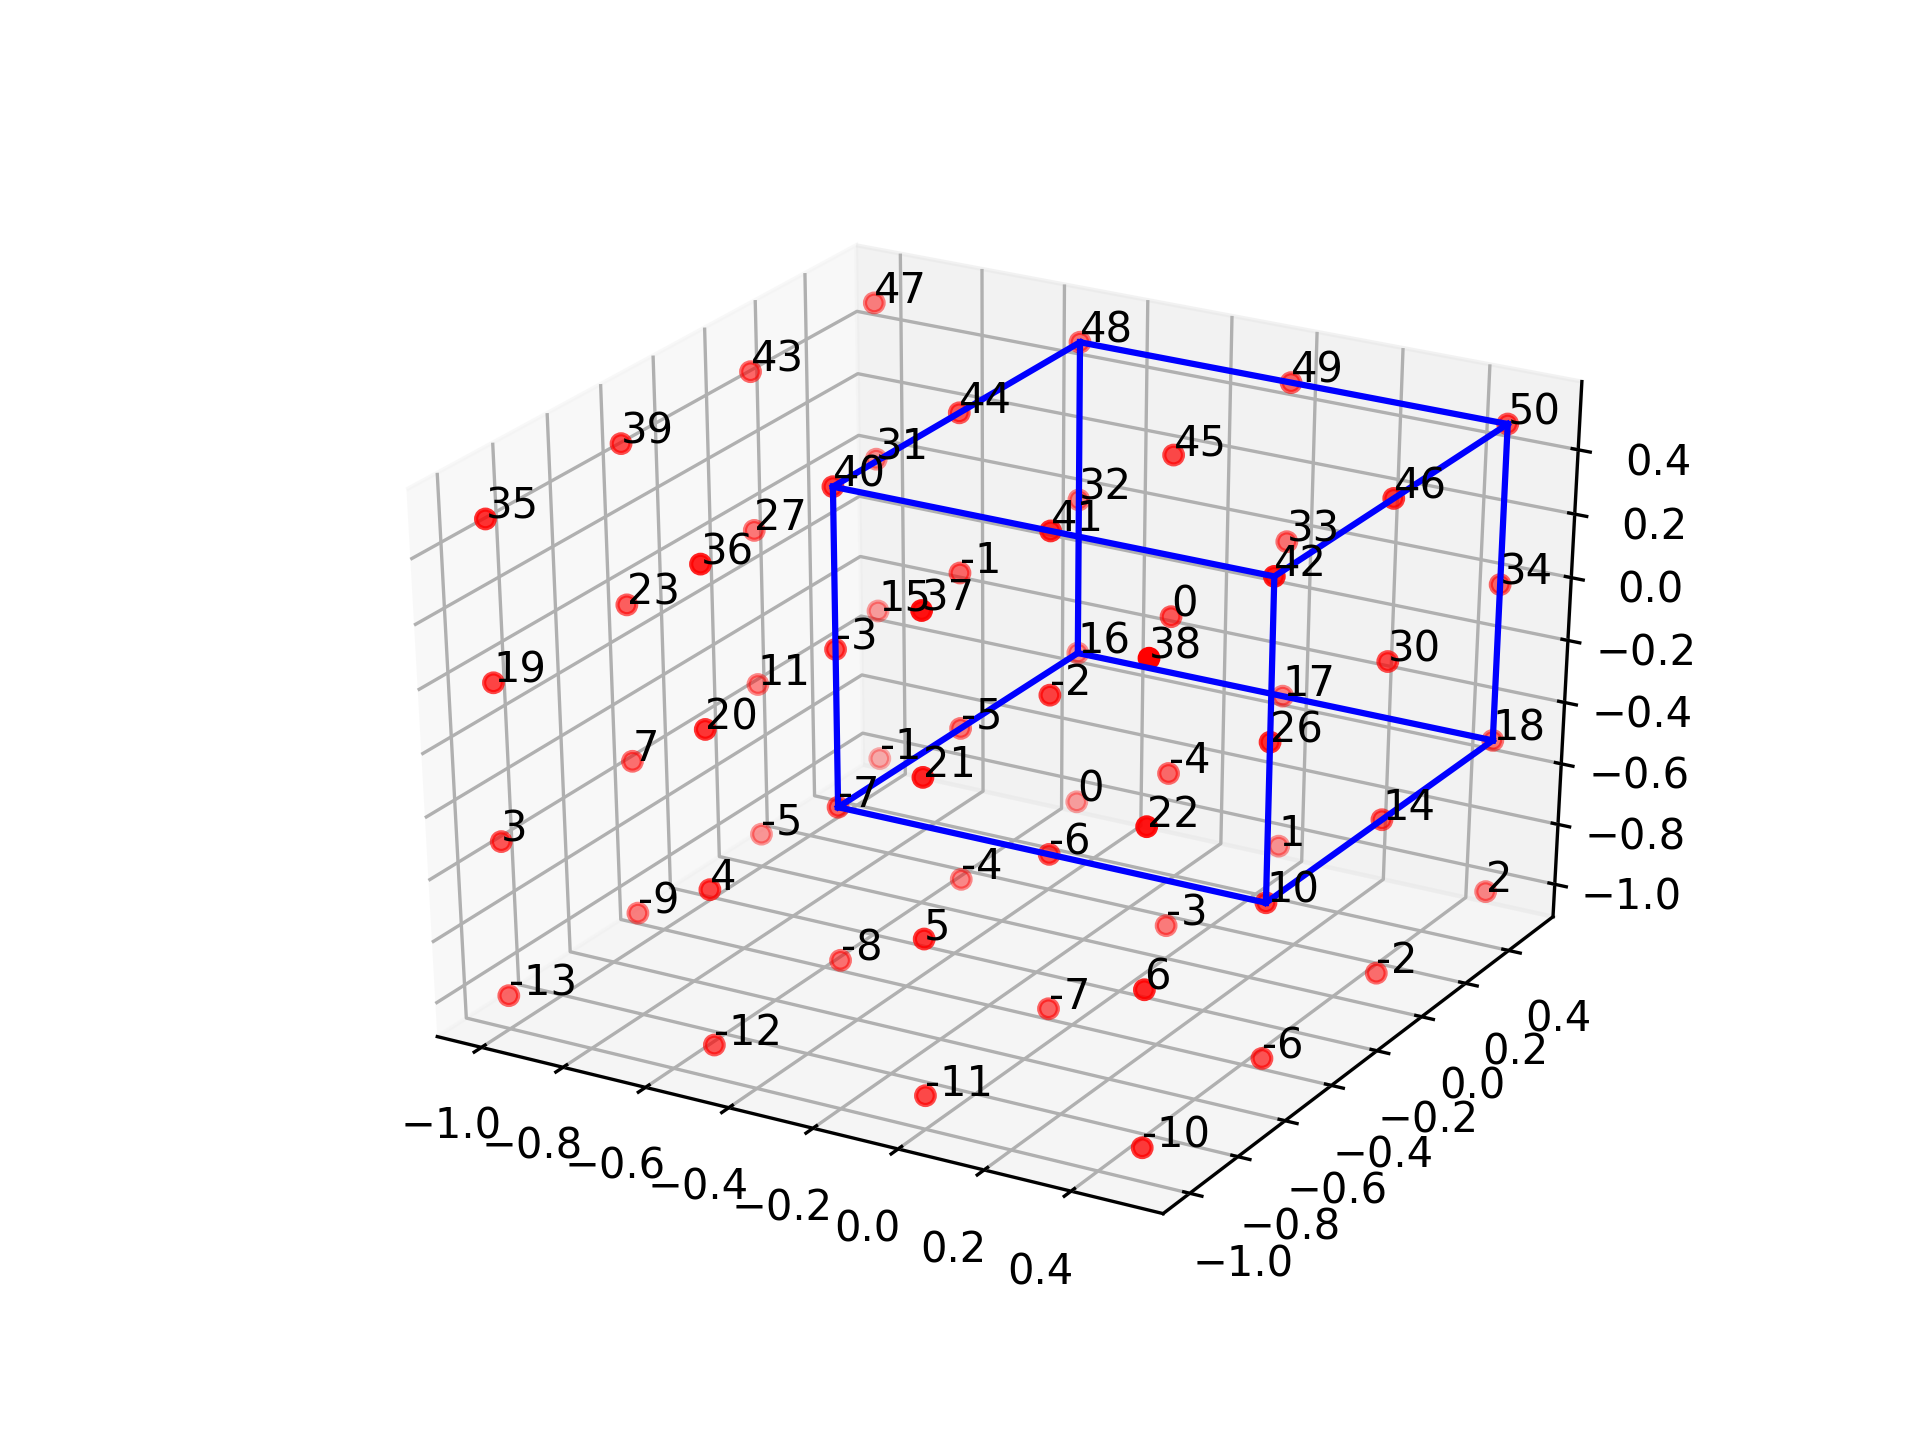

In [56]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
labels = list(range(len(extended_grid.flatten())))
plot_mesh(extended_grid, free.lattice.reciprocal_vectors, plot_offset, extended_indices)

In [151]:
extended_tetrahedra

array([[ 8,  9, 13,  0],
       [ 8, 12, 13,  0],
       [ 8, 12, 28,  0],
       [ 8, 24, 28,  0],
       [ 8, 24, 25,  0],
       [ 8,  9, 25,  0],
       [ 9, 10, 14,  1],
       [ 9, 13, 14,  1],
       [ 9, 13,  0,  1],
       [ 9, 25,  0,  1],
       [ 9, 25, 26,  1],
       [ 9, 10, 26,  1],
       [10, 11, 15, 31],
       [10, 14, 15, 31],
       [10, 14,  1, 31],
       [10, 26,  1, 31],
       [10, 26, 27, 31],
       [10, 11, 27, 31],
       [12, 13, 17,  2],
       [12, 16, 17,  2],
       [12, 16, 32,  2],
       [12, 28, 32,  2],
       [12, 28,  0,  2],
       [12, 13,  0,  2],
       [13, 14, 18,  3],
       [13, 17, 18,  3],
       [13, 17,  2,  3],
       [13,  0,  2,  3],
       [13,  0,  1,  3],
       [13, 14,  1,  3],
       [14, 15, 19, 35],
       [14, 18, 19, 35],
       [14, 18,  3, 35],
       [14,  1,  3, 35],
       [14,  1, 31, 35],
       [14, 15, 31, 35],
       [16, 17, 21, 37],
       [16, 20, 21, 37],
       [16, 20, 36, 37],
       [16, 32, 36, 37],


In [150]:
free.fermi_level = free.fermi_level_ans
total_energy = get_corrected_total_energy(free, tetrahedra, extended_tetrahedra, grid, extended_grid)

('tetrahedron: ', array([1, 0, 7, 3]))
('ki: ', 1)
('number adjacent: ', 24)
('ki: ', 0)
('number adjacent: ', 24)
('ki: ', 7)
('number adjacent: ', 24)


IndexError: index 64 is out of bounds for axis 0 with size 64

In [35]:
ndivisions=3
if type(ndivisions) == int:
    ndivisions = [ndivisions, ndivisions, ndivisions]
ndiv0 = np.array(ndivisions)
ndiv1 = ndiv0+1
ndiv2 = ndiv0+2
offset = np.dot(Al_PP.lattice.reciprocal_vectors, lat_shift) - (
    np.dot(Al_PP.lattice.reciprocal_vectors, grid_shift)/ndivisions)
npts = np.prod(ndiv0)
grid = np.empty(ndiv0, dtype=list)
indices = np.empty(ndiv0, dtype=int)

for k,j,i in product(range(ndiv0[0]), range(ndiv0[1]), range(ndiv0[2])):
    index = int(i + ndiv0[2]*(j + ndiv0[1]*k))
    grid[k,j,i] = np.dot(Al_PP.lattice.reciprocal_vectors, 
                         np.array([i,j,k], dtype=float)/ndiv0) + offset
    indices[k,j,i] = index

extended_indices = np.zeros(np.array(ndiv2), dtype=int)

for k,j,i in product(range(0,ndiv2[0]), range(0,ndiv2[1]), range(0,ndiv2[2])):
    if (i > 0 and i < ndiv1[0]) and (j > 0 and j < ndiv1[1]) and (k > 0 and k < ndiv1[2]):
        extended_indices[k,j,i] = (i-1) + (j-1)*ndiv0[1] + (k-1)*ndiv0[0]*ndiv0[1]

    else:
        extended_indices[k,j,i] = i + j*ndiv2[1] + k*ndiv2[0]*ndiv2[1] + npts

extended_grid = np.empty(ndiv2, dtype=list)
for k,j,i in product(range(-1,ndiv2[0]), range(-1,ndiv2[1]), range(-1,ndiv2[2])):
    extended_grid[k,j,i] = np.dot(Al_PP.lattice.reciprocal_vectors,
                                  np.array([i,j,k], dtype=float)/ndiv0) + offset

In [36]:
extended_indices = np.zeros(np.array(ndiv2), dtype=int)

for k,j,i in product(range(0,ndiv2[0]), range(0,ndiv2[1]), range(0,ndiv2[2])):
    if (i > 0 and i < ndiv1[0]) and (j > 0 and j < ndiv1[1]) and (k > 0 and k < ndiv1[2]):
        extended_indices[k,j,i] = (i-1) + (j-1)*ndiv0[1] + (k-1)*ndiv0[0]*ndiv0[1]

    else:
        extended_indices[k,j,i] = i + j*ndiv2[1] + k*ndiv2[0]*ndiv2[1] + npts¯

In [37]:
extended_indices.flatten()

array([ 27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,   0,   1,   2,  61,  62,   3,   4,   5,
        66,  67,   6,   7,   8,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,   9,  10,  11,  86,  87,  12,  13,  14,  91,
        92,  15,  16,  17,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107,  18,  19,  20, 111, 112,  21,  22,  23, 116, 117,
        24,  25,  26, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151])

In [38]:
def convert_tet_index(tetind, ndiv0):
    """Convert the index of a k-point into its position in the array containing
    all the k-points in the grid. Only applicable to Blochl's tetrahedron method.
    
    Args:
        tetind (int): the index of the tetrahedron
        ndivs (numpy.ndarray): a array of the number of divisions made creating the grid.
    Return:
        tetind (int): the position of the k-point in the grid.
    """
    
    npts = np.prod(ndiv0)
    ndiv2 = ndiv0 + 2
        if tetind < npts:
            page = 1
            column = 1
            while tetind >= ndiv0[0]*ndiv0[1]:
                page += 1
                tetind -= (ndiv0[0]*ndiv0[1])
            while tetind >= ndiv0[0]:
                column += 1
                tetind -= ndiv0[0]
            return page*ndiv2[0]*ndiv2[1] + column*ndiv2[0] + 1 + tetind
        else:
            return tetind - npts

('outside: ', 0)
('outside: ', 1)
('outside: ', 2)
('outside: ', 3)
('outside: ', 4)
('outside: ', 5)
('outside: ', 6)
('outside: ', 7)
('outside: ', 8)
('outside: ', 9)
('outside: ', 10)
('outside: ', 11)
('outside: ', 12)
('outside: ', 13)
('outside: ', 14)
('outside: ', 15)
('outside: ', 16)
('outside: ', 17)
('outside: ', 18)
('outside: ', 19)
('outside: ', 20)
('outside: ', 21)
('outside: ', 22)
('outside: ', 23)
('outside: ', 24)
('outside: ', 25)
('outside: ', 26)
('outside: ', 27)
('outside: ', 28)
('outside: ', 29)
('outside: ', 30)
31
32
33
('outside: ', 34)
('outside: ', 35)
36
37
38
('outside: ', 39)
('outside: ', 40)
41
42
43
('outside: ', 44)
('outside: ', 45)
('outside: ', 46)
('outside: ', 47)
('outside: ', 48)
('outside: ', 49)
('outside: ', 50)
('outside: ', 51)
('outside: ', 52)
('outside: ', 53)
('outside: ', 54)
('outside: ', 55)
56
57
58
('outside: ', 59)
('outside: ', 60)
61
62
63
('outside: ', 64)
('outside: ', 65)
66
67
68
('outside: ', 69)
('outside: ', 70)
('

In [43]:
for i in extended_indices.flatten():
    if i < npts:
        page = 1
        column = 1
        while i >= ndiv0[0]*ndiv0[1]:
            page += 1
            i -= (ndiv0[0]*ndiv0[1])
        while i >= ndiv0[0]:
            column += 1
            i -= ndiv0[0]
        print(page*ndiv2[0]*ndiv2[1] + column*ndiv2[0] + 1 + i)
    else:
        print("outside: ", i-npts)

('outside: ', 0)
('outside: ', 1)
('outside: ', 2)
('outside: ', 3)
('outside: ', 4)
('outside: ', 5)
('outside: ', 6)
('outside: ', 7)
('outside: ', 8)
('outside: ', 9)
('outside: ', 10)
('outside: ', 11)
('outside: ', 12)
('outside: ', 13)
('outside: ', 14)
('outside: ', 15)
('outside: ', 16)
('outside: ', 17)
('outside: ', 18)
('outside: ', 19)
('outside: ', 20)
('outside: ', 21)
('outside: ', 22)
('outside: ', 23)
('outside: ', 24)
('outside: ', 25)
('outside: ', 26)
('outside: ', 27)
('outside: ', 28)
('outside: ', 29)
('outside: ', 30)
31
32
33
('outside: ', 34)
('outside: ', 35)
36
37
38
('outside: ', 39)
('outside: ', 40)
41
42
43
('outside: ', 44)
('outside: ', 45)
('outside: ', 46)
('outside: ', 47)
('outside: ', 48)
('outside: ', 49)
('outside: ', 50)
('outside: ', 51)
('outside: ', 52)
('outside: ', 53)
('outside: ', 54)
('outside: ', 55)
56
57
58
('outside: ', 59)
('outside: ', 60)
61
62
63
('outside: ', 64)
('outside: ', 65)
66
67
68
('outside: ', 69)
('outside: ', 70)
('

<IPython.core.display.Javascript object>


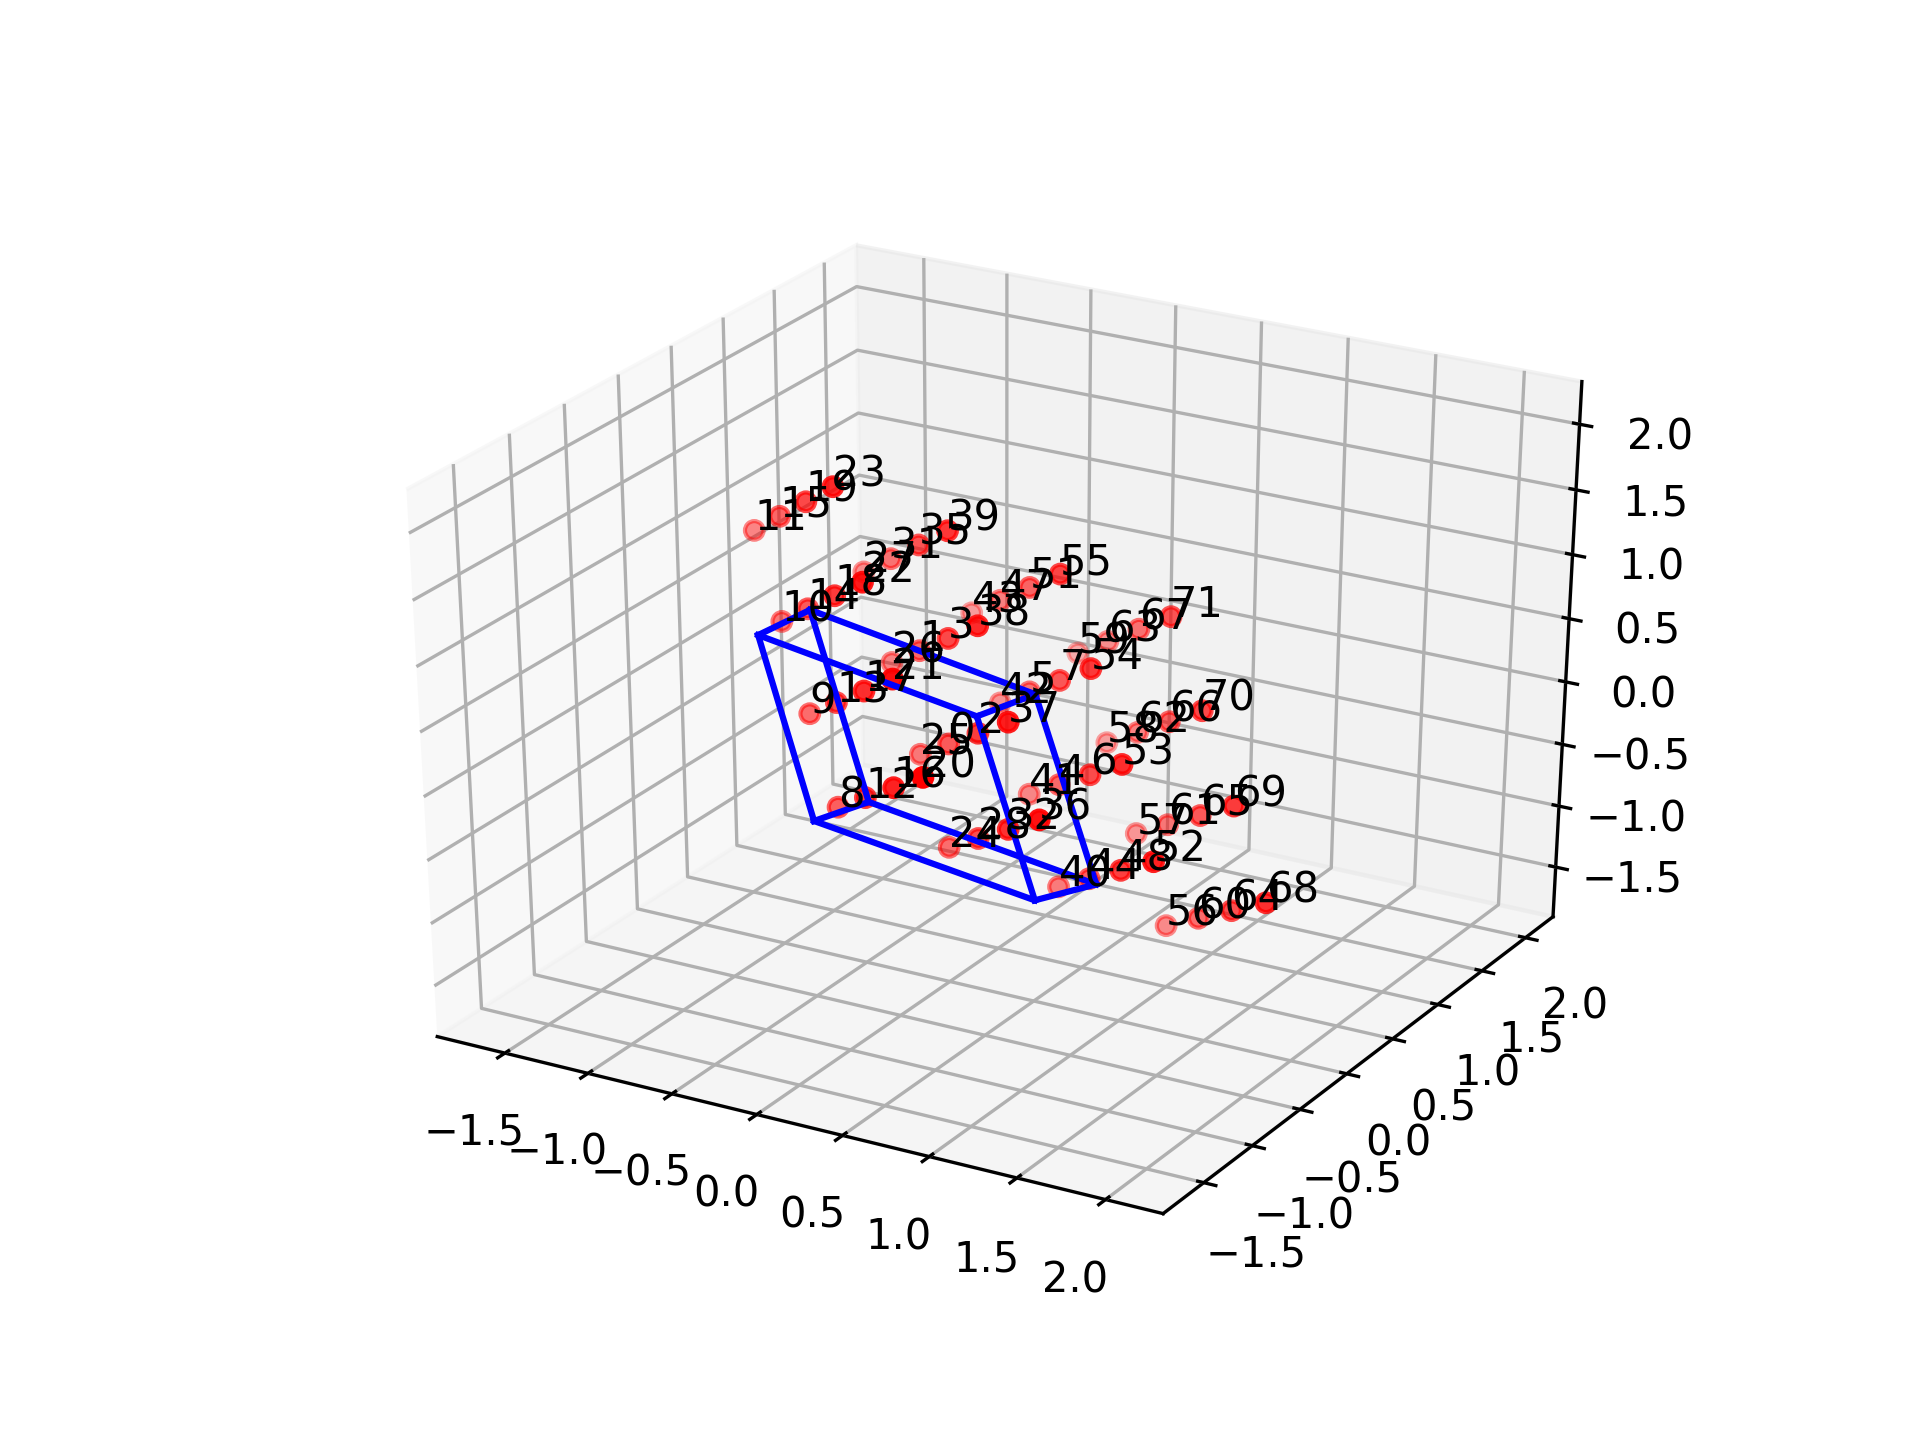

In [144]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
plot_mesh(extended_grid.flatten(), Al_PP.lattice.reciprocal_vectors, plot_offset, indices=extended_indices.flatten())

#### Testing index conversion

In [113]:
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)
lat_shift = [-1./2]*3
grid_shift = [0.]*3
degree = 1
free = FreeElectronModel(lattice, nvalence, degree)
ndivs = 1
ndiv0 = np.array([ndivs]*3)
ndiv1 = ndiv0 + 1
ndiv2 = ndiv0 + 2
ndiv3 = ndiv0 + 3
npts = np.prod(ndiv1)

extended_indices = np.zeros(np.array(ndiv3), dtype=int)

extended_indices = np.empty(np.array(ndiv3), dtype=int)
for k,j,i in product(range(ndiv3[0]), range(ndiv3[1]), range(ndiv3[2])):
    if ((i > 0 and i < ndiv2[0]) and (j > 0 and j < ndiv2[1]) and
        (k > 0 and k < ndiv2[2])):
        extended_indices[k,j,i] = (i-1) + (j-1)*ndiv1[1] + (k-1)*ndiv1[0]*ndiv1[1]
    else:
        extended_indices[k,j,i] = i + j*ndiv3[1] + k*ndiv3[0]*ndiv3[1] + npts    


In [117]:
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)
lat_shift = [-1./2]*3
grid_shift = [0.]*3
degree = 1
free = FreeElectronModel(lattice, degree)
ndivs = 3
ndiv0 = np.array([ndivs]*3)
ndiv1 = ndiv0 + 1
ndiv2 = ndiv0 + 2
ndiv3 = ndiv0 + 3
npts = np.prod(ndiv1)

extended_indices = np.zeros(np.array(ndiv3), dtype=int)

extended_indices = np.empty(np.array(ndiv3), dtype=int)
for k,j,i in product(range(ndiv3[0]), range(ndiv3[1]), range(ndiv3[2])):
    if ((i > 0 and i < ndiv2[0]) and (j > 0 and j < ndiv2[1]) and
        (k > 0 and k < ndiv2[2])):
        extended_indices[k,j,i] = (i-1) + (j-1)*ndiv1[1] + (k-1)*ndiv1[0]*ndiv1[1]
    else:
        extended_indices[k,j,i] = i + j*ndiv3[1] + k*ndiv3[0]*ndiv3[1] + npts    


for i, ind in enumerate(extended_indices.flatten()):
    if i != convert_tet_index(ind, ndiv0):
        print("i: ", i)
        print("initial index: ", ind)
        print("final index: ", convert_tet_index(ind, ndiv0))
        print("\n")

<IPython.core.display.Javascript object>


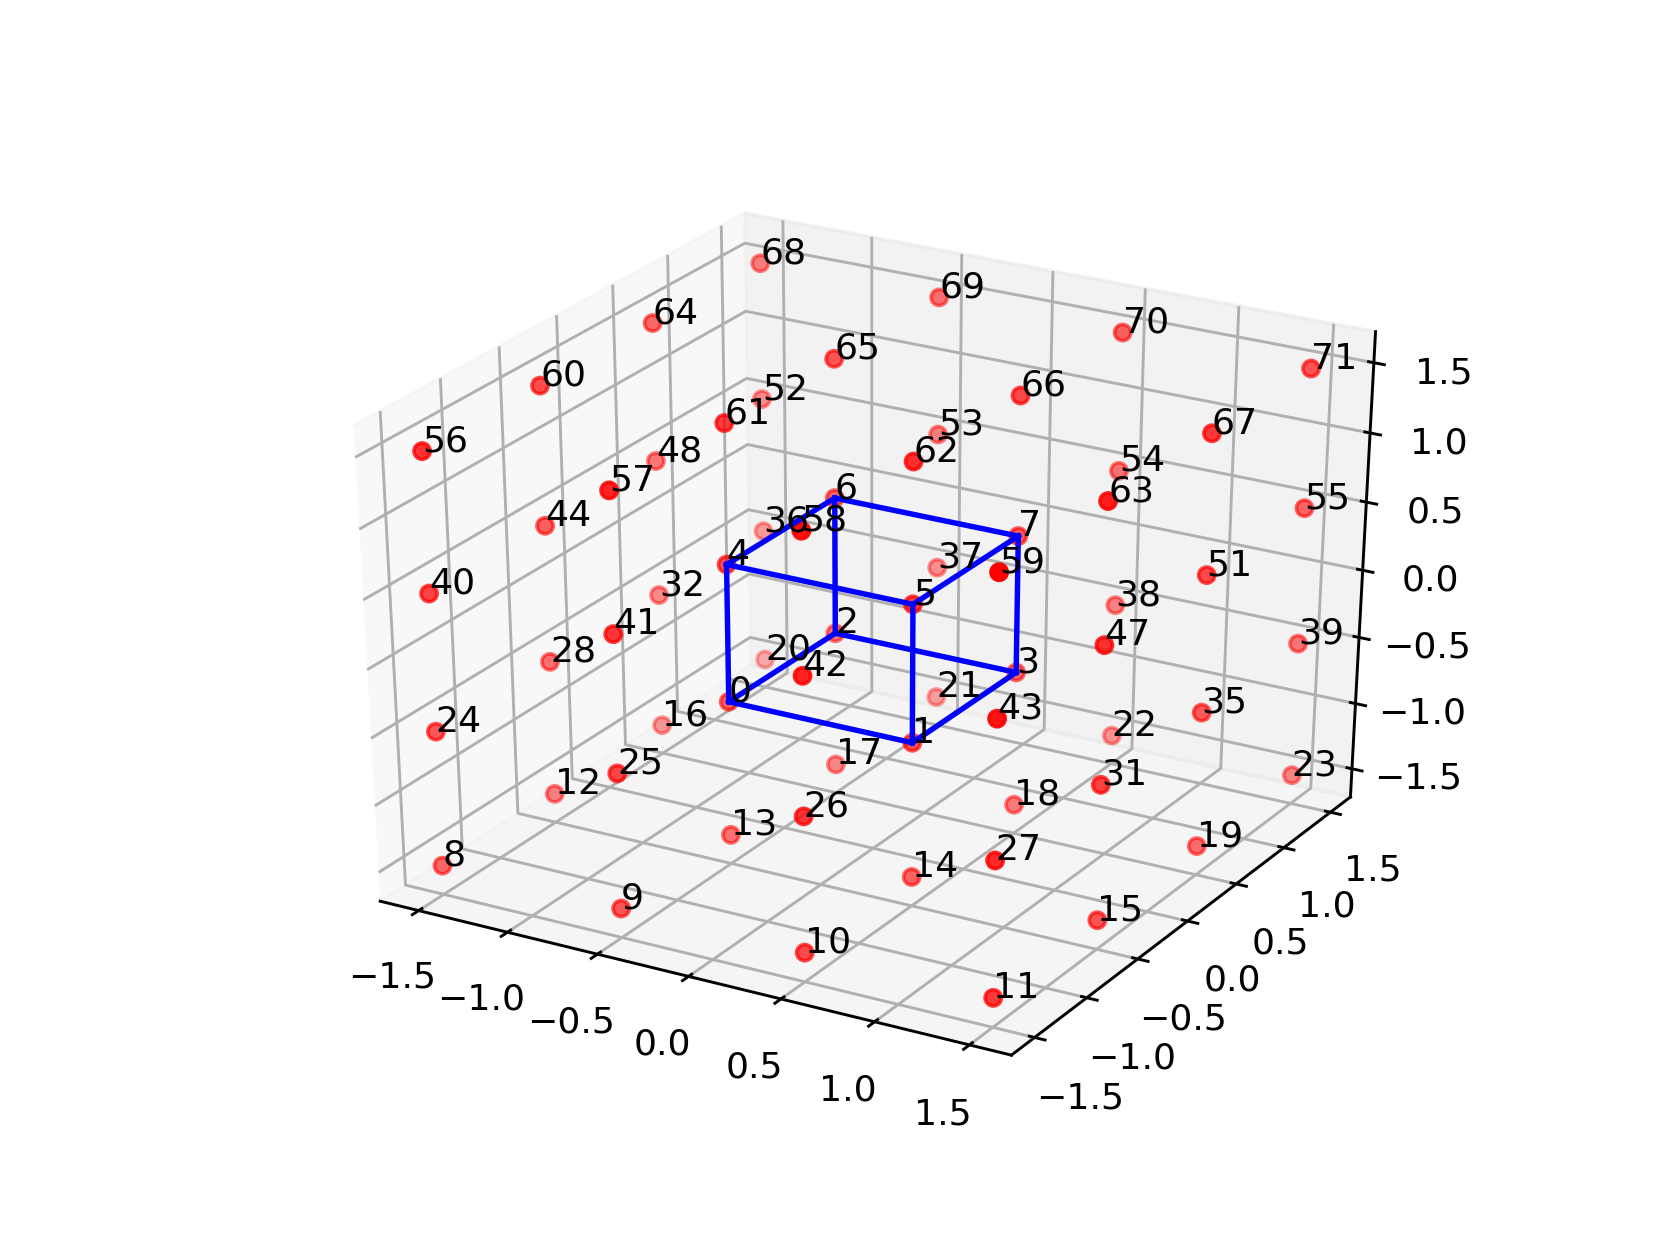

In [114]:
plot_offset = -np.sum(free.lattice.reciprocal_vectors,1)/2
plot_mesh(extended_grid.flatten(), free.lattice.reciprocal_vectors, 
          plot_offset, extended_indices.flatten())

#### Verify integrals converge to correct answer

In [120]:
degree_list = range(2,4)
nvalence = 1

for degree in degree_list:
    print("degree ", degree)

    # Verify the Fermi level of the free electron model.
    lat_angles =[np.pi/2]*3
    lat_consts = [1]*3
    lat_centering = "prim"
    lattice = Lattice(lat_centering, lat_consts, lat_angles)
    free = FreeElectronModel(lattice, degree)

    lat_offset = [-1./2]*3
    grid, tetrahedra = grid_and_tetrahedra(free, 25, lat_offset)
    weights = np.ones(len(tetrahedra))
    free.fermi_level = calc_fermi_level(free, tetrahedra, weights, grid)

    sphere_volume = 4./3*np.pi*free.fermi_level**(3./degree)
    occupied_volume = free.lattice.reciprocal_volume*free.nvalence_electrons/2
    print(np.isclose(sphere_volume, occupied_volume, 1e-1, 1e-1))
    print(np.isclose(free.fermi_level, free.fermi_level_ans, 1e-2,1e-2))

    total_energy = calc_total_energy(free, tetrahedra, weights, grid)
    rf_answer = free.fermi_level_ans**(1./degree)
    te_answer = 4*np.pi*(rf_answer**(3 + degree)/(3. + degree))
    print(np.isclose(total_energy, te_answer, 1e-1, 1e-1))

('degree ', 2)
True
True
True
('degree ', 3)
True
True
True


In [125]:
grid

array([[ 3.14159265,  3.14159265,  3.14159265],
       [ 9.42477796,  3.14159265,  3.14159265],
       [ 3.14159265,  9.42477796,  3.14159265],
       [ 9.42477796,  9.42477796,  3.14159265],
       [ 3.14159265,  3.14159265,  9.42477796],
       [ 9.42477796,  3.14159265,  9.42477796],
       [ 3.14159265,  9.42477796,  9.42477796],
       [ 9.42477796,  9.42477796,  9.42477796]])

In [133]:
np.reshape(grid, [2,2,2,3])

array([[[[ 3.14159265,  3.14159265,  3.14159265],
         [ 9.42477796,  3.14159265,  3.14159265]],

        [[ 3.14159265,  9.42477796,  3.14159265],
         [ 9.42477796,  9.42477796,  3.14159265]]],


       [[[ 3.14159265,  3.14159265,  9.42477796],
         [ 9.42477796,  3.14159265,  9.42477796]],

        [[ 3.14159265,  9.42477796,  9.42477796],
         [ 9.42477796,  9.42477796,  9.42477796]]]])

In [137]:
def submesh_tetrahedra(vertices, indices):
    """Create a function that determines the indices of the tetrahedra
    vertices from a list of vertices and indices.
    """

    tetrahedra = find_tetrahedra(vertices)
    return indices[tetrahedra-1]        

In [141]:
lat_angles =[np.pi/2]*3
lat_consts = [1]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)

degree = 1
free = FreeElectronModel(lattice, degree)

ndiv_list = range(2, 8)
for ndiv in ndiv_list:
    ndiv1 = [ndiv + 1]*3
    print("ndiv1: ", ndiv1)
    lat_shift = [1./2]*3
    grid_shift = [0,0,0]
    grid, tetrahedra = grid_and_tetrahedra(free, ndiv, lat_shift, grid_shift)

    test_tetrahedra = np.array([])
    npts = (ndiv + 1)**3
    indices = np.reshape(list(range(npts)), ndiv1)
    for i,j,k in itertools.product(range(ndiv), repeat=3):
        vertices = []
        vindices = []
        for l,m,n in itertools.product(range(2), repeat=3):
            vertices.append(np.reshape(grid, ndiv1 + [3])[i+l, j+m, k+n])
            vindices.append(indices[i+l, j+m, k+n])
        vindices = np.array(vindices)
        vertices = np.array(vertices)
        if len(test_tetrahedra) == 0:
            test_tetrahedra = submesh_tetrahedra(vertices, vindices)
        else:
            test_tetrahedra = np.append(test_tetrahedra,
                                    submesh_tetrahedra(vertices, vindices), 0)
    print(all([np.allclose(t1,t2) for t1,t2 in
                zip(tetrahedra, test_tetrahedra)]))

('ndiv1: ', [3, 3, 3])
True
('ndiv1: ', [4, 4, 4])
True
('ndiv1: ', [5, 5, 5])
True
('ndiv1: ', [6, 6, 6])
True
('ndiv1: ', [7, 7, 7])
True
('ndiv1: ', [8, 8, 8])
True


#### Verify the symmetry reduction is performed correctly.

In [143]:
ndiv0 = np.array([2,2,2])
offset = [0]*3
grid, tetrahedra = grid_and_tetrahedra(Al_PP, ndiv0, offset)
weights_unreduced = np.ones(len(tetrahedra))
fermi_level_unreduced = calc_fermi_level(Al_PP, tetrahedra,
                                         weights_unreduced, grid)    
irreducible_tetrahedra, weights_reduced = find_irreducible_tetrahedra(Al_PP,
                                                        tetrahedra, grid)
fermi_level_reduced = calc_fermi_level(Al_PP, irreducible_tetrahedra,
                                weights_reduced, grid)

print(fermi_level_unreduced, fermi_level_reduced)

(9.0312015739521811, 9.0312015739521811)


In [145]:
index_map ={0:26,
            1:25,
            2:26,
            3:25,
            4:22,
            5:25,
            6:26,
            7:25,
            8:26,
            9:25,
            10:22,
            11:25,
            12:22,
            13:13,
            14:22,
            15:25,
            16:22,
            17:25,
            18:26,
            19:25,
            20:26,
            21:25,
            22:22,
            23:25,
            24:26,
            25:25,
            26:26
            }

In [155]:
index_map ={0:0,
            1:1,
            2:0,
            3:1,
            4:4,
            5:1,
            6:0,
            7:1,
            8:0,
            9:1,
            10:4,
            11:1,
            12:4,
            13:13,
            14:4,
            15:1,
            16:4,
            17:1,
            18:0,
            19:1,
            20:0,
            21:1,
            22:4,
            23:1,
            24:0,
            25:1,
            26:0
            }

In [170]:
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)
lat_offset = [-1./2]*3
degree = 1
free = FreeElectronModel(lattice, degree)
grid, tetrahedra = grid_and_tetrahedra(free, 2, lat_offset)

cells = [[0,1,3,4,9,10,12,13],
         [1,2,4,5,10,11,13,14],
         [3,4,6,7,12,13,15,16],
         [4,5,7,8,13,14,16,17],
         [9,10,12,13,18,19,21,22],
         [10,11,13,14,19,20,22,23],
         [12,13,15,16,21,22,24,25],
         [13,14,16,17,22,23,25,26]]

tetrah = [find_tetrahedra(c)for c in cells]
tetrahedra = []
for i,t in enumerate(tetrah):
    for tet in t:
        real_tet = []
        for ind in tet:
            real_tet.append(cells[i][ind-1])
        tetrahedra.append(real_tet)

for i in range(len(tetrahedra)):
    for j in range(len(tetrahedra[i])):
        tetrahedra[i][j] = index_map[tetrahedra[i][j]]
    tetrahedra[i] = np.sort(tetrahedra[i]).tolist()

unitet = []
weights = []
for tet in tetrahedra:
    if any([np.allclose(tet, ut) for ut in unitet]):
        loc = np.where([np.allclose(tet,ut) for ut in
                            unitet])[0][0]                                    
        weights[loc] += 1.
        continue
    else:
        unitet.append(tet)
        weights.append(1.)

grid, tetrahedra = grid_and_tetrahedra(free, 2, lat_offset)
irr_tet, weights_irr = find_irreducible_tetrahedra(free, tetrahedra, grid)

print(weights)
print(weights_irr)

print(np.allclose(weights, weights_irr))

print(irr_tet)
print(unitet)
for it in irr_tet:
    it = np.sort(it)
    contained = False
    for ut in unitet:
        ut = np.sort(ut)
        if np.allclose(it,ut):
            contained = True
    print(contained == True)


[12.0, 12.0, 12.0, 12.0]
[12.0, 12.0, 12.0, 12.0]
True
[array([ 0,  1,  4, 13]), array([0, 1, 1, 4]), array([1, 1, 4, 4]), array([ 1,  4,  4, 13])]
[[0, 1, 1, 4], [1, 1, 4, 4], [1, 4, 4, 13], [0, 1, 4, 13]]
True
True
True
True


#### Test corrections

In [587]:
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)

degree = 1
free = FreeElectronModel(lattice, degree)

lat_offset0 = [0,0,0]
grid0, tetrahedra0 = grid_and_tetrahedra(free, ndivisions, lat_offset0)

# I probably only need to calculate the Fermi level once.
weights = np.ones(len(grid))
fermi_level = calc_fermi_level(free, tetrahedra, weights, grid)
free.fermi_level = fermi_level


energies = [0, 1, np.sqrt(2), np.sqrt(3)]
VT = free.lattice.reciprocal_volume/len(tetrahedra)
uncorrected_weights = integration_weights(VT, energies, fermi_level)

<IPython.core.display.Javascript object>


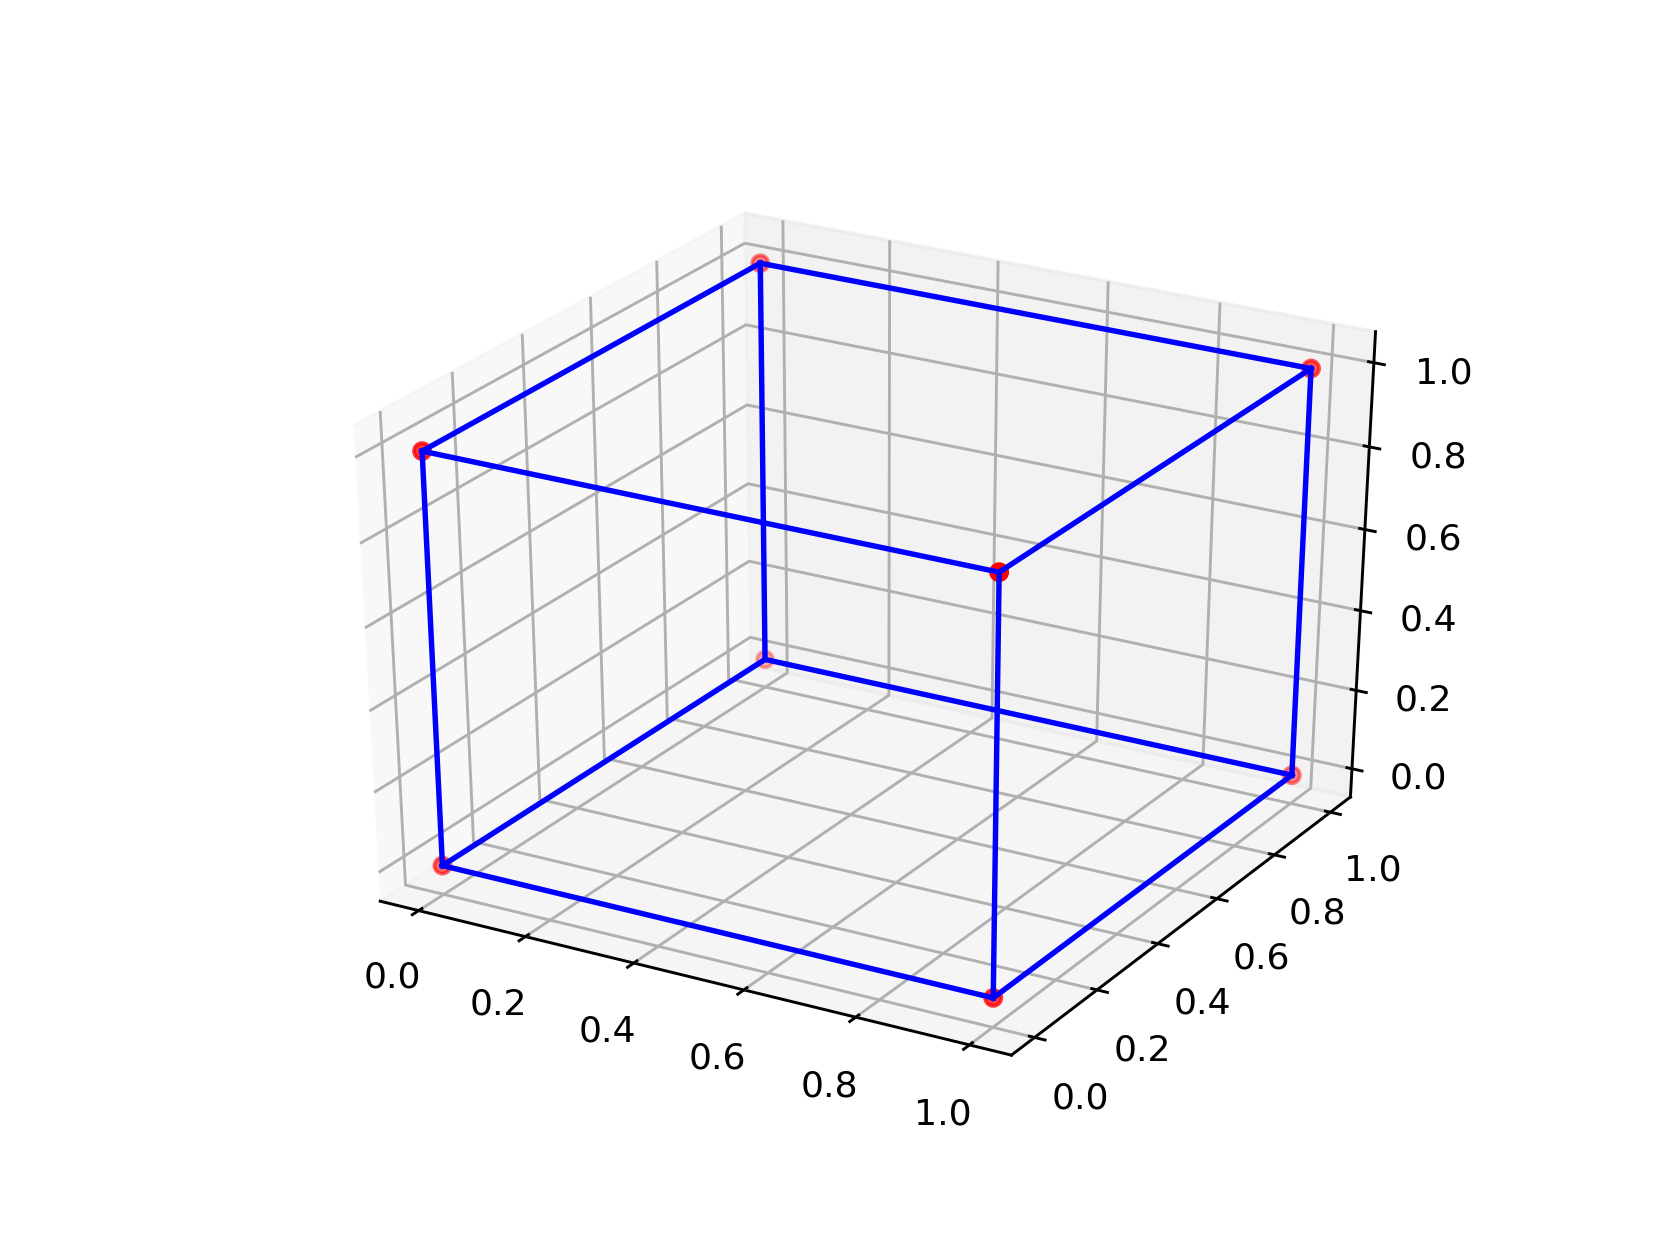

In [588]:
plot_offset = [0,0,0]
plot_mesh(grid0, free.lattice.reciprocal_vectors, plot_offset)

In [589]:
# The tetrahedron for which I'll be calculating the weight correction.
# Only calculate the first correction since it's a lot of work.
tetrahedra[0]

array([0, 1, 3, 7])

Cell 0

In [590]:
energies0 = [0,1,np.sqrt(2),np.sqrt(3)]
EST0 = np.sum(energies0)

DOS0 = density_of_states(free.lattice.reciprocal_volume, 
                  free.lattice.reciprocal_volume/6, 
                  energies0, 
                  fermi_level)

correction0 = 6*DOS0*EST0

In [591]:
print("EST0: ", EST0)
print("DOS0: ", DOS0)
print("CORR: ", correction0)

('EST0: ', 4.1462643699419726)
('DOS0: ', 0.1985324433873118)
('CORR: ', 4.9390079777659963)


Cell 1

In [592]:
lat_shift1 = [-1,0,0]
grid1, tetrahedra1 = grid_and_tetrahedra(free, ndivisions, lat_shift1)

In [593]:
energies1 = [0,1,1,np.sqrt(2)]
EST1 = np.sum(energies1)

DOS1 = density_of_states(free.lattice.reciprocal_volume, 
                  free.lattice.reciprocal_volume/6, 
                  energies1, 
                  fermi_level)

correction1 = 2*DOS1*EST1

In [594]:
print("EST1: ", EST1)
print("DOS1: ", DOS1)
print("CORR: ", correction1)

('EST1: ', 3.4142135623730949)
('DOS1: ', 0.02896665438117875)
('CORR: ', 0.19779668848958903)


Cell 2

<IPython.core.display.Javascript object>


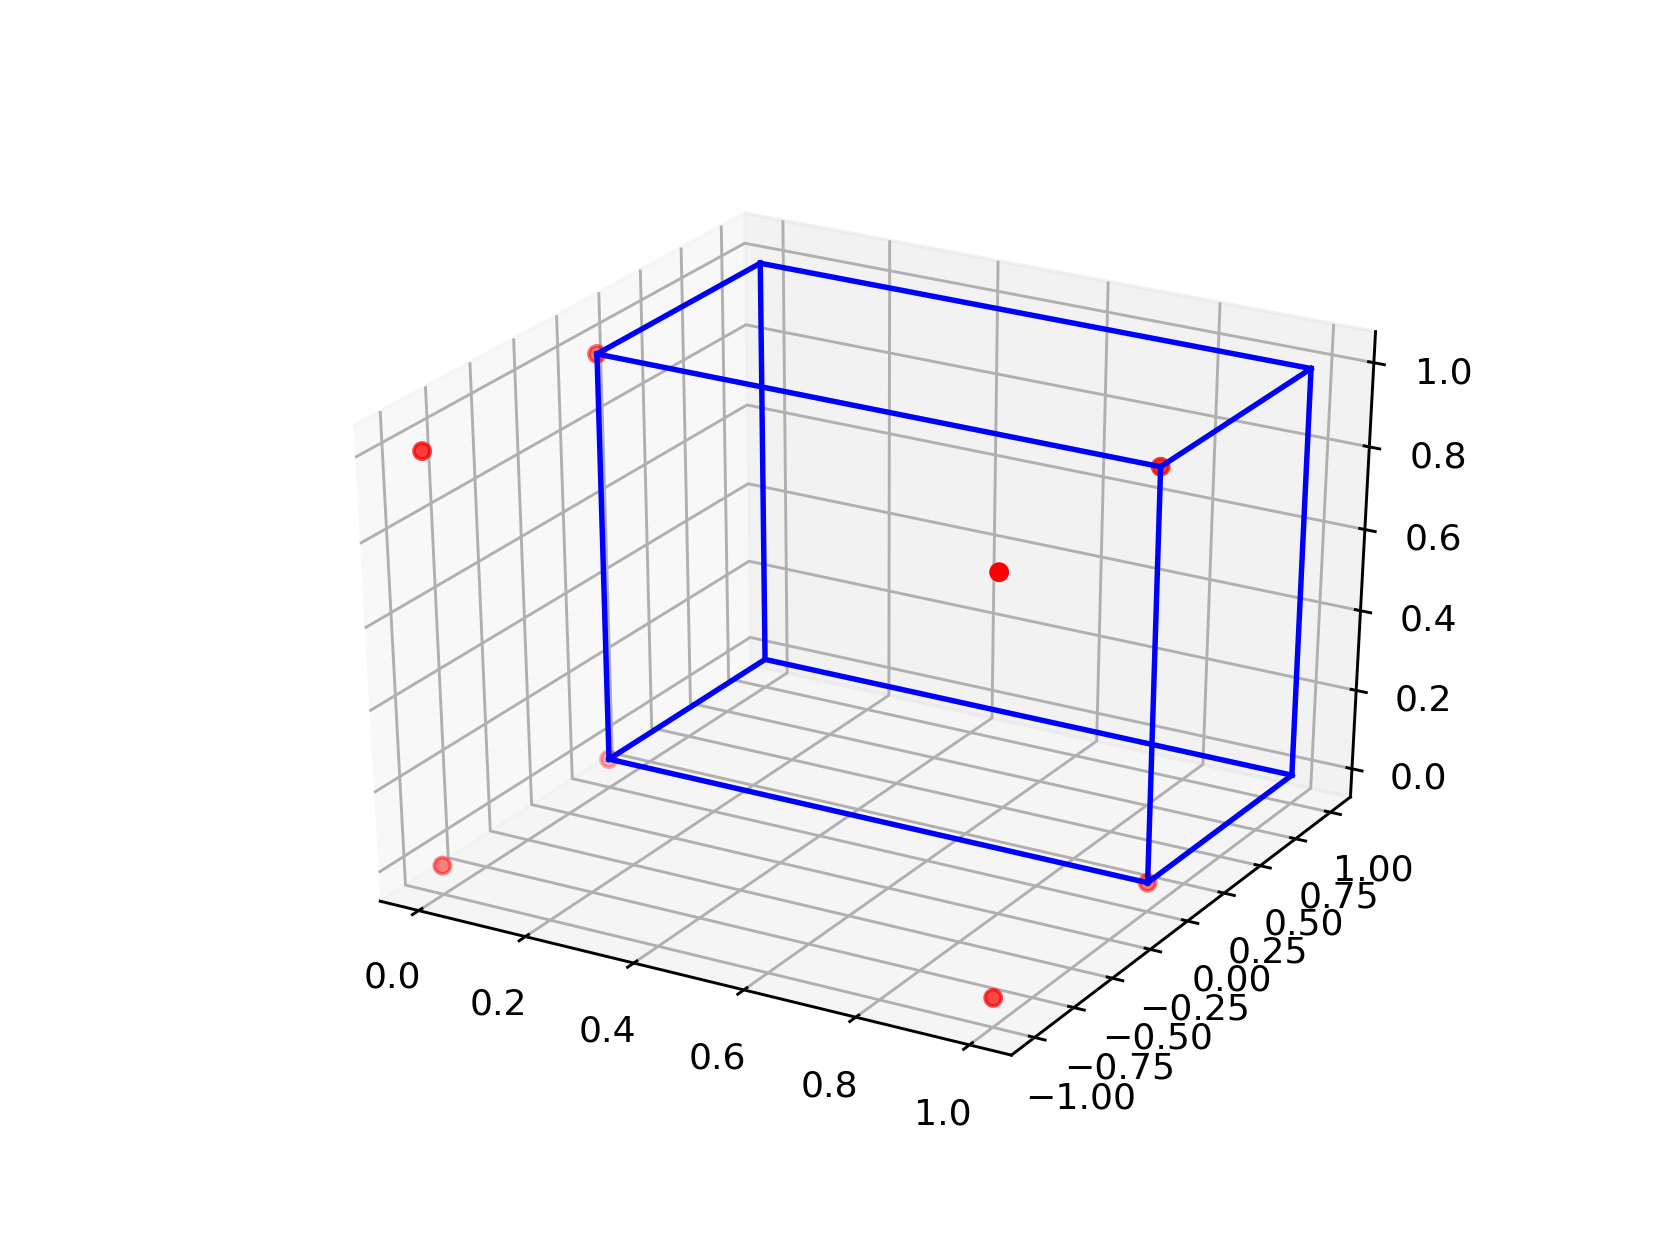

In [596]:
lat_shift2 = [0,-1,0]
grid2, tetrahedra2 = grid_and_tetrahedra(free, ndivisions, lat_shift2)

# plot_offset = -np.sum(free.lattice.reciprocal_vectors, 1)/2
plot_offset = [0,0,0]
plot_mesh(grid2, free.lattice.reciprocal_vectors, plot_offset)

In [597]:
for tet in tetrahedra2:
    energies = []
    for i in tet:
        energies.append(free.eval(grid2[i], 0)[0])
    print(np.sort(energies))

[ 1.          1.          1.41421356  1.41421356]
[ 0.          1.          1.          1.41421356]
[ 0.          1.          1.          1.41421356]
[ 1.          1.          1.41421356  1.41421356]
[ 1.          1.41421356  1.41421356  1.73205081]
[ 1.          1.41421356  1.41421356  1.73205081]


In [599]:
energies2 = [0,1,1,np.sqrt(2)]
EST2 = np.sum(energies2)

DOS2 = density_of_states(free.lattice.reciprocal_volume, 
                  free.lattice.reciprocal_volume/6, 
                  energies2, 
                  fermi_level)

correction2 = 2*DOS2*EST2

In [600]:
print("EST2: ", EST2)
print("DOS2: ", DOS2)
print("CORR: ", correction2)

('EST2: ', 3.4142135623730949)
('DOS2: ', 0.02896665438117875)
('CORR: ', 0.19779668848958903)


Cell 3

<IPython.core.display.Javascript object>


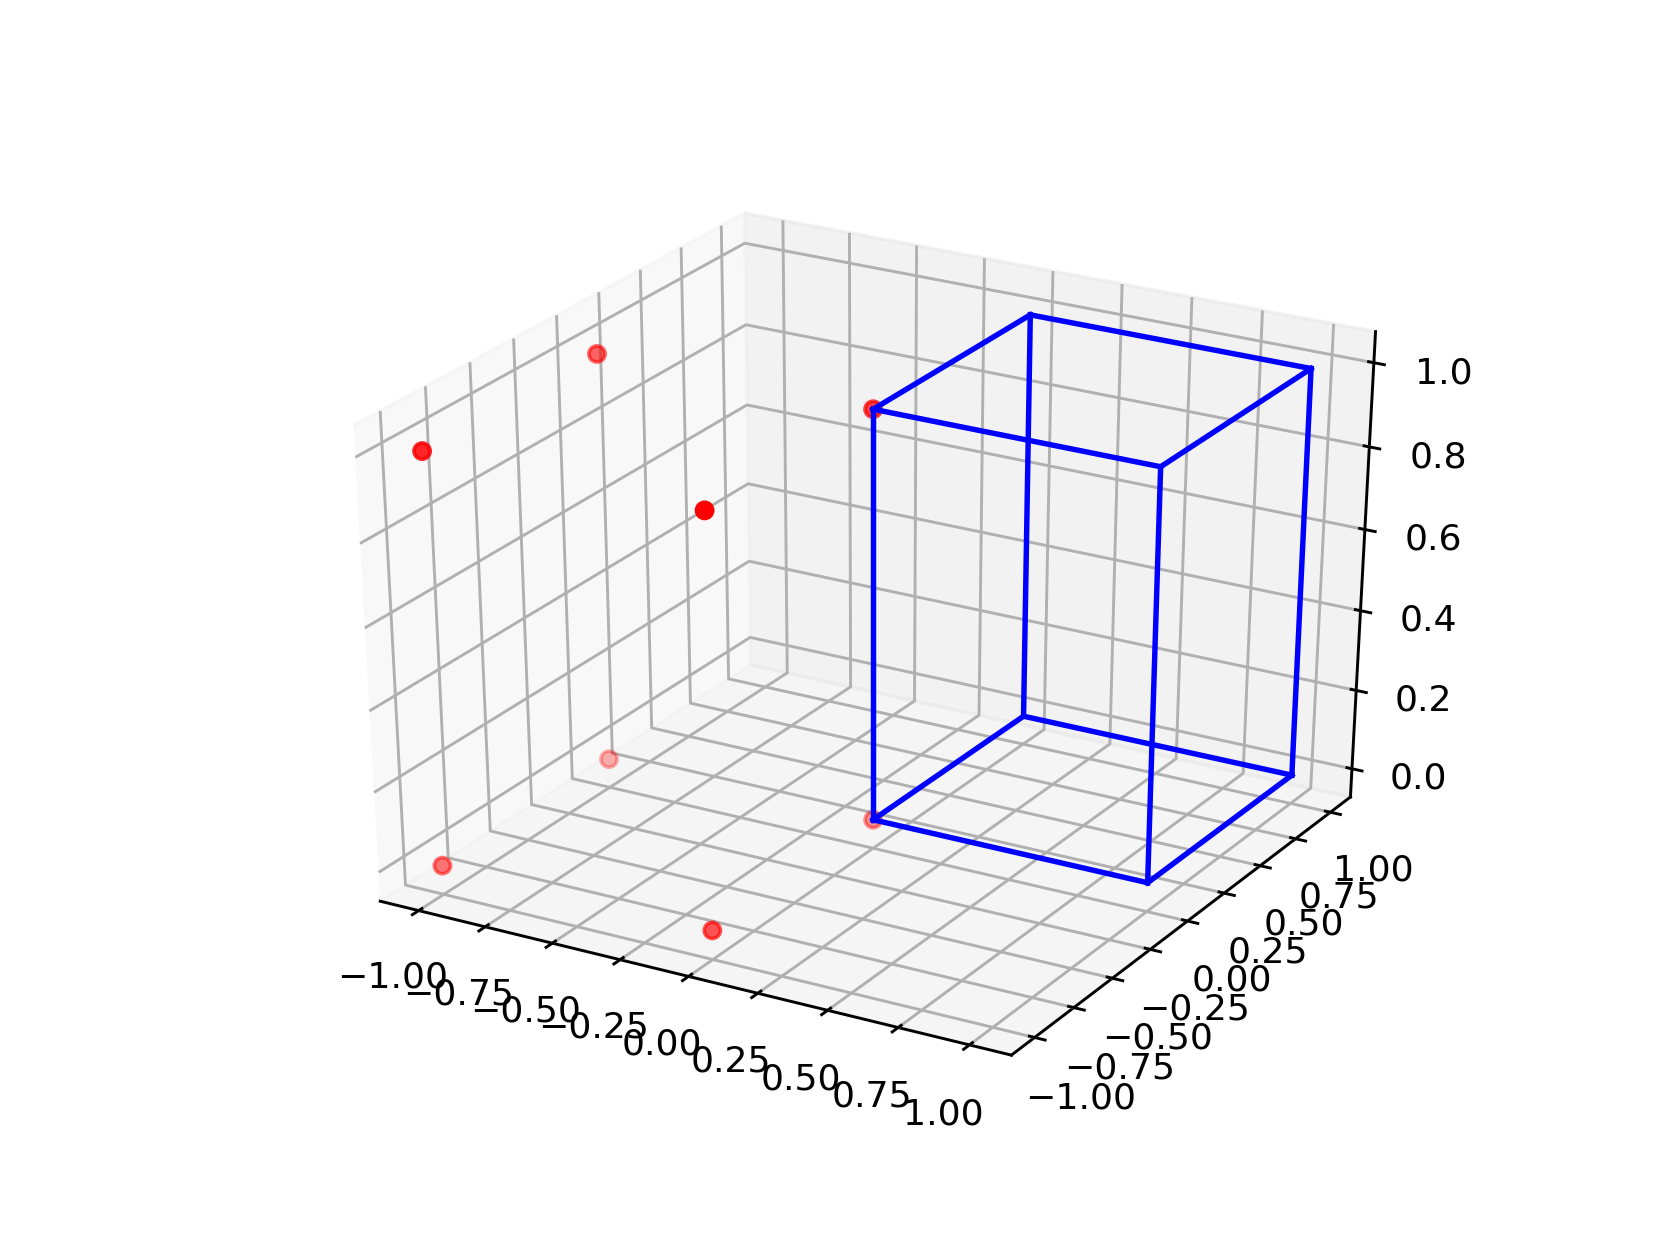

In [601]:
lat_shift3 = [-1,-1,0]
grid3, tetrahedra3 = grid_and_tetrahedra(free, ndivisions, lat_shift3)
# plot_offset = -np.sum(free.lattice.reciprocal_vectors, 1)/2
plot_offset = [0,0,0]
plot_mesh(grid3, free.lattice.reciprocal_vectors, plot_offset)

In [602]:
energies3 = [0,1,1,np.sqrt(2)]
EST3 = np.sum(energies3)

DOS3 = density_of_states(free.lattice.reciprocal_volume,
                  free.lattice.reciprocal_volume/6,
                  energies3,
                  fermi_level)

correction3 = 2*DOS3*EST3

In [603]:
print("EST3: ", EST3)
print("DOS3: ", DOS3)
print("CORR: ", correction3)

('EST3: ', 3.4142135623730949)
('DOS3: ', 0.02896665438117875)
('CORR: ', 0.19779668848958903)


Cell 4

<IPython.core.display.Javascript object>


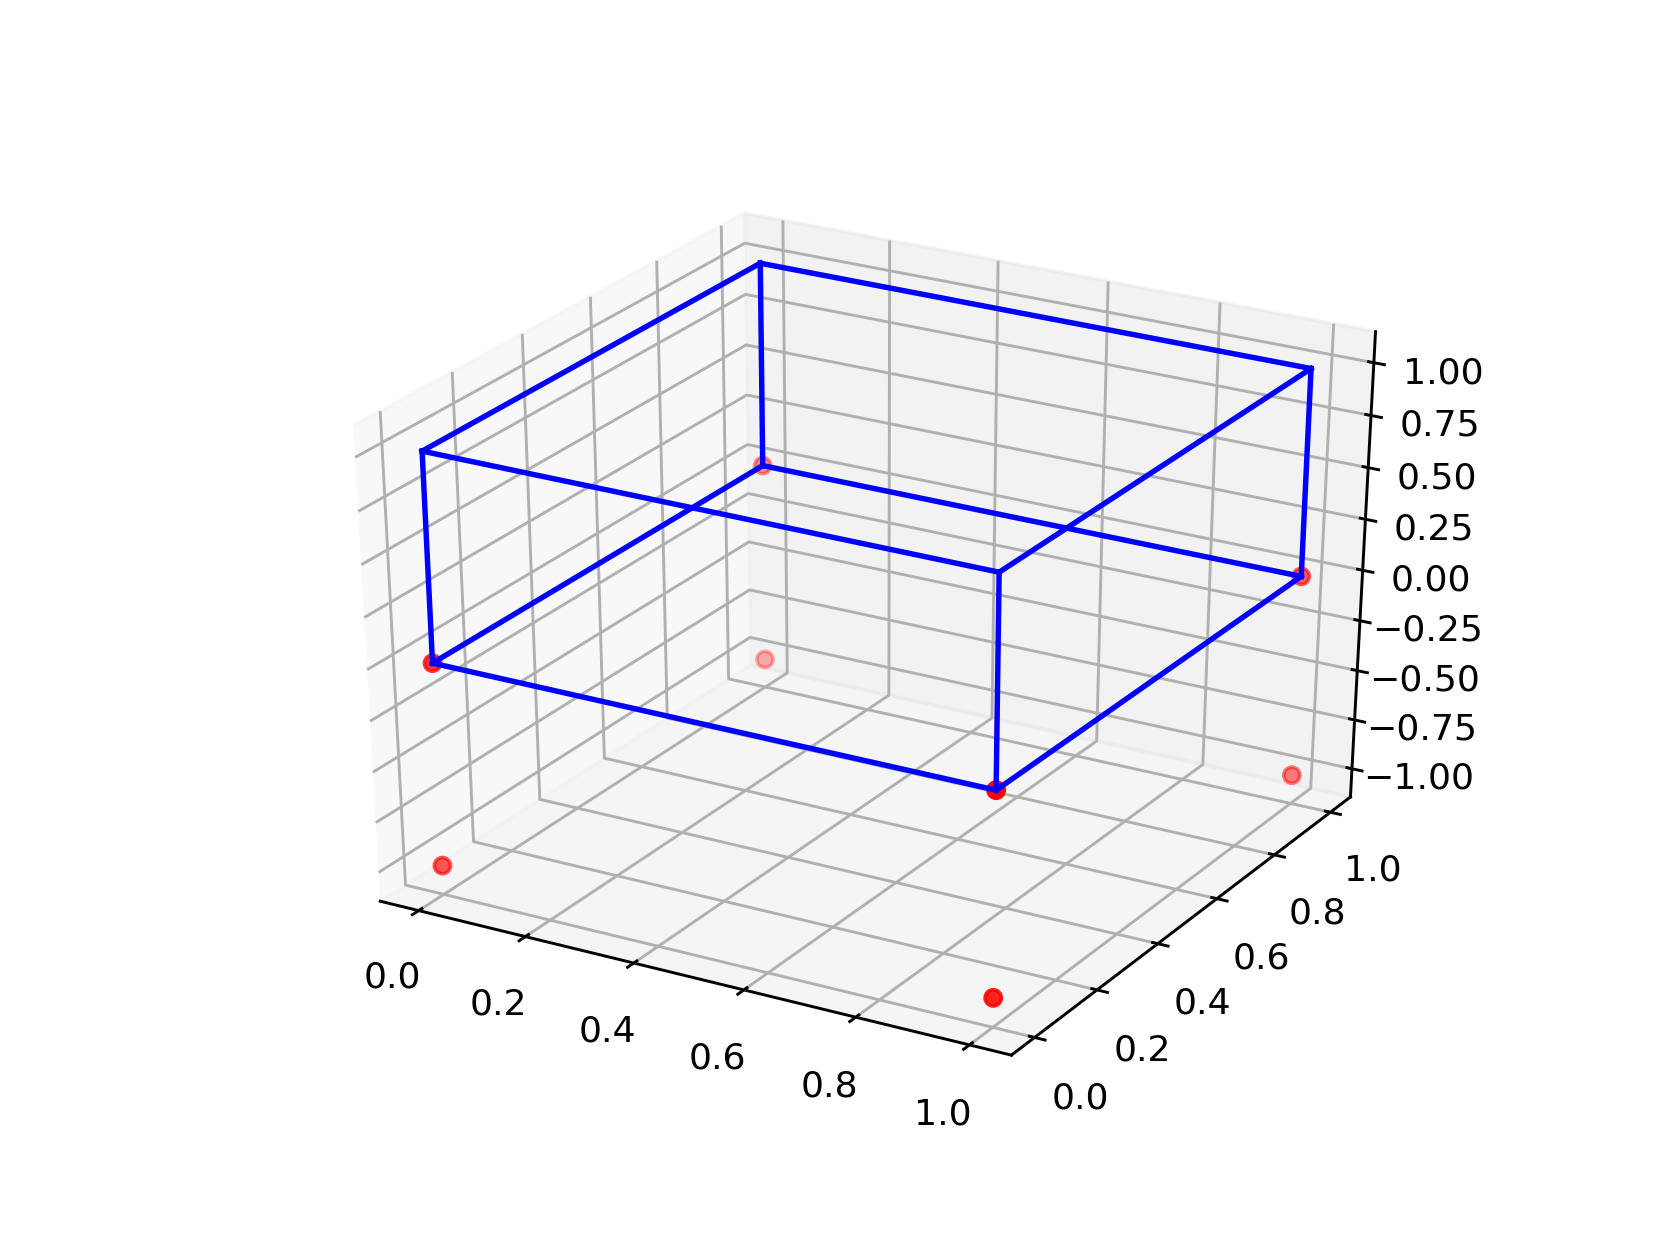

In [604]:
lat_shift4 = [0,0,-1]
grid4, tetrahedra4 = grid_and_tetrahedra(free, ndivisions, lat_shift4)
# plot_offset = -np.sum(free.lattice.reciprocal_vectors, 1)/2
plot_offset = [0,0,0]
plot_mesh(grid4, free.lattice.reciprocal_vectors, plot_offset)

In [605]:
energies4 = [0,1,1,np.sqrt(2)]
EST4 = np.sum(energies4)

DOS4 = density_of_states(free.lattice.reciprocal_volume,
                  free.lattice.reciprocal_volume/6,
                  energies4,
                  fermi_level)

correction4 = 2*DOS4*EST4

In [606]:
print("EST4: ", EST4)
print("DOS4: ", DOS4)
print("CORR: ", correction4)

('EST4: ', 3.4142135623730949)
('DOS4: ', 0.02896665438117875)
('CORR: ', 0.19779668848958903)


Cell 5

<IPython.core.display.Javascript object>


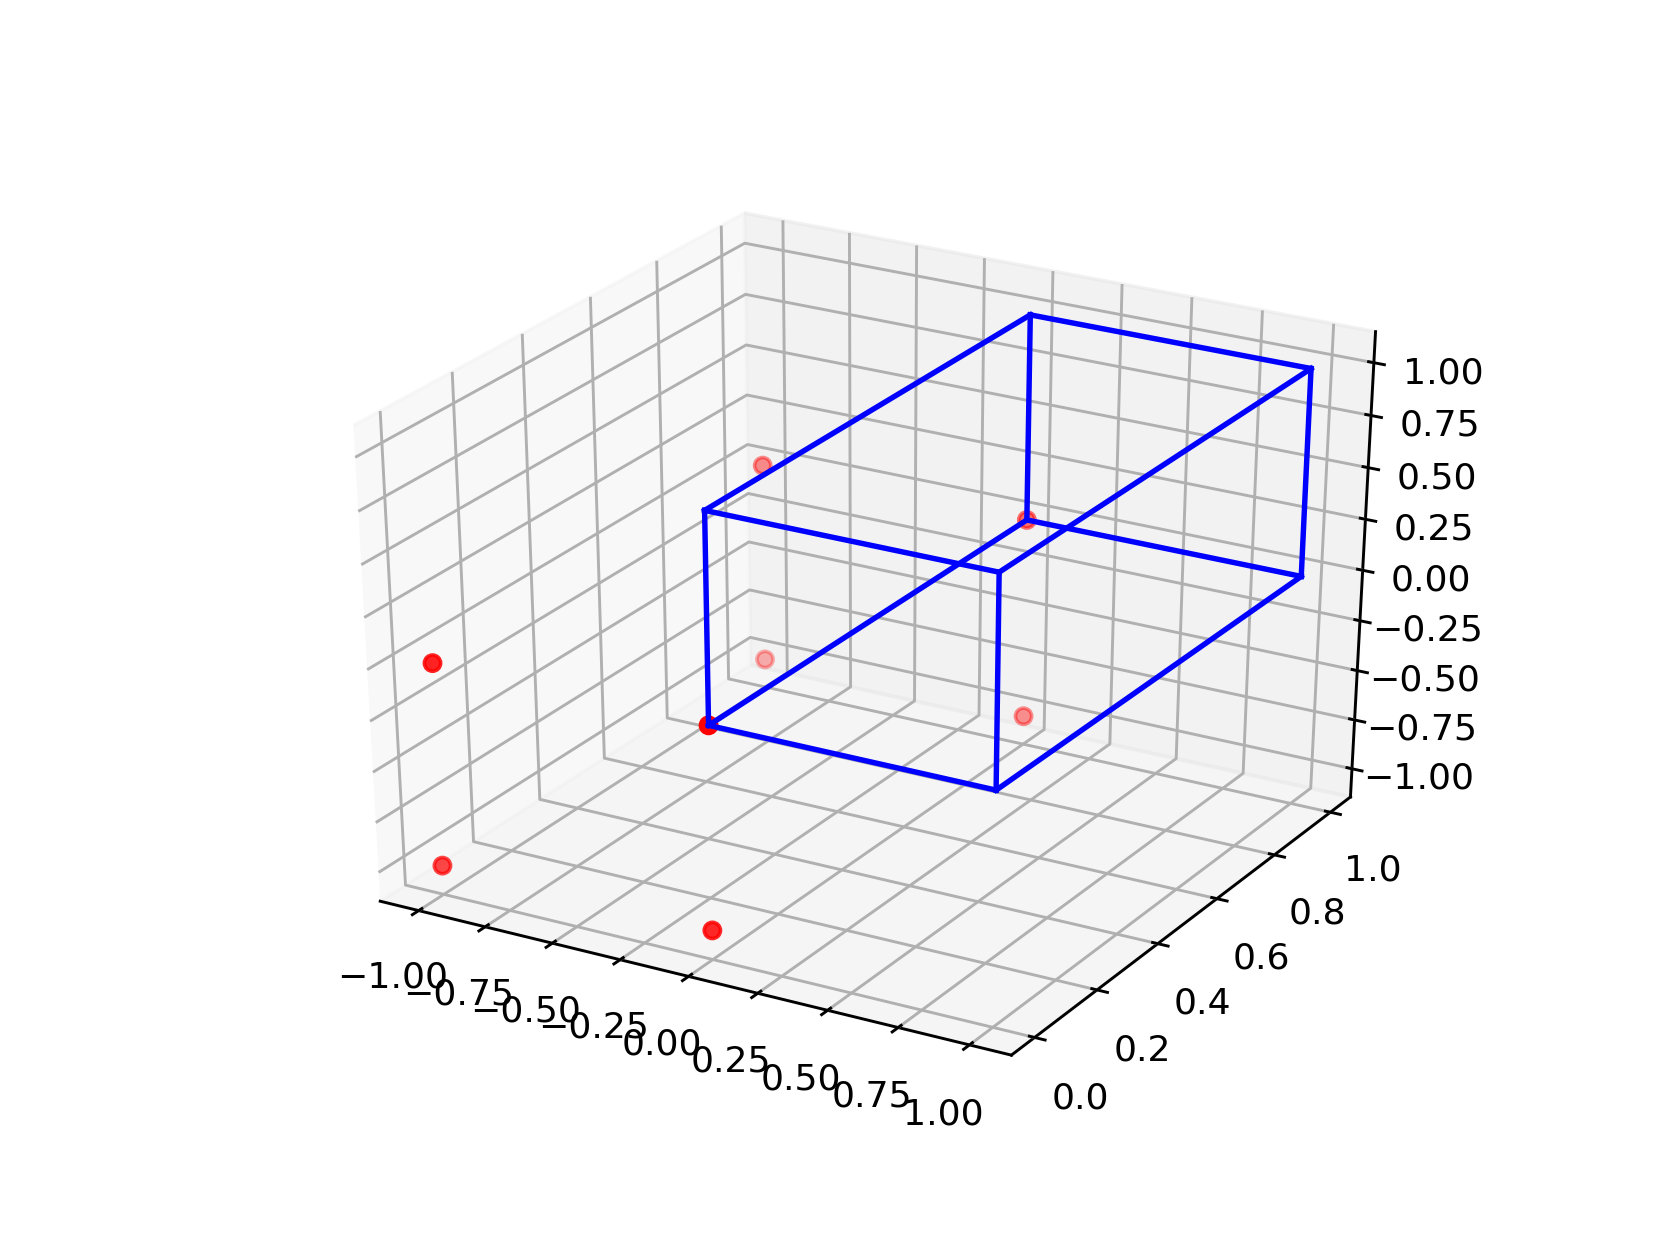

In [607]:
lat_shift5 = [-1,0,-1]
grid5, tetrahedra5 = grid_and_tetrahedra(free, ndivisions, lat_shift5)
# plot_offset = -np.sum(free.lattice.reciprocal_vectors, 1)/2
plot_offset = [0,0,0]
plot_mesh(grid5, free.lattice.reciprocal_vectors, plot_offset)

In [610]:
energies5 = [0,1,1,np.sqrt(2)]
EST5 = np.sum(energies5)

DOS5 = density_of_states(free.lattice.reciprocal_volume,
                  free.lattice.reciprocal_volume/6,
                  energies5,
                  fermi_level)

correction5 = 2*DOS5*EST5

In [611]:
print("EST5: ", EST5)
print("DOS5: ", DOS5)
print("CORR: ", correction5)

('EST5: ', 3.4142135623730949)
('DOS5: ', 0.02896665438117875)
('CORR: ', 0.19779668848958903)


Cell 6

<IPython.core.display.Javascript object>


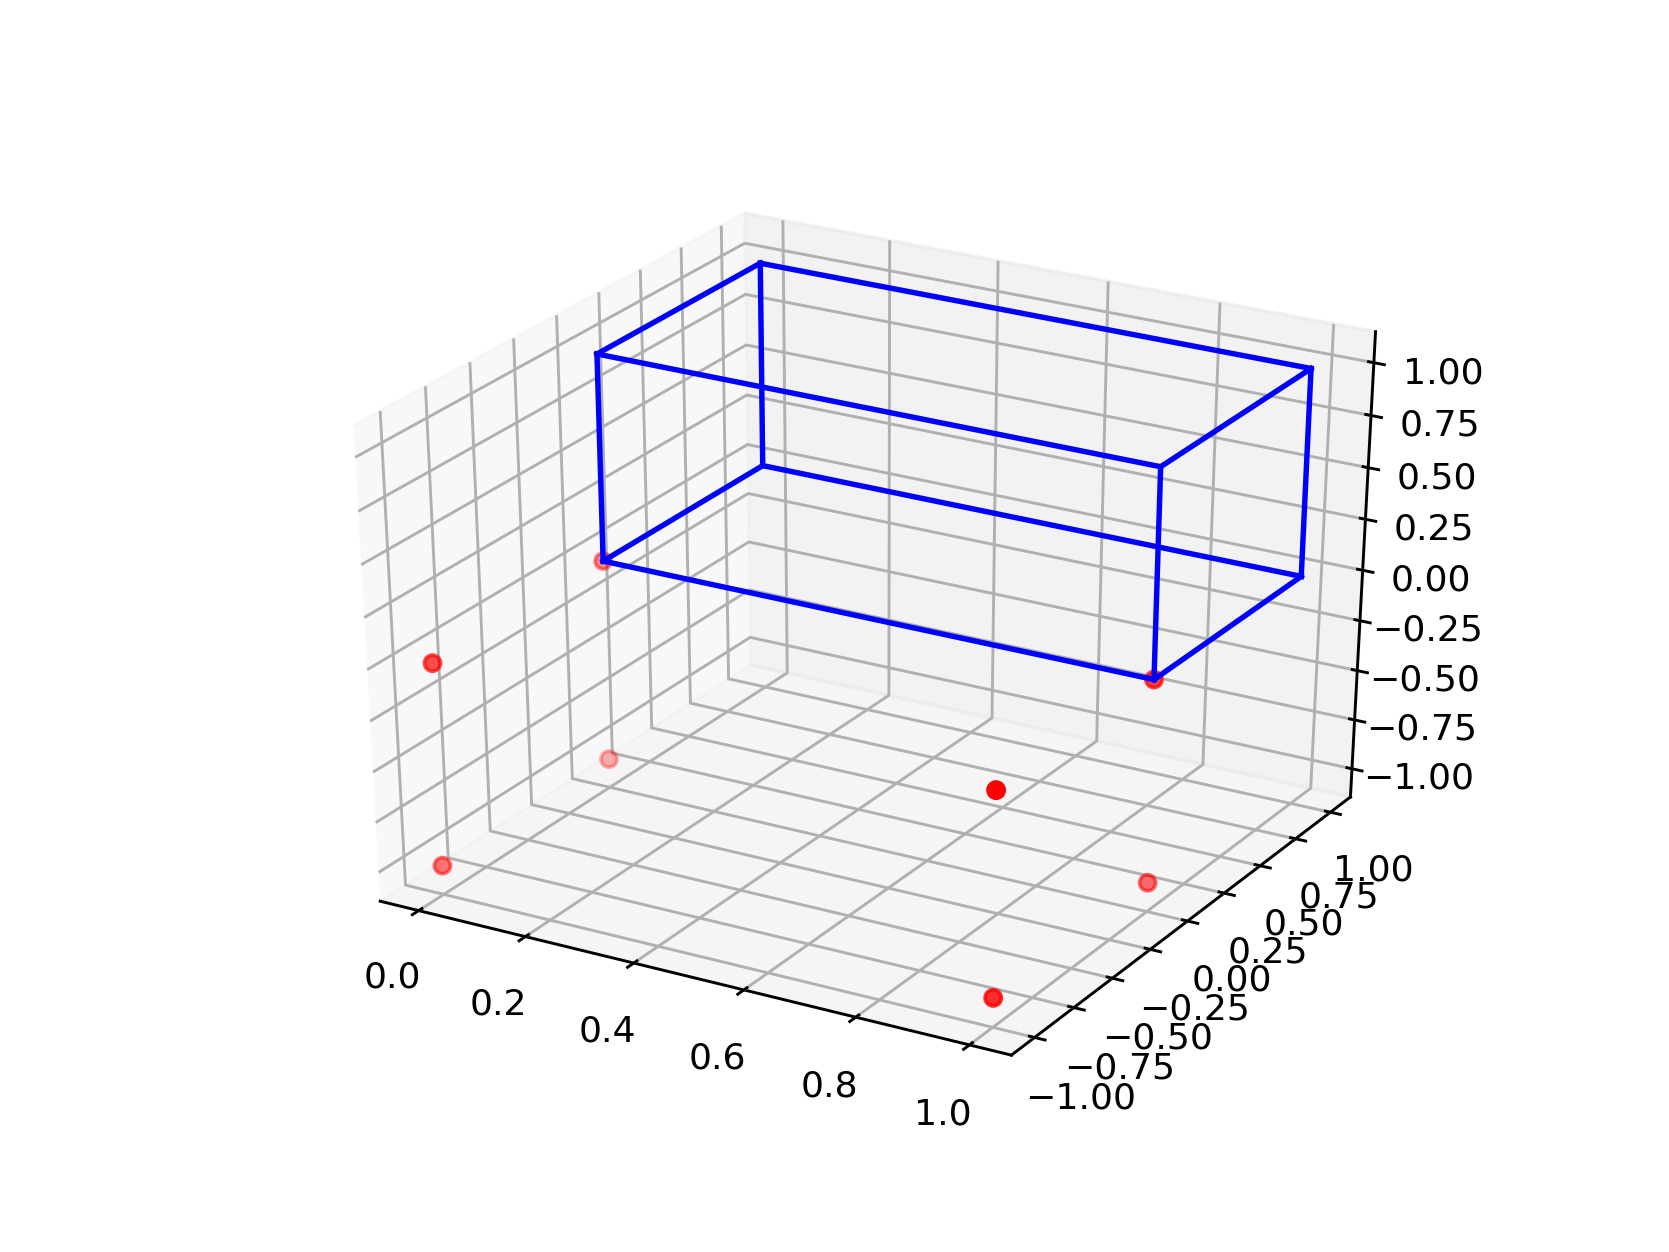

In [612]:
lat_shift6 = [0,-1,-1]
grid6, tetrahedra6 = grid_and_tetrahedra(free, ndivisions, lat_shift6)
# plot_offset = -np.sum(free.lattice.reciprocal_vectors, 1)/2
plot_offset = [0,0,0]
plot_mesh(grid6, free.lattice.reciprocal_vectors, plot_offset)

In [613]:
energies6 = [0,1,1,np.sqrt(2)]
EST6 = np.sum(energies6)

DOS6 = density_of_states(free.lattice.reciprocal_volume,
                  free.lattice.reciprocal_volume/6,
                  energies6,
                  fermi_level)

correction6 = 2*DOS6*EST6

In [614]:
print("EST6: ", EST6)
print("DOS6: ", DOS6)
print("CORR: ", correction6)

('EST6: ', 3.4142135623730949)
('DOS6: ', 0.02896665438117875)
('CORR: ', 0.19779668848958903)


Cell 7

<IPython.core.display.Javascript object>


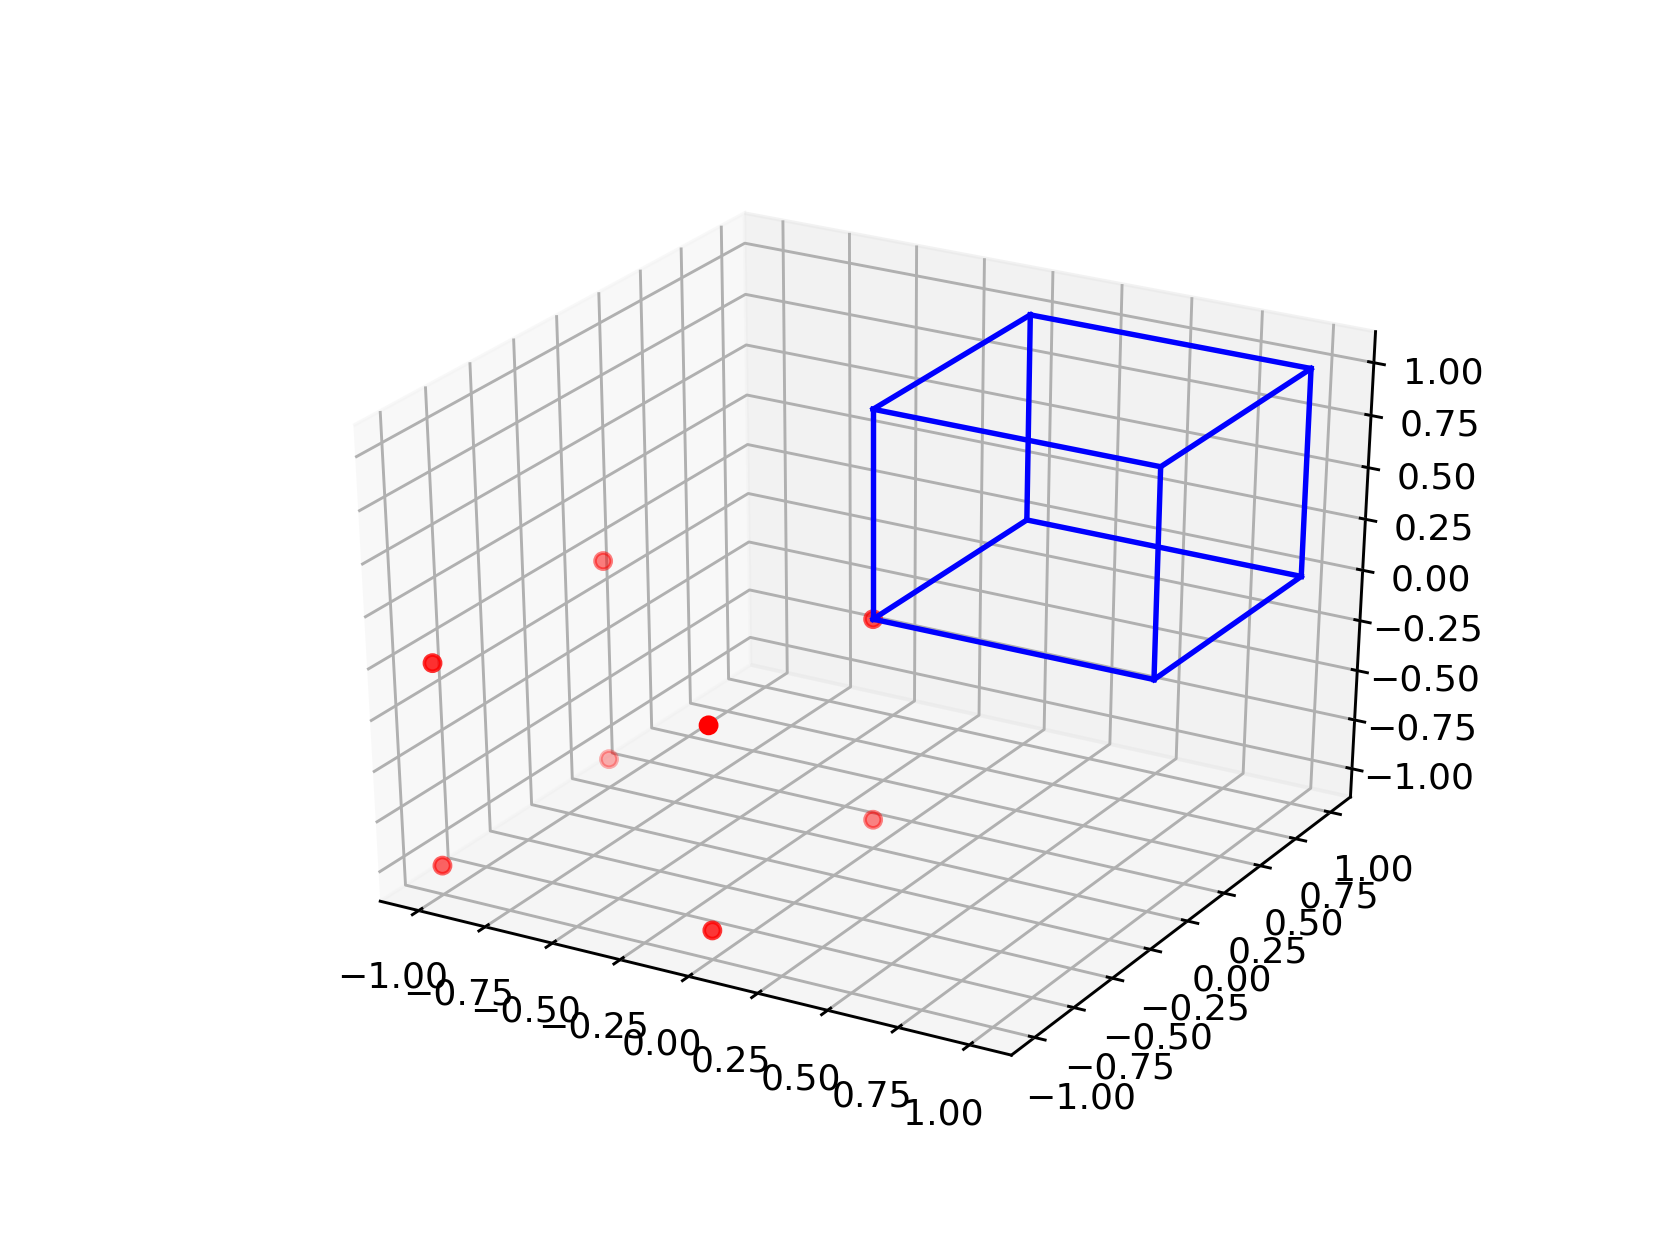

In [615]:
lat_shift6 = [-1,-1,-1]
grid6, tetrahedra6 = grid_and_tetrahedra(free, ndivisions, lat_shift6)
# plot_offset = -np.sum(free.lattice.reciprocal_vectors, 1)/2
plot_offset = [0,0,0]
plot_mesh(grid6, free.lattice.reciprocal_vectors, plot_offset)

In [616]:
energies7 = [0,1,np.sqrt(2), np.sqrt(3)]
EST7 = np.sum(energies7)

DOS7 = density_of_states(free.lattice.reciprocal_volume,
                  free.lattice.reciprocal_volume/6,
                  energies7,
                  fermi_level)

correction7 = 6*DOS7*EST7

In [617]:
print("EST7: ", EST7)
print("DOS7: ", DOS7)
print("CORR: ", correction7)

('EST7: ', 4.1462643699419726)
('DOS7: ', 0.1985324433873118)
('CORR: ', 4.9390079777659963)


In [618]:
correction = (correction0 + 
              correction1 + 
              correction2 + 
              correction3 + 
              correction4 + 
              correction5 + 
              correction6 + 
              correction7)/40

In [619]:
correction

0.27661990216173821

In [620]:
ex_grid, ex_tetrahedra = get_extended_tetrahedra(free, ndivisions)

c_energies, corrected_weights = corrected_integration_weights(free, ex_grid, ex_tetrahedra, [0,1,3,7],
                                  0, [1,1,1])

('ki: ', 0)
('energy: ', 0.0)
('adj en: ', array([ 0.        ,  1.        ,  1.41421356,  1.73205081]))
('dos: ', 0.1985324433873118)
('adj en: ', array([ 0.        ,  1.        ,  1.41421356,  1.73205081]))
('dos: ', 0.1985324433873118)
('adj en: ', array([ 0.        ,  1.        ,  1.41421356,  1.73205081]))
('dos: ', 0.1985324433873118)
('adj en: ', array([ 0.        ,  1.        ,  1.41421356,  1.73205081]))
('dos: ', 0.1985324433873118)
('adj en: ', array([ 0.        ,  1.        ,  1.41421356,  1.73205081]))
('dos: ', 0.1985324433873118)
('adj en: ', array([ 0.        ,  1.        ,  1.41421356,  1.73205081]))
('dos: ', 0.1985324433873118)
('adj en: ', array([ 0.        ,  1.        ,  1.        ,  1.41421356]))
('dos: ', 0.02896665438117875)
('adj en: ', array([ 0.        ,  1.        ,  1.        ,  1.41421356]))
('dos: ', 0.02896665438117875)
('adj en: ', array([ 0.        ,  1.        ,  1.        ,  1.41421356]))
('dos: ', 0.02896665438117875)
('adj en: ', array([ 0.        

In [621]:
uncorrected_weights

[0.038280363899593182,
 0.031853059380817478,
 0.025281557364565284,
 0.02345158527501719]

In [622]:
corrected_weights

[0.31490026606133131,
 0.099618858845974337,
 -0.015068806710985108,
 -0.05939418261940238]

In [623]:
correction

0.27661990216173821

In [624]:
print(corrected_weights[0], uncorrected_weights[0] + correction)

(0.31490026606133131, 0.31490026606133137)


In [567]:
# Find extended indices and plot the extended grid with them. Let's walk through
# the function.
ndiv0 = np.array([1]*3)
ndiv1 = ndiv0 + 1
npts = np.prod(ndiv1)
ndiv2 = ndiv0 + 2
ndiv3 = ndiv0 + 3
extended_indices = np.empty(np.array(ndiv3), dtype=int)
for k,j,i in product(range(ndiv3[0]), range(ndiv3[1]), range(ndiv3[2])):
    if ((i > 0 and i < ndiv2[0]) and (j > 0 and j < ndiv2[1]) and
        (k > 0 and k < ndiv2[2])):
        extended_indices[k,j,i] = (i-1) + (j-1)*ndiv1[1] + (k-1)*ndiv1[0]*ndiv1[1]
    else:
        extended_indices[k,j,i] = i + j*ndiv3[1] + k*ndiv3[0]*ndiv3[1] + npts    
extended_indices = extended_indices.flatten()

<IPython.core.display.Javascript object>


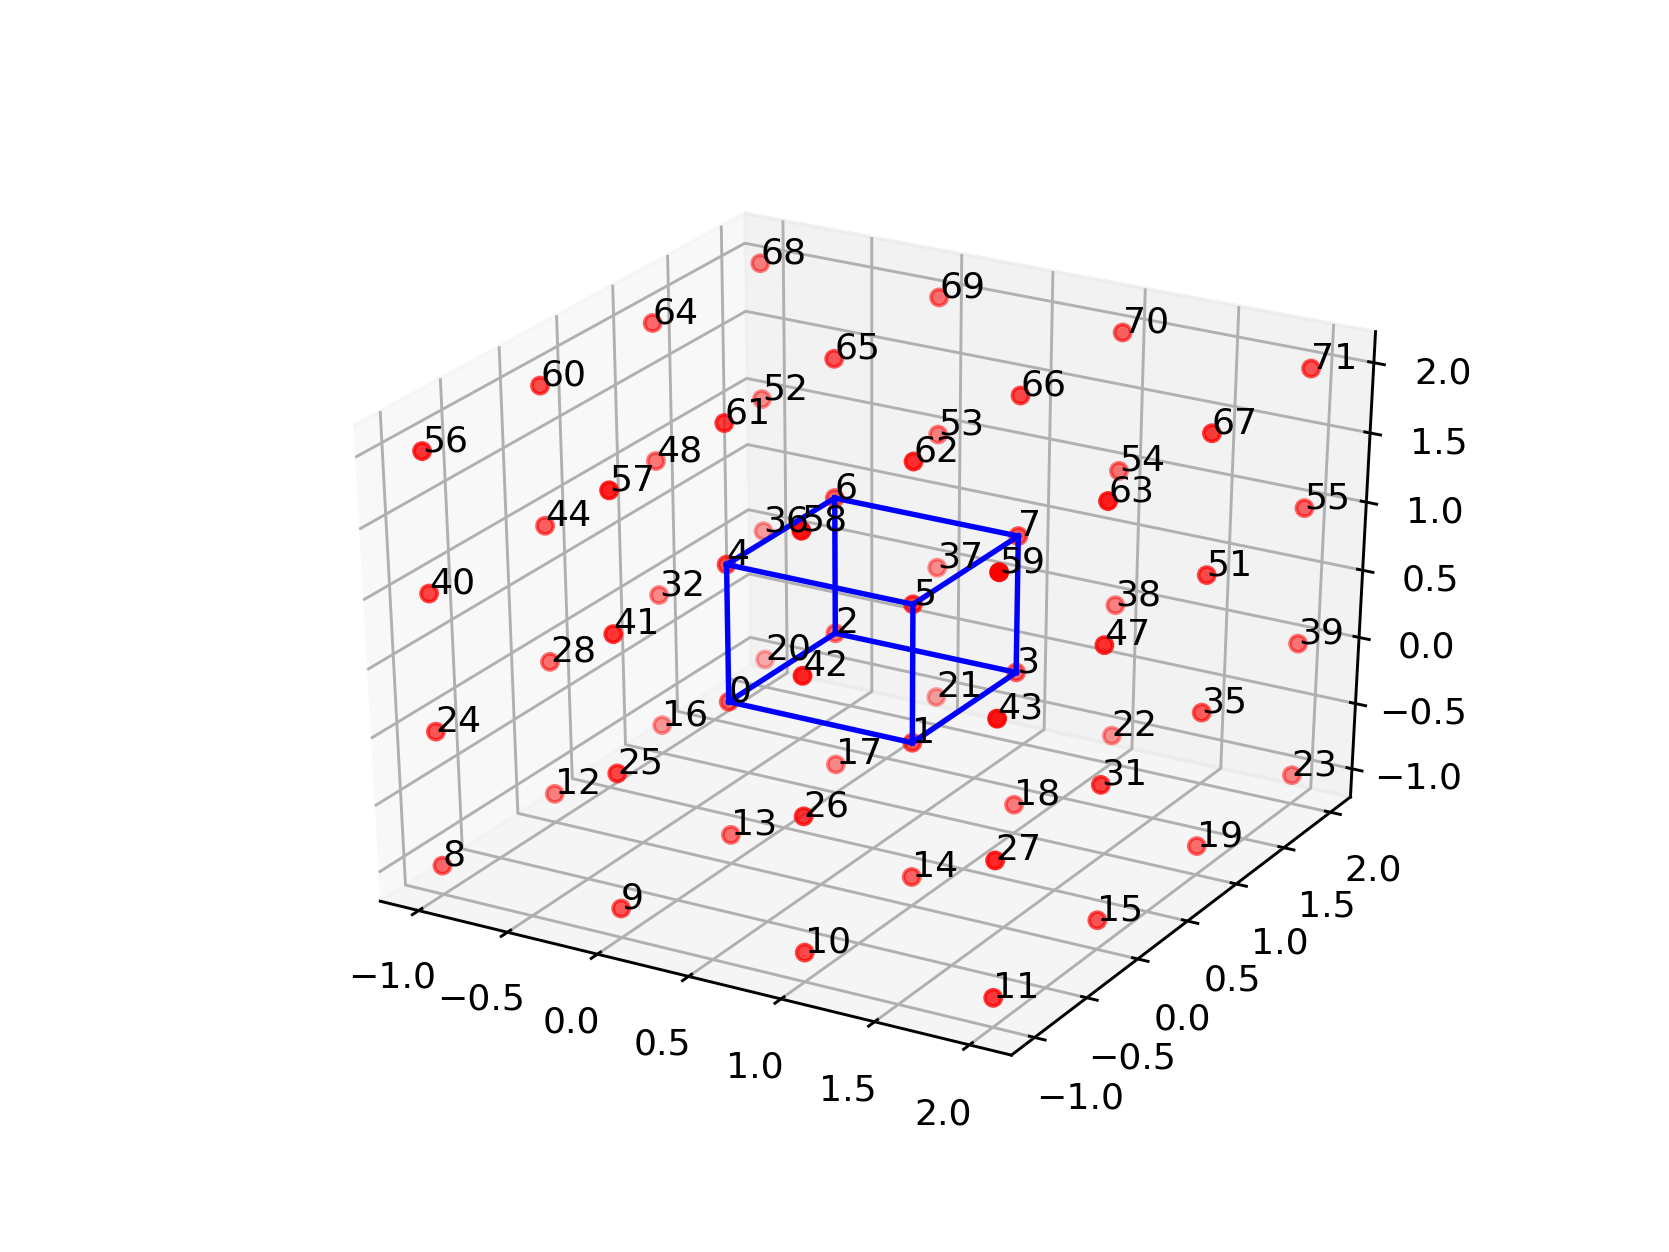

In [568]:
plot_offset = [0,0,0]
plot_mesh(ex_grid, free.lattice.reciprocal_vectors, plot_offset, extended_indices)

In [569]:
adjacent_tetrahedra = [[1,3,7],
                       [2,3,7],
                       [2,6,7],
                       [4,6,7],
                       [4,5,7],
                       [1,5,7],
                       [2,6,28],
                       [4,6,28],
                       [1,5,25],
                       [4,5,25],
                       [4,24,25],
                       [4,24,28],
                       [2,3,13],
                       [1,3,13],
                       [2,12,28],
                       [2,12,13],
                       [1,9,13],
                       [1,9,25],
                       [8,9,13],
                       [8,12,13],
                       [8,12,28],
                       [8,24,28],
                       [8,24,25],
                       [8,9,25]]
adjacent_tetrahedra = [[0] + t for t in adjacent_tetrahedra]

calc_adjacent_tetrahedra = find_adjacent_tetrahedra(extended_tetrahedra, 0)

for t1 in adjacent_tetrahedra:
    contained = False
    for t2 in calc_adjacent_tetrahedra:
        t2 = np.sort(t2)
        if np.allclose(t1,t2):
            contained = True
    print(contained == True)
print(len(calc_adjacent_tetrahedra), len(adjacent_tetrahedra))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
(24, 24)


In [570]:
keys = list(range(np.prod(ndiv3)))
values = [21, 22, 25, 26, 37, 38, 41, 42] + list(range(np.prod(ndiv3) - npts))
grid_index_dict = dict(zip(keys, values))

In [571]:
# Construct the tetrahedra in grid index form in two ways. One will use convert_tet_index
# and the other will use my own dictionary.

adj_tet_grid_ind1 = []
for tet in adjacent_tetrahedra:
    adj_tet = []
    for i in tet:
        adj_tet.append(grid_index_dict[i])
    adj_tet_grid_ind1.append(adj_tet)
    
adj_tet_grid_ind2 = []
for tet in adjacent_tetrahedra:
    adj_tet = []
    for i in tet:
        adj_tet.append(convert_tet_index(i, ndiv0))
    adj_tet_grid_ind2.append(adj_tet)

In [572]:
np.allclose(adj_tet_grid_ind1, adj_tet_grid_ind2)

True

In [573]:
adjacent_tetrahedra

[[0, 1, 3, 7],
 [0, 2, 3, 7],
 [0, 2, 6, 7],
 [0, 4, 6, 7],
 [0, 4, 5, 7],
 [0, 1, 5, 7],
 [0, 2, 6, 28],
 [0, 4, 6, 28],
 [0, 1, 5, 25],
 [0, 4, 5, 25],
 [0, 4, 24, 25],
 [0, 4, 24, 28],
 [0, 2, 3, 13],
 [0, 1, 3, 13],
 [0, 2, 12, 28],
 [0, 2, 12, 13],
 [0, 1, 9, 13],
 [0, 1, 9, 25],
 [0, 8, 9, 13],
 [0, 8, 12, 13],
 [0, 8, 12, 28],
 [0, 8, 24, 28],
 [0, 8, 24, 25],
 [0, 8, 9, 25]]

In [574]:
adj_tet_grid_ind1

[[21, 22, 26, 42],
 [21, 25, 26, 42],
 [21, 25, 41, 42],
 [21, 37, 41, 42],
 [21, 37, 38, 42],
 [21, 22, 38, 42],
 [21, 25, 41, 20],
 [21, 37, 41, 20],
 [21, 22, 38, 17],
 [21, 37, 38, 17],
 [21, 37, 16, 17],
 [21, 37, 16, 20],
 [21, 25, 26, 5],
 [21, 22, 26, 5],
 [21, 25, 4, 20],
 [21, 25, 4, 5],
 [21, 22, 1, 5],
 [21, 22, 1, 17],
 [21, 0, 1, 5],
 [21, 0, 4, 5],
 [21, 0, 4, 20],
 [21, 0, 16, 20],
 [21, 0, 16, 17],
 [21, 0, 1, 17]]

In [575]:
extended_grid = extended_grid.flatten()

tet_energies1 = []
for tet in adj_tet_grid_ind1:
    print("tet: \n", tet)
    energy = []
    for i in tet:
        print("i: ", i)
        print("pt: ", ex_grid[i])
        energy.append(free.eval(ex_grid[i], 1)[0])
    tet_energies1.append(np.sort(energy))
    print("\n")

('tet: \n', [21, 22, 26, 42])
('i: ', 21)
('pt: ', array([ 0.,  0.,  0.]))
('i: ', 22)
('pt: ', array([ 1.,  0.,  0.]))
('i: ', 26)
('pt: ', array([ 1.,  1.,  0.]))
('i: ', 42)
('pt: ', array([ 1.,  1.,  1.]))


('tet: \n', [21, 25, 26, 42])
('i: ', 21)
('pt: ', array([ 0.,  0.,  0.]))
('i: ', 25)
('pt: ', array([ 0.,  1.,  0.]))
('i: ', 26)
('pt: ', array([ 1.,  1.,  0.]))
('i: ', 42)
('pt: ', array([ 1.,  1.,  1.]))


('tet: \n', [21, 25, 41, 42])
('i: ', 21)
('pt: ', array([ 0.,  0.,  0.]))
('i: ', 25)
('pt: ', array([ 0.,  1.,  0.]))
('i: ', 41)
('pt: ', array([ 0.,  1.,  1.]))
('i: ', 42)
('pt: ', array([ 1.,  1.,  1.]))


('tet: \n', [21, 37, 41, 42])
('i: ', 21)
('pt: ', array([ 0.,  0.,  0.]))
('i: ', 37)
('pt: ', array([ 0.,  0.,  1.]))
('i: ', 41)
('pt: ', array([ 0.,  1.,  1.]))
('i: ', 42)
('pt: ', array([ 1.,  1.,  1.]))


('tet: \n', [21, 37, 38, 42])
('i: ', 21)
('pt: ', array([ 0.,  0.,  0.]))
('i: ', 37)
('pt: ', array([ 0.,  0.,  1.]))
('i: ', 38)
('pt: ', array([ 1.,

In [576]:
tet_energies2 = [[0,1,np.sqrt(2),np.sqrt(3)], # 0
             [0,1,np.sqrt(2),np.sqrt(3)],
             [0,1,np.sqrt(2),np.sqrt(3)],
             [0,1,np.sqrt(2),np.sqrt(3)],
             [0,1,np.sqrt(2),np.sqrt(3)],
             [0,1,np.sqrt(2),np.sqrt(3)],
             [0,1,1,np.sqrt(2)], # 1
             [0,1,1,np.sqrt(2)],
             [0,1,1,np.sqrt(2)], # 2
             [0,1,1,np.sqrt(2)],
             [0,1,1,np.sqrt(2)], # 3
             [0,1,1,np.sqrt(2)],
             [0,1,1,np.sqrt(2)], # 4
             [0,1,1,np.sqrt(2)],
             [0,1,1,np.sqrt(2)], # 5
             [0,1,1,np.sqrt(2)],
             [0,1,1,np.sqrt(2)], # 6
             [0,1,1,np.sqrt(2)],
             [0,1,np.sqrt(2), np.sqrt(3)], # 7
             [0,1,np.sqrt(2), np.sqrt(3)],
             [0,1,np.sqrt(2), np.sqrt(3)],
             [0,1,np.sqrt(2), np.sqrt(3)],
             [0,1,np.sqrt(2), np.sqrt(3)],
             [0,1,np.sqrt(2), np.sqrt(3)]]

In [625]:
print(len(tet_energies1), len(tet_energies2))

(24, 24)


In [626]:
np.allclose(tet_energies1, tet_energies2)

True

In [627]:
ex_grid, ex_tetrahedra = get_extended_tetrahedra(free, ndivisions)

# (PP, grid, tetrahedra_list, tetrahedron,
#                                   iband, ndiv0)

c_energies, corrected_weights = corrected_integration_weights(free, ex_grid, ex_tetrahedra, [0,1,3,7],
                                  0, [1,1,1])

#### Improved method correction on point 1

In [632]:
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)
lat_shift = [-1./2]*3
grid_shift = [0.]*3
# Previous tests had the degree as 1. For this one the degree will be two.
degree = 2
free = FreeElectronModel(lattice, degree)
ndivs = 1

<IPython.core.display.Javascript object>


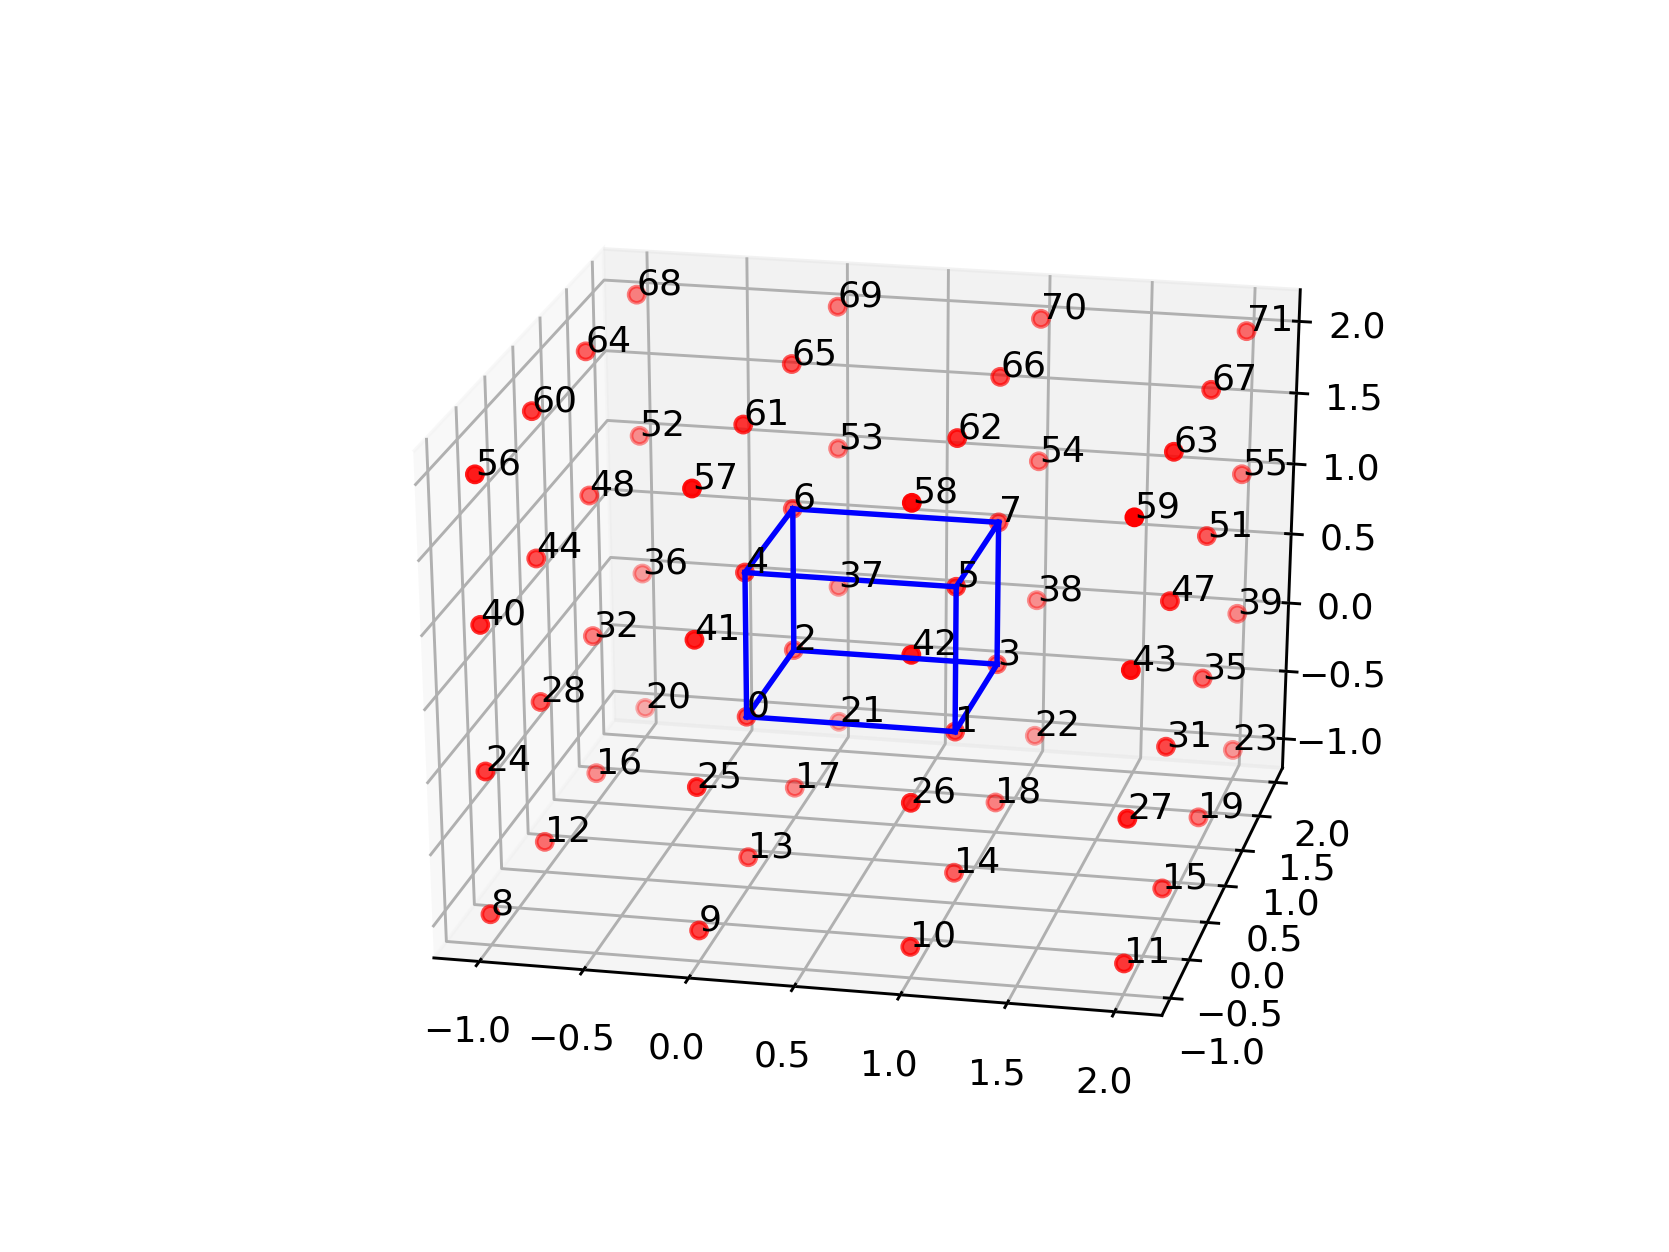

In [674]:
# Find extended indices and plot the extended grid with them. Let's walk through
# the function.
ndiv0 = np.array([1]*3)
ndiv1 = ndiv0 + 1
npts = np.prod(ndiv1)
ndiv2 = ndiv0 + 2
ndiv3 = ndiv0 + 3
extended_indices = np.empty(np.array(ndiv3), dtype=int)
for k,j,i in product(range(ndiv3[0]), range(ndiv3[1]), range(ndiv3[2])):
    if ((i > 0 and i < ndiv2[0]) and (j > 0 and j < ndiv2[1]) and
        (k > 0 and k < ndiv2[2])):
        extended_indices[k,j,i] = (i-1) + (j-1)*ndiv1[1] + (k-1)*ndiv1[0]*ndiv1[1]
    else:
        extended_indices[k,j,i] = i + j*ndiv3[1] + k*ndiv3[0]*ndiv3[1] + npts    
extended_indices = extended_indices.flatten()

plot_offset = [0,0,0]
plot_mesh(ex_grid, free.lattice.reciprocal_vectors, plot_offset, extended_indices)

In [694]:
free.eval(ex_grid[9-8],1)

[2.0000000000000004]

In [23]:
# Calculate correction for point with index 1. Change to degree 2.
lat_angles =[np.pi/2]*3
lat_consts = [2*np.pi]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)

degree = 2
free = FreeElectronModel(lattice, degree)

lat_offset0 = [0,0,0]
ndivisions = 1
grid, tetrahedra = grid_and_tetrahedra(free, ndivisions, lat_offset0)

# I probably only need to calculate the Fermi level once.
weights = np.ones(len(grid))
fermi_level = calc_fermi_level(free, tetrahedra, weights, grid)
free.fermi_level = fermi_level

energies = [0, 1, 2, 3]
VT = free.lattice.reciprocal_volume/len(tetrahedra)
uncorrected_weights = integration_weights(VT, energies, fermi_level)

# Cell 0    
enT1 = [1, 2, 5, 6]
enT2 = [1, 2, 3, 6]
enT3 = [1, 4, 5, 6]

DOST1 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT1,
                          fermi_level)
DOST2 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT2,
                          fermi_level)
DOST3 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT3,
                          fermi_level)

correction0 = 2*DOST1*(np.sum(enT1)-4) + (
              2*DOST2*(np.sum(enT2)-4) +
              2*DOST3*(np.sum(enT3) - 4))

print("correction0: ", correction0)
# Cell 1
enT4 = [0, 1, 2, 3]
DOST4 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT4,
                          fermi_level)
correction1 = 2*DOST4*(np.sum(enT4) - 4)

print("correction1: ", correction1)

# Cell 2
enT5 = [1, 2, 4, 5]
enT6 = [1, 2, 2, 5]
DOST5 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT5,
                          fermi_level)
DOST6 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT6,
                          fermi_level)

correction2 = DOST5*(np.sum(enT5) - 4) + DOST6*(np.sum(enT6) - 4)
print("correction2: ", correction2)
# Cell 3
enT7 = [1, 1, 2, 2]
enT8 = [0, 1, 1, 2]
DOST7 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT7,
                          fermi_level)
DOST8 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT8,
                          fermi_level)

correction3 = DOST7*(np.sum(enT7) - 4) + DOST8*(np.sum(enT8) - 4)
print("correction3: ", correction3)

# Cell 4
enT10 = [1, 2, 2, 5]
enT11 = [1, 2, 4, 5]
DOST10 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT10,
                          fermi_level)
DOST11 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT11,
                          fermi_level)

correction4 = DOST10*(np.sum(enT10) - 4) + DOST11*(np.sum(enT11) - 4)
print("correction4: ", correction4)
# Cell 5
enT12 = [1, 1, 2, 2]
DOST12 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT12,
                          fermi_level)

correction5 = DOST12*(np.sum(enT12) - 4)

# Cell 6
enT9 = [1, 2, 3, 4]
DOST9 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT9,
                          fermi_level)

correction6 = 2*DOST9*(np.sum(enT9) - 4)
print("correction6: ", correction6)
# Cell 7
enT13 = [1, 1, 2, 2]
enT14 = [1, 2, 2, 3]
enT16 = [0, 1, 1, 2]
DOST13 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT13,
                          fermi_level)
DOST14 = density_of_states(free.lattice.reciprocal_volume,
                          free.lattice.reciprocal_volume/6,
                          enT14,
                          fermi_level)


correction7 = 2*DOST13*(np.sum(enT13) - 4) + (
              2*DOST14*(np.sum(enT14) - 4))
            
print("correction7: ", correction7)
correction = (correction0 + 
              correction1 + 
              correction2 + 
              correction3 + 
              correction4 + 
              correction5 + 
              correction6 + 
              correction7)/40

ex_grid, ex_tetrahedra = get_extended_tetrahedra(free, ndivisions)
c_energies, corrected_weights = corrected_integration_weights(free, ex_grid, ex_tetrahedra, [0,1,3,7],
                                                              0, [1,1,1])
print(corrected_weights[1], uncorrected_weights[1] + correction)
# assert np.isclose(corrected_weights[1], uncorrected_weights[1] + correction)

('correction0: ', 0.79378230670954508)
('correction1: ', 0.46551001822566224)
('correction2: ', 0.57328722151244926)
('correction3: ', 0.39653005467698677)
('correction4: ', 0.57328722151244926)
('correction6: ', 0.52918820447303005)
('correction7: ', 1.8514365183000336)
[3 3 3]
(0.1661116166364783, 0.1661116166364783)


In [27]:
a = [1, 2, 3, 4, 5]

#### Get integrals to work again

In [4]:
from BZI.pseudopots import free_PP

In [5]:
degree_list = range(3,4)
nvalence = 1

for degree in degree_list:
    free_PP.set_degree(degree)

    # Verify the Fermi level of the free_PP electron model.
    lat_offset = [-1./2]*3
    grid, tetrahedra = grid_and_tetrahedra(free_PP, 25, lat_offset)
    weights = np.ones(len(tetrahedra))
    free_PP.fermi_level = calc_fermi_level(free_PP, tetrahedra, weights, grid)
    
    print("calculated fermi level: ", free_PP.fermi_level)
    print("exact fermi level: ", free_PP.fermi_level_ans)

    sphere_volume = 4./3*np.pi*free_PP.fermi_level**(3./degree)
    occupied_volume = free_PP.lattice.reciprocal_volume*free_PP.nvalence_electrons/2
    
    print("sphere volume: ", sphere_volume)
    print("occupied volume: ", occupied_volume)
#     print("sphere volume: ", sphere_volume)
#     print("occupied volume: ", occupied_volume)

#     assert np.isclose(sphere_volume, occupied_volume, 1e-1, 1e-1)
#     assert np.isclose(free_PP.fermi_level, free_PP.fermi_level_ans, 1e-2,1e-2)

    free_PP.total_energy = calc_total_energy(free_PP, tetrahedra, weights, grid)
    
    print("total energy: ", free_PP.total_energy)
    print("total energy answer: ", free_PP.total_energy_ans)
#     assert np.isclose(total_energy, te_answer, 1e-1, 1e-1)

('guess total states: ', 0.0)
('guess fermi level: ', 0.0)
('initial sign: ', -1)
('change sign total states: ', 0.26598450796625789)
('change sign fermi level: ', 8.0)
('total - nfs: ', -0.73401549203374206)
('initial sign: ', -1)
('change sign total states: ', 0.53503254675365397)
('change sign fermi level: ', 16.0)
('total - nfs: ', -0.46496745324634603)
('initial sign: ', -1)
('change sign total states: ', 0.80441558268967062)
('change sign fermi level: ', 24.0)
('total - nfs: ', -0.19558441731032938)
('initial sign: ', -1)
('change sign total states: ', 1.0736478000410976)
('change sign fermi level: ', 32.0)
('total - nfs: ', 0.073647800041097611)
('initial sign: ', -1)
('looping total states: ', 0.93918106766263154)
('looping fermi level: ', 28.0)
('looping total states: ', 1.0065257730111012)
('looping fermi level: ', 30.0)
('looping total states: ', 0.97283984700021808)
('looping fermi level: ', 29.0)
('looping total states: ', 0.98967837653295243)
('looping fermi level: ', 29.

#### Test sampling

In [11]:
from BZI.sampling import make_grid, make_large_grid

In [20]:
grid_centering = "prim"
grid_consts = [1,1,1]
grid_angles = [np.pi/2]*3
grid_vecs = make_ptvecs(grid_centering, grid_consts, grid_angles)


lat_centering = "prim"
lat_consts = [2]*3
lat_angles = [np.pi/2]*3
lat_vecs = make_ptvecs(lat_centering, lat_consts, lat_angles)

offset = [0]*3
grid0 = [[0,0,0], [0,0,1], [0,1,0], [0,1,1],
         [1,0,0], [1,0,1], [1,1,0], [1,1,1]]
grid1 = make_grid(lat_vecs, grid_vecs, offset)

for g0 in grid0:
    contained = False
    for g1 in grid1:
        if np.allclose(g0,g1):
            contained = True
    print(contained)

In [37]:
grid_centering = "body"
grid_consts = [1.]*3
grid_angles = [np.pi/2]*3
grid_vecs = make_ptvecs(grid_centering, grid_consts, grid_angles)

lat_centering = "body"
lat_consts = [2.]*3
lat_angles = [np.pi/2]*3
lat_vecs = make_ptvecs(lat_centering, lat_consts, lat_angles)

offset = [0]*3

a = 0.5
grid0 = [[0,0,0], [-a,a,a], [a,-a,a], [0,0,2*a], [a,a,-a],
         [0,2*a,0], [2*a,0,0],[a,a,a]]
grid1 = make_grid(lat_vecs, grid_vecs, offset)

print(len(grid0) == len(grid1))

for g0 in grid0:
    contained = False
    for g1 in grid1:
        if np.allclose(g0,g1):
            contained = True
    print(contained)

True
True
True
True
True
True
True
True
True


In [33]:
grid_vecs

array([[-0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5],
       [ 0.5,  0.5, -0.5]])

In [30]:
print(grid_vecs)

[[-0.5  0.5  0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]]


In [17]:
help(make_grid)

Help on function make_grid in module BZI.sampling:

make_grid(lat_vecs, grid_vecs, offset, cart=True)
    Sample within a parallelepiped using any regular grid.
    
    Args:
        lat_vecs (numpy.ndarray): the vectors defining the volume in which 
            to sample. The vectors are the columns of the matrix.
        grid_vecs (numpy.ndarray): the vectors that generate the grid as 
            columns of the matrix..
        offset: the offset of the coordinate system in grid coordinates.
        cart (bool): if true, return the grid in Cartesian coordinates; other-
            wise, return the grid in cell coordinates.
    
    Returns:
        grid (list): an array of sampling-point coordinates.
    
    Examples:
        >>> cell_centering = "face"
        >>> cell_consts = [1.]*3
        >>> cell_angles = [np.pi/2]*3
        >>> lat_vecs = make_ptvecs(cell_centering, cell_consts, cell_angles)
        >>> grid_centering = "base"
        >>> grid_consts = [cell_const/140]*3
  

In [49]:
def mfree(kpoint, degree, lengths, fermi_level):
    """Evaluate multiple free electron bands.
    """
    
    kpoint = np.array(kpoint)
    pts = np.array([[0,0,0], [-lengths[0], 0, 0], [lengths[1], 0, 0],
          [0, -lengths[1], 0], [0, lengths[1], 0],
          [0, 0, -lengths[2]], [0, 0, lengths[2]]])
    return filter(lambda x: x <= fermi_level,
           [np.linalg.norm(kpoint - pt)**degree for pt in pts])

In [50]:
mfree([0,0,0], 2, [1,1,1], 10)

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [40]:
from numpy.linalg import inv

In [42]:
# Create the grid for rectangles
ndivs = 3
grid_consts = [ndivs]*3
grid_angles = [np.pi/2]*3
grid_centering = "prim"
grid_vecs = make_ptvecs(grid_centering, grid_consts, grid_angles)
rgrid_vecs = make_rptvecs(grid_vecs)
offset = np.dot(inv(rgrid_vecs), -np.sum(free_PP.lattice.reciprocal_vectors, 1)/2) + (
                                         [0.5]*3)
# Calculate the Fermi level, if afree_PPlicable, and total energy for the rectangular method.
# Calculate percent error for each.
grid = make_grid(free_PP.lattice.reciprocal_vectors, rgrid_vecs, offset)

<IPython.core.display.Javascript object>


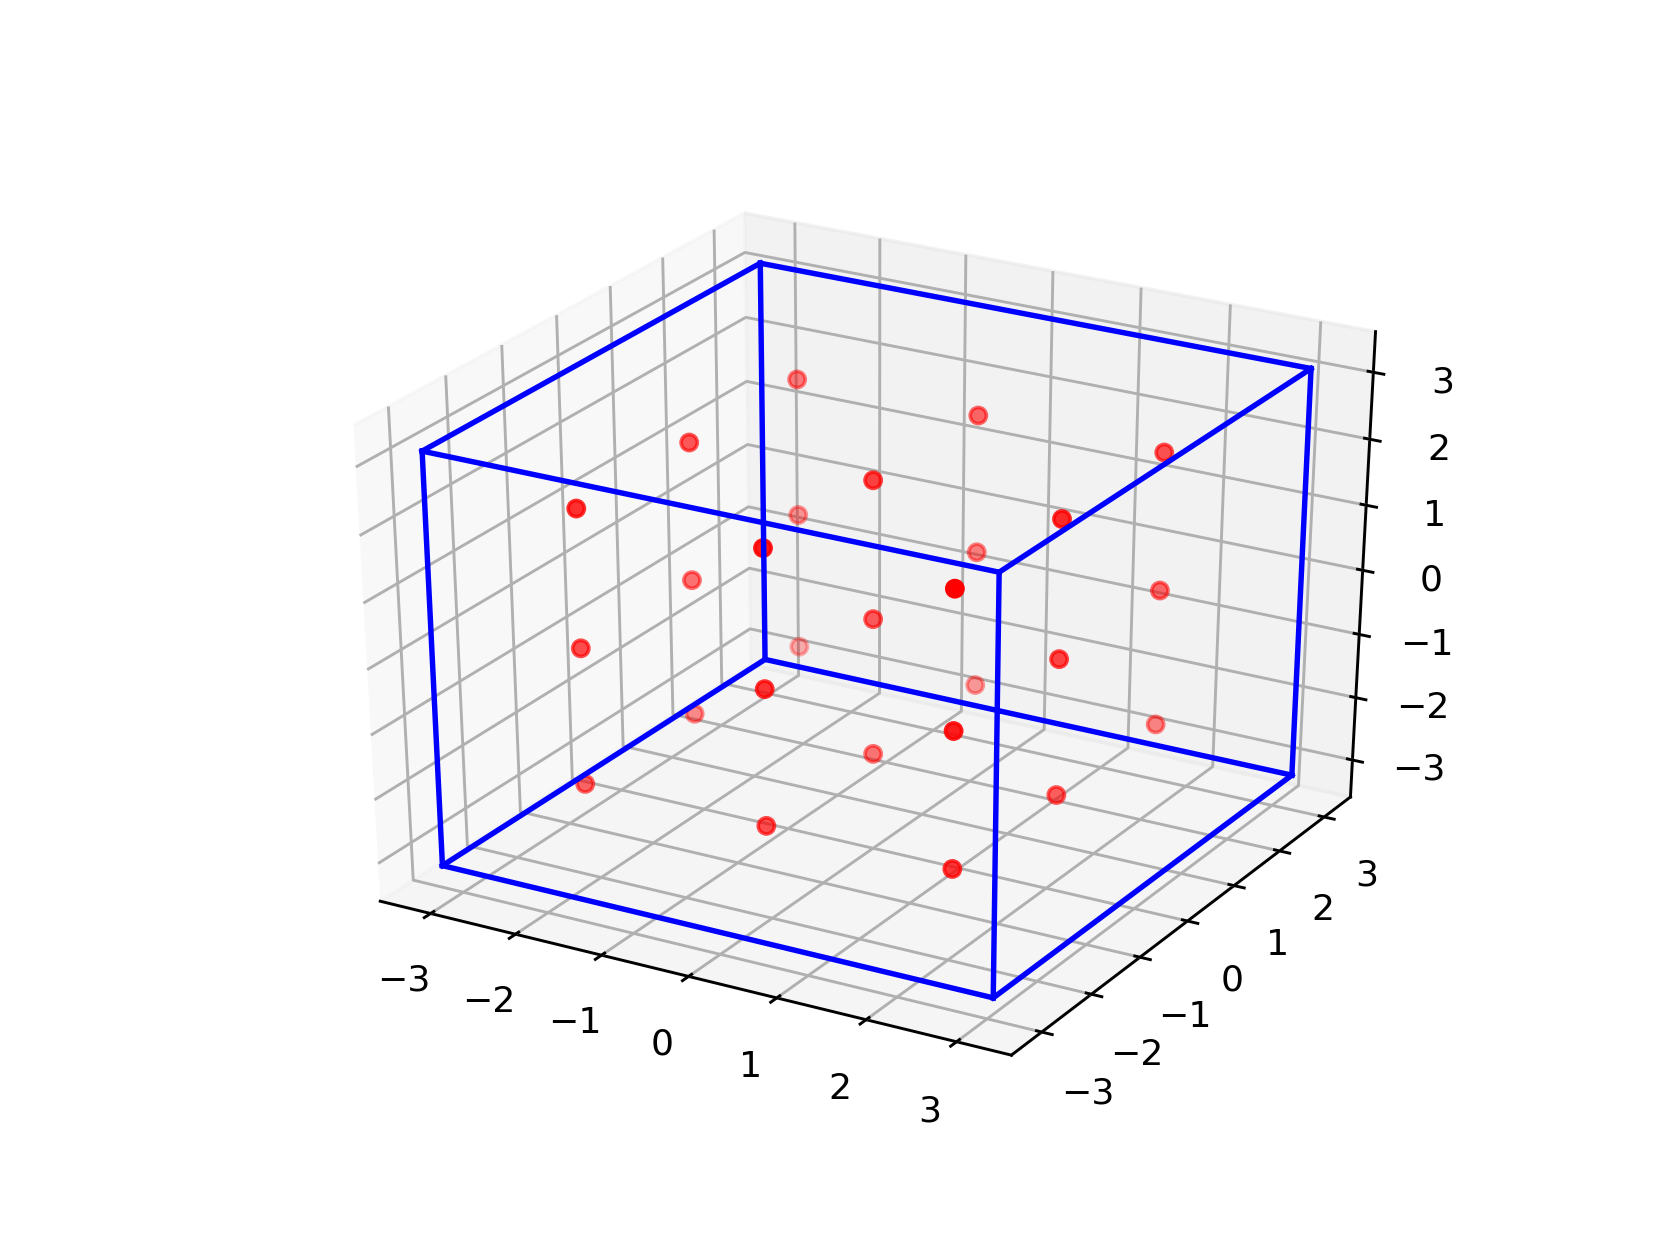

In [43]:
plot_offset = -np.sum(free_PP.lattice.reciprocal_vectors, 1)/2
plot_mesh(grid, free_PP.lattice.reciprocal_vectors, plot_offset)


In [ ]:
from BZI.plots import ScatterPlotMultiple
ScatterPlotMultiple(func, states, ndivisions, cutoff=None):

In [ ]:
conv_args = {"ndivisions": range(2, 11),
             "degree": 2,
             "exact_fl": False,
             "improved": False,
             "symmetry": False,
             "err_correlation": True,
             "file_names": ["temp_fl", "improved_tet_te_conv1", "error_correlation1"],
             "PP_name": "Multiple Free Electron",
             "location": "/Users/jeremyjorgensen/Codes/BZI/plots/",
             
             
create_convergence_plot(**conv_args)